<a href="https://colab.research.google.com/github/aswathynair2170/ML-Portfolio/blob/main/Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import os
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from skimage import transform
from sklearn.preprocessing import StandardScaler

from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

**Part 1: Data Analysis and Bayes Nets**

In [ ]:
!git clone https://github.com/aswathynair2170/F21DL-data.git

Cloning into 'F21DL-data'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 4.54 KiB | 387.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!ls

F21DL-data  sample_data


In [ ]:
A = np.load("/content/F21DL-data/smiley_noisy_X.npy")

In [ ]:
A.shape

(204, 9, 9, 1)

In [ ]:
B = np.load("/content/F21DL-data/smiley_noisy_Y.npy")

In [ ]:
C = np.load("/content/F21DL-data/smiley_X.npy")

In [ ]:
B.shape

(204,)

In [ ]:
A[0]

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [ ]:
B[0]

2.0

In [ ]:
A.ndim

4

In [ ]:
B.ndim

1

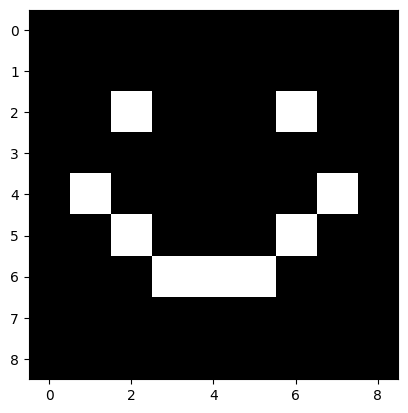

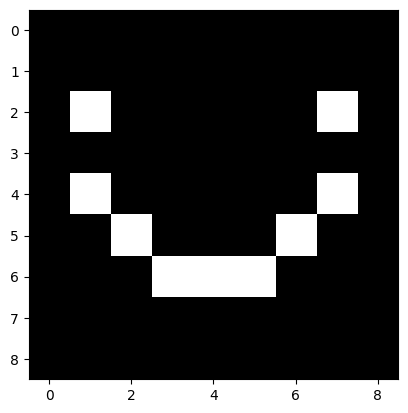

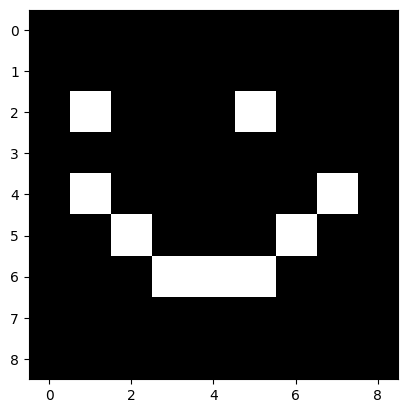

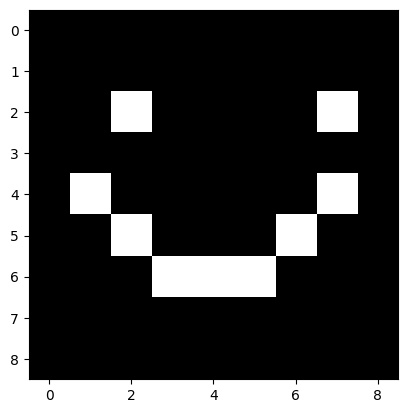

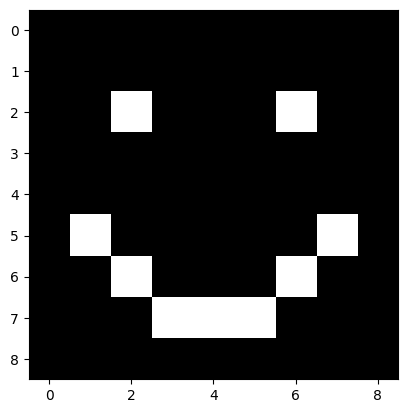

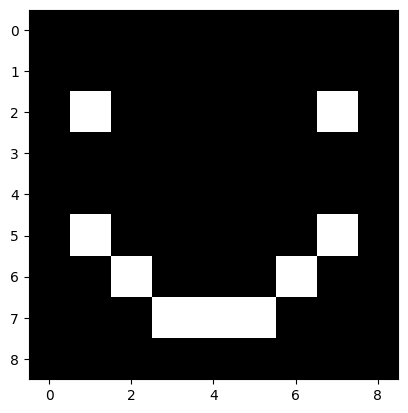

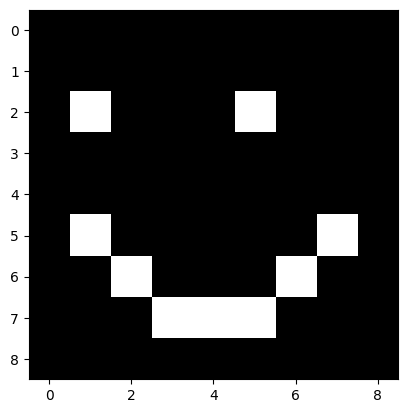

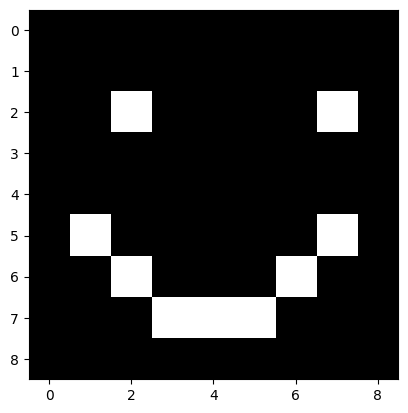

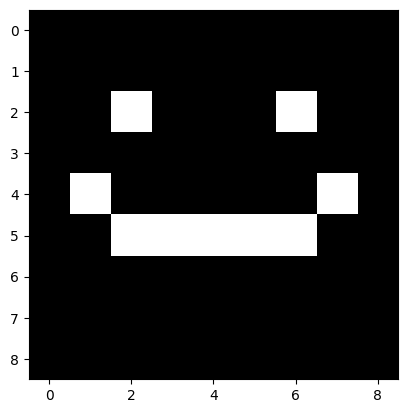

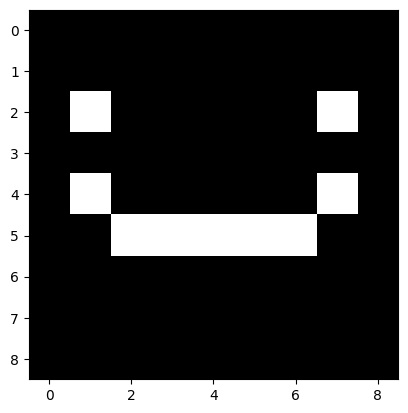

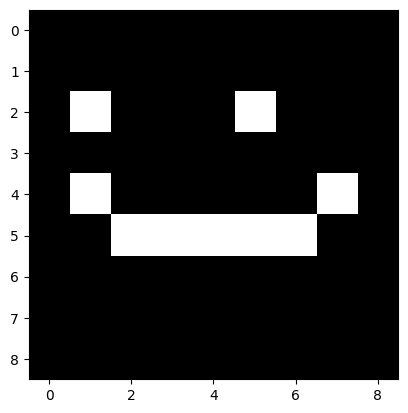

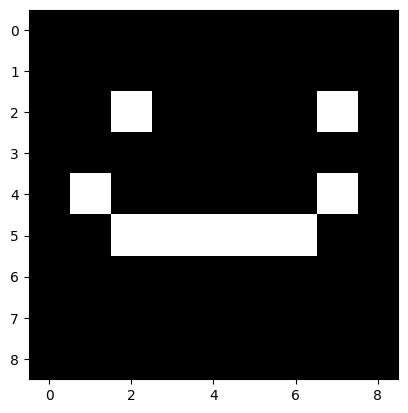

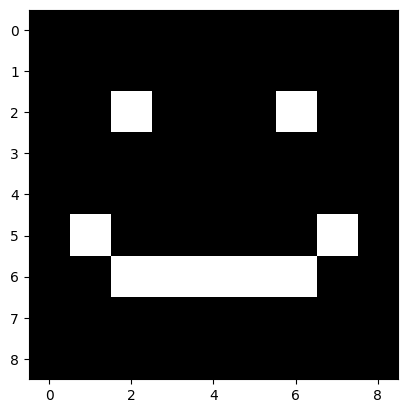

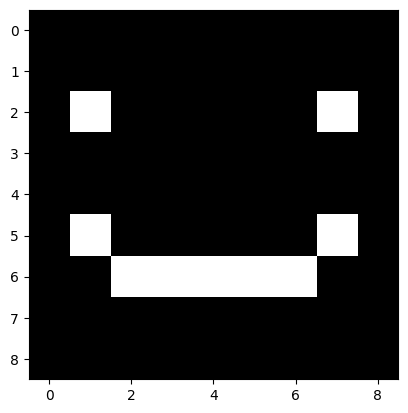

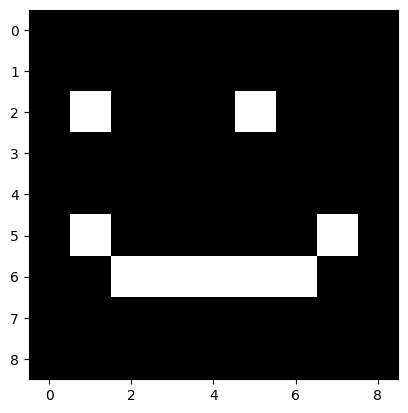

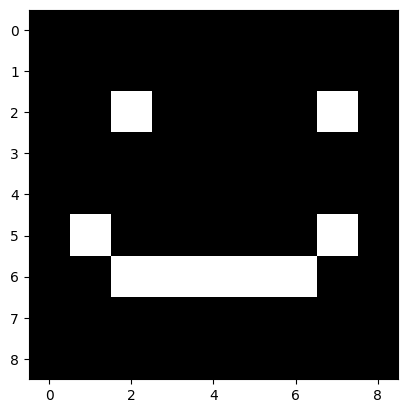

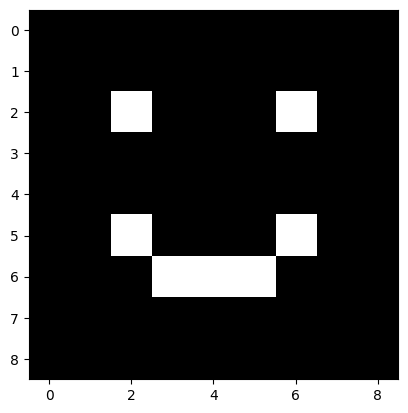

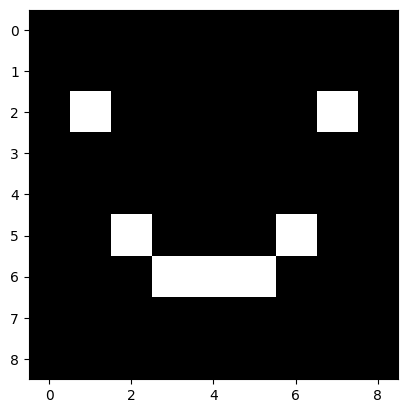

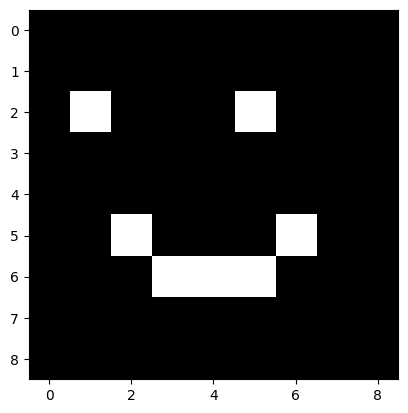

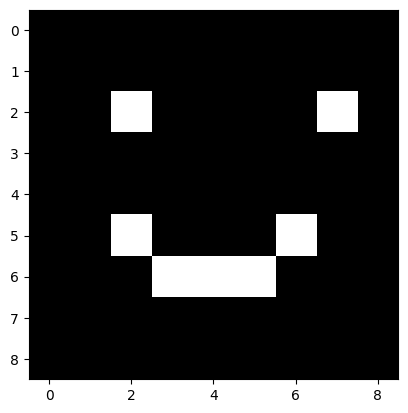

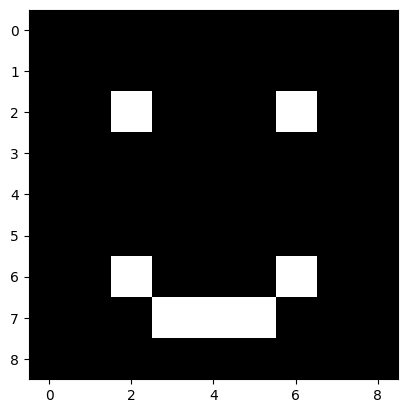

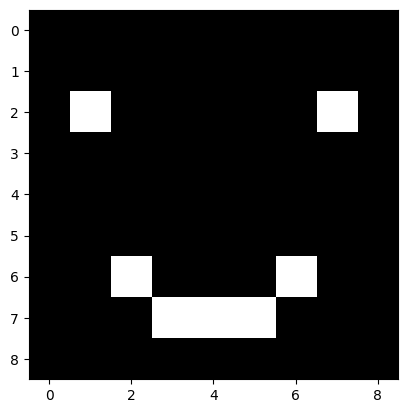

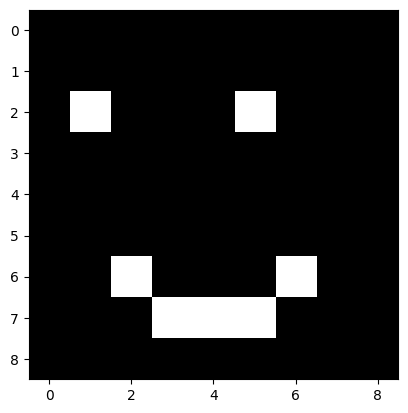

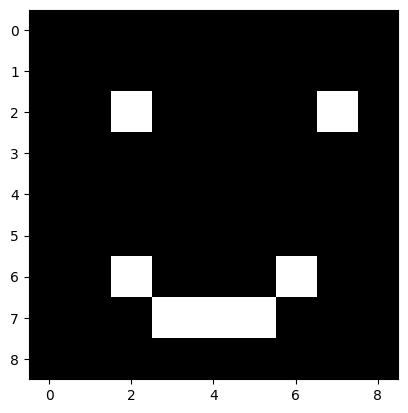

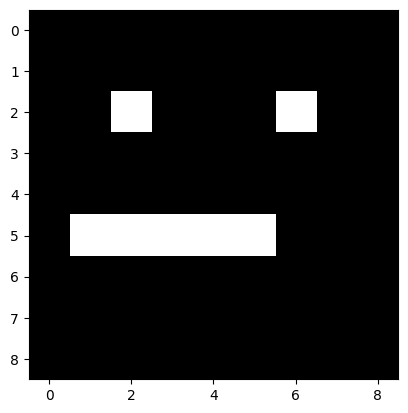

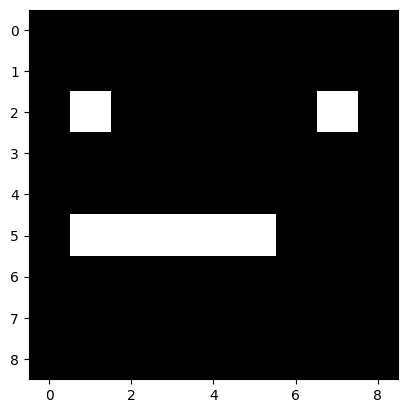

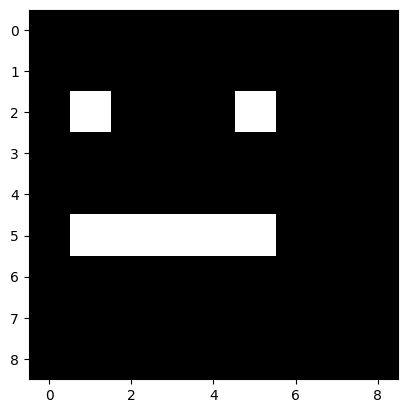

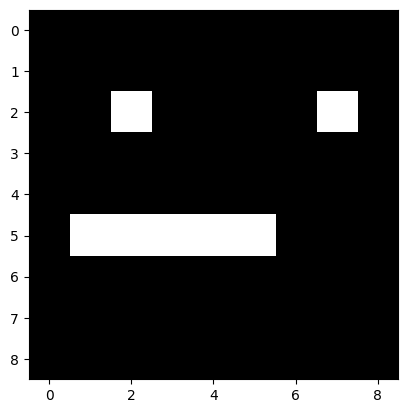

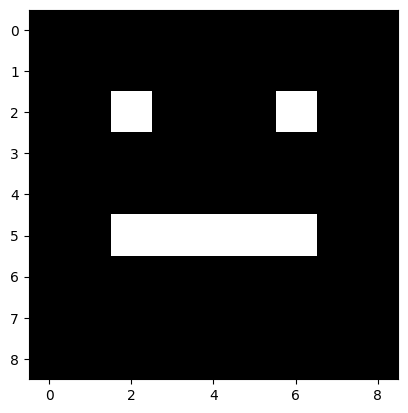

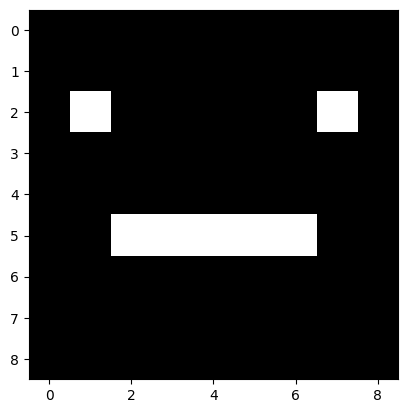

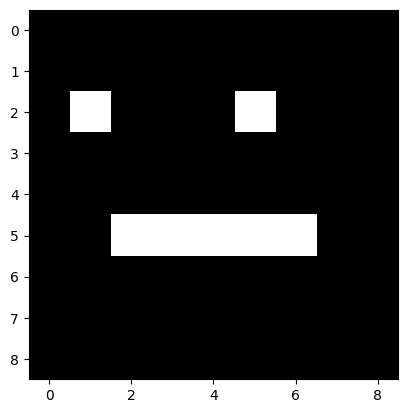

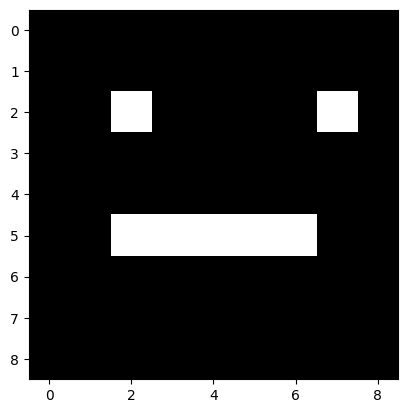

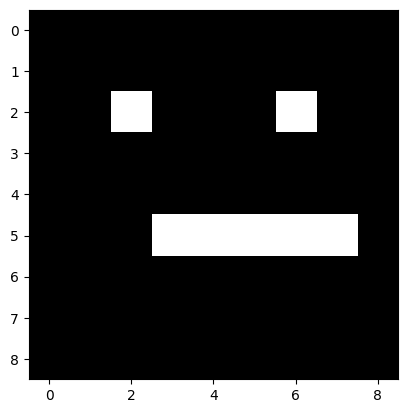

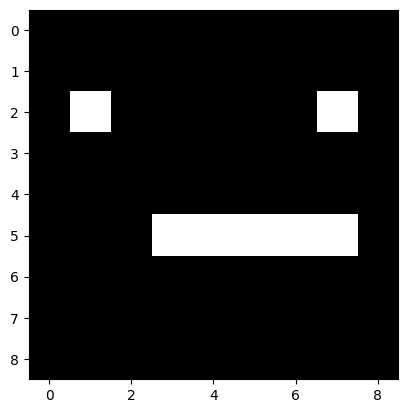

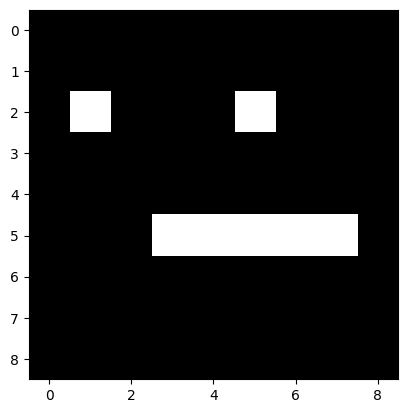

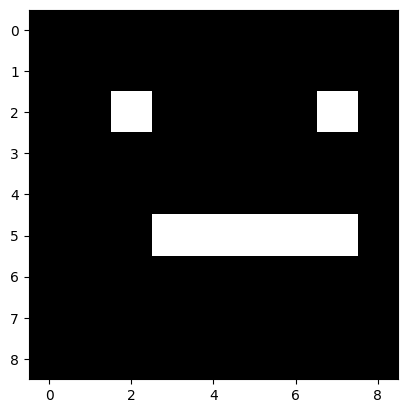

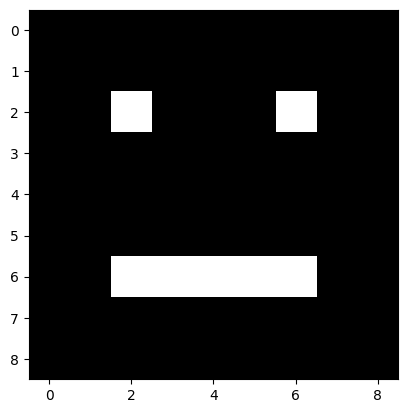

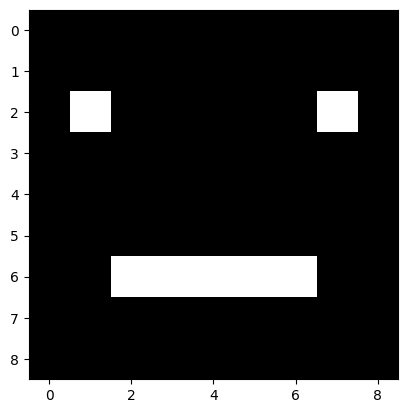

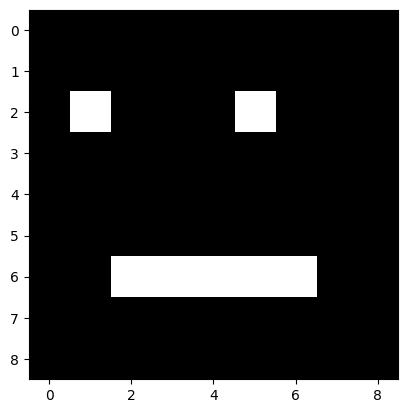

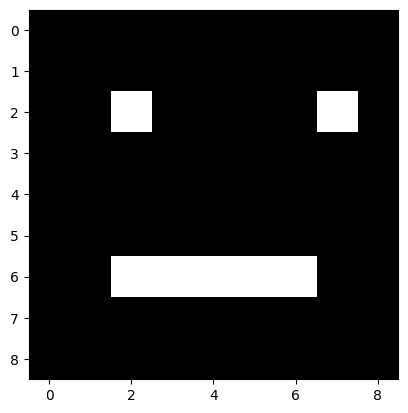

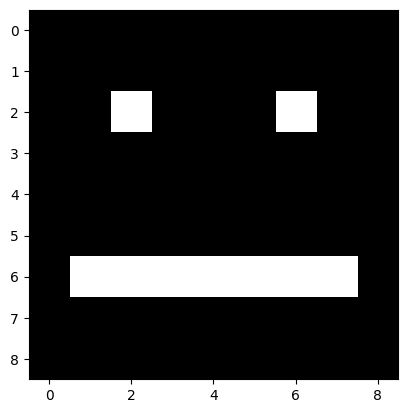

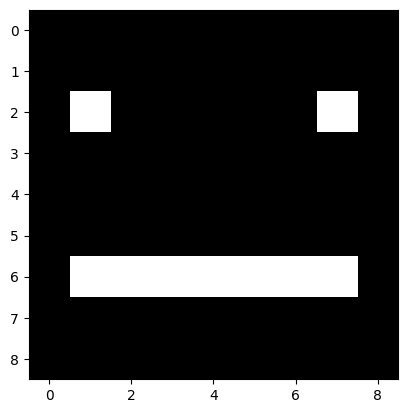

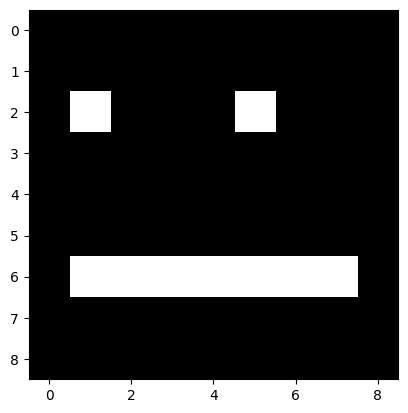

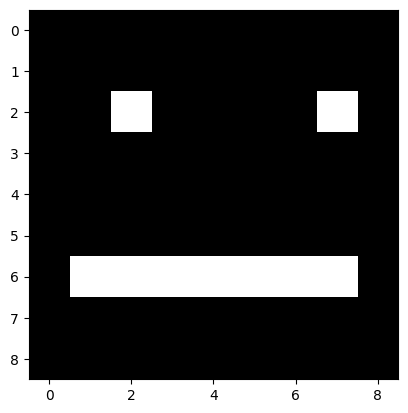

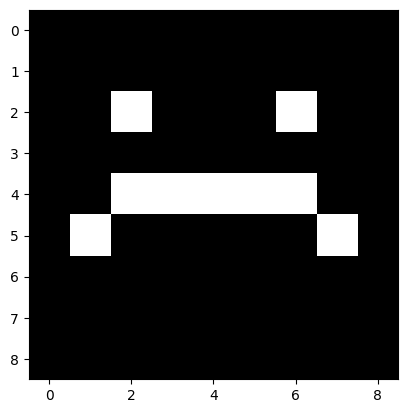

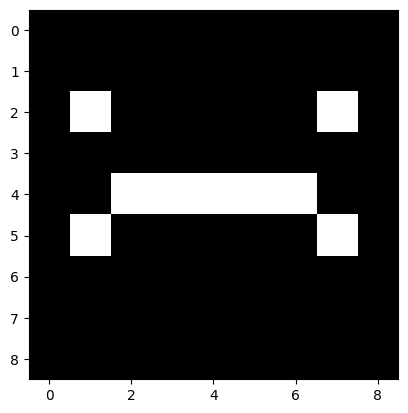

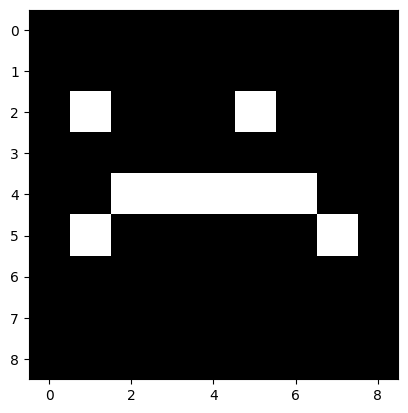

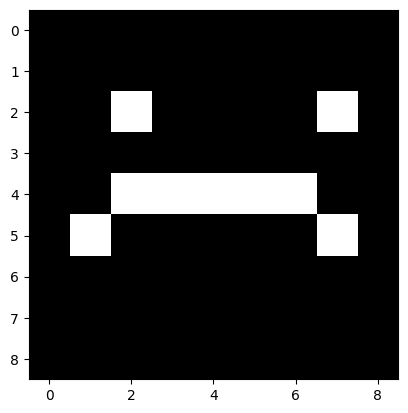

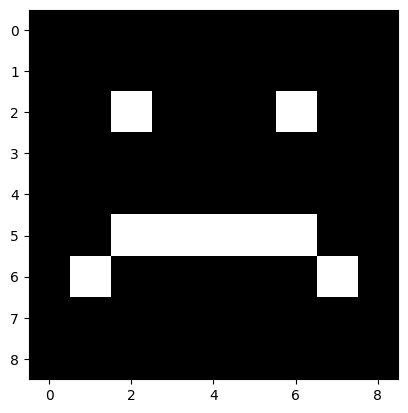

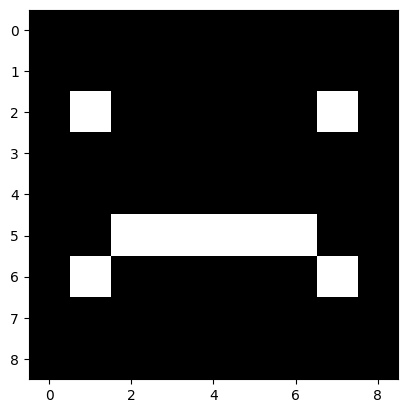

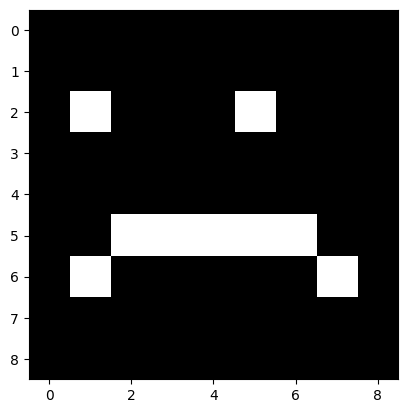

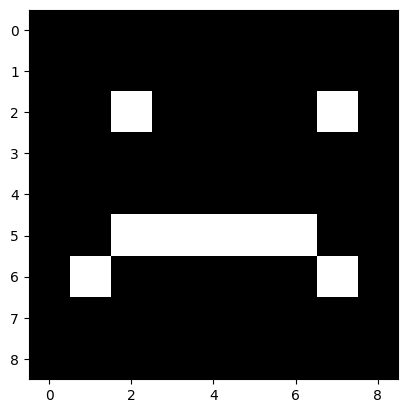

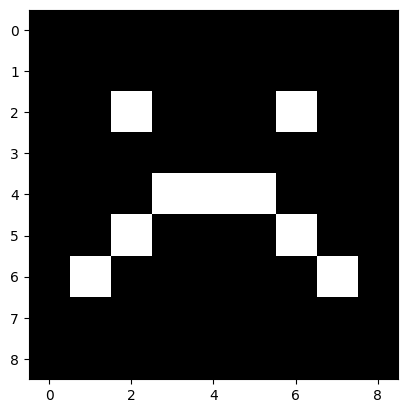

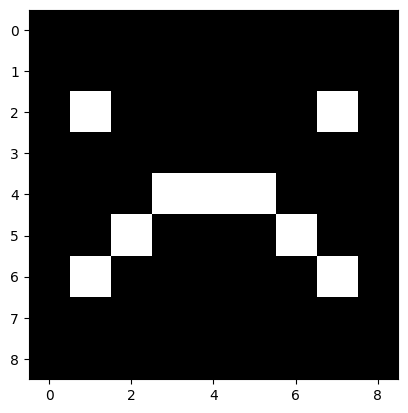

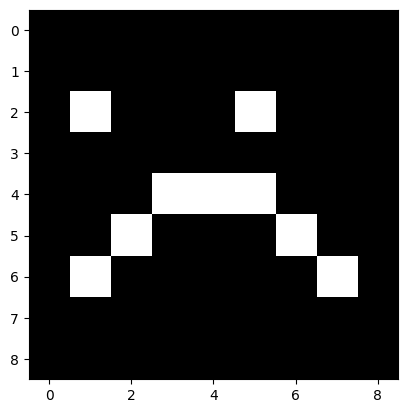

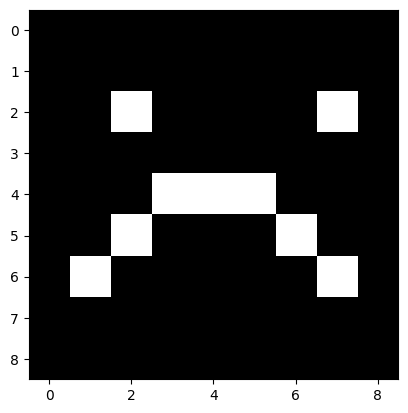

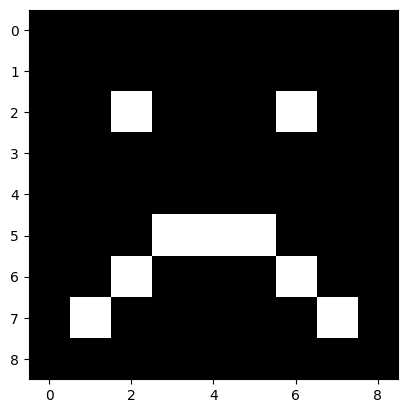

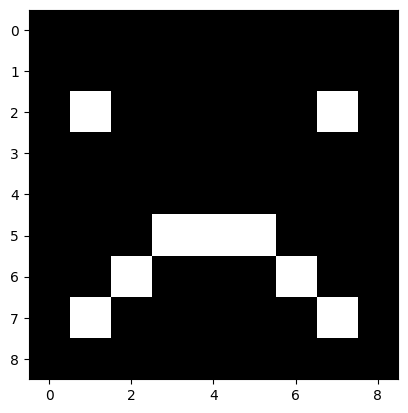

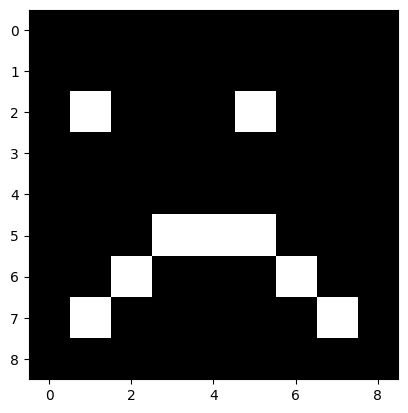

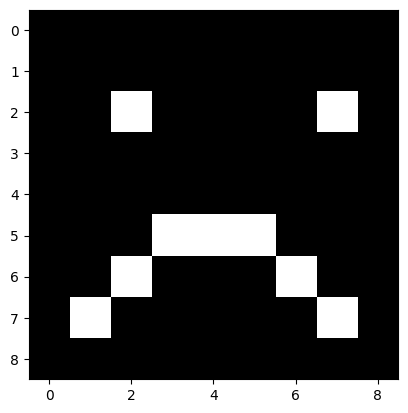

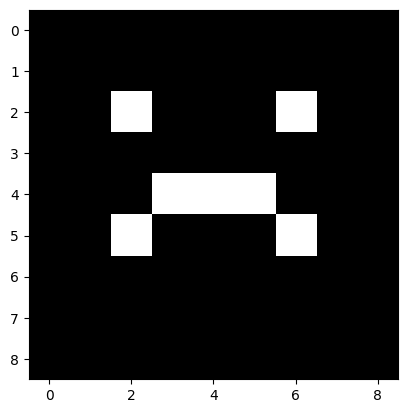

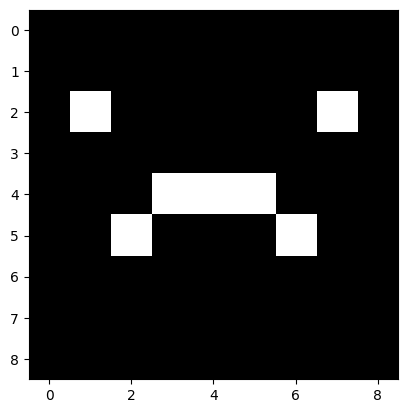

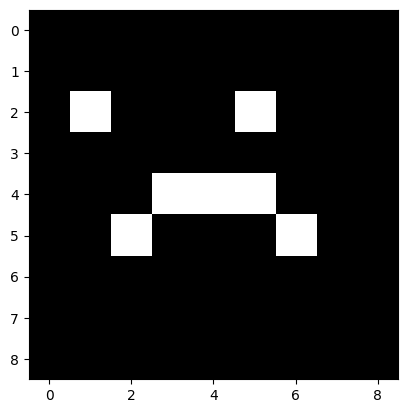

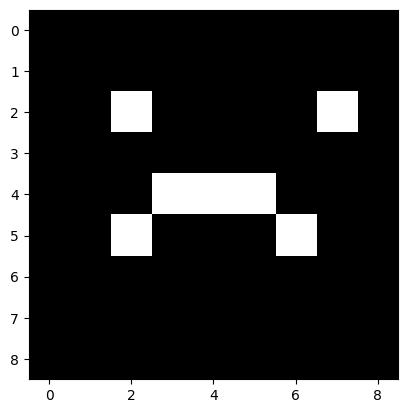

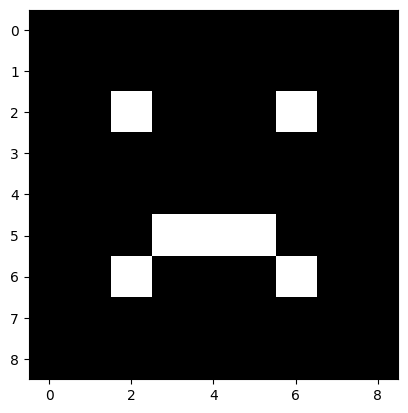

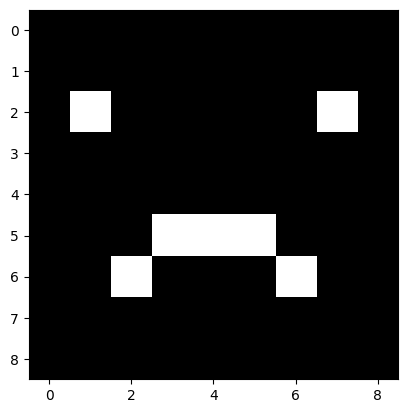

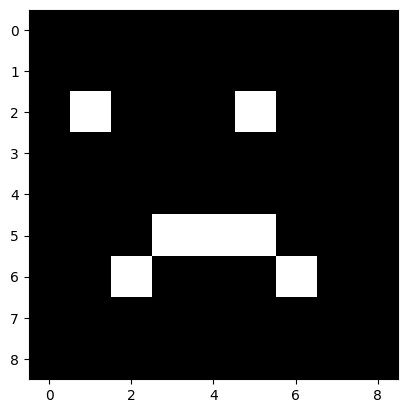

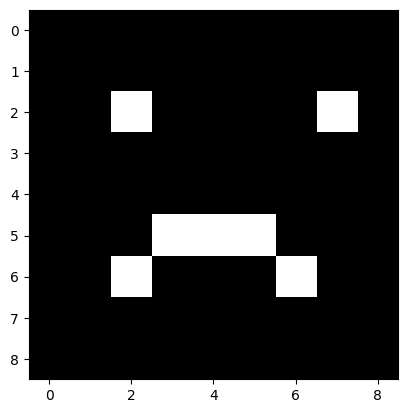

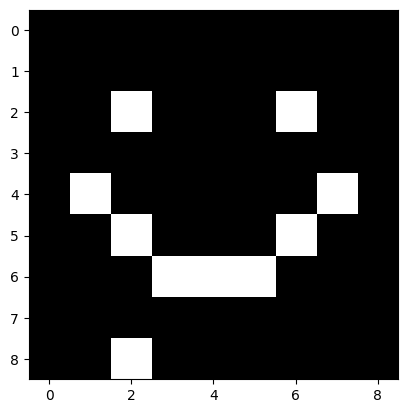

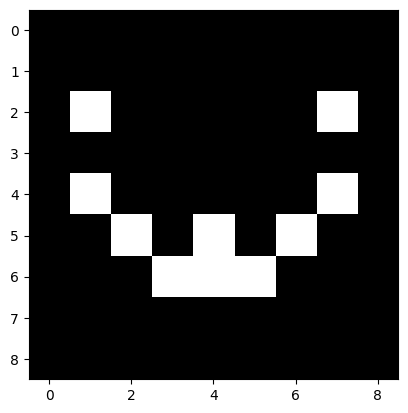

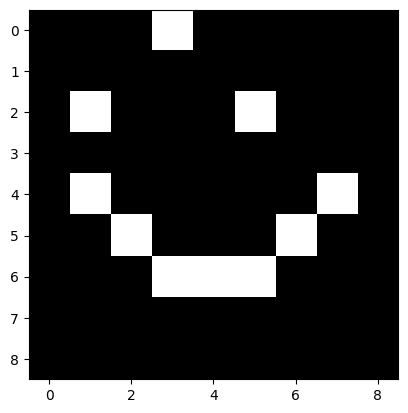

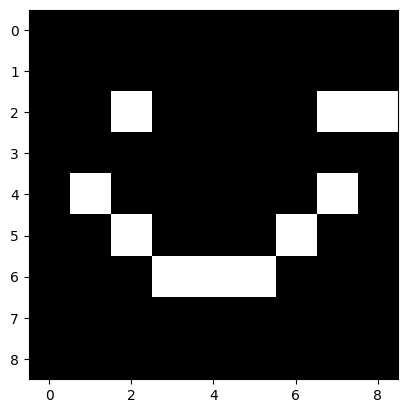

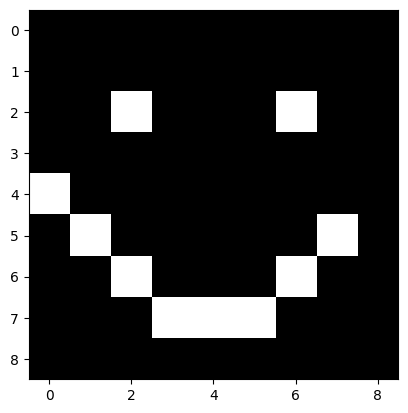

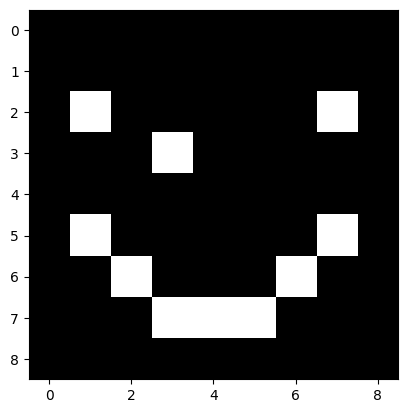

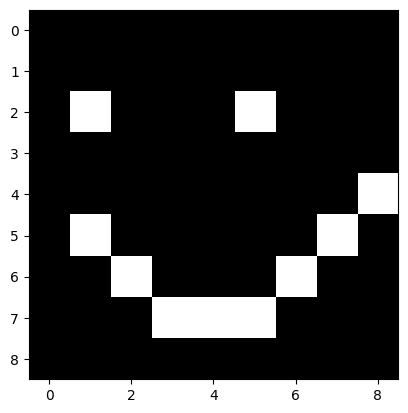

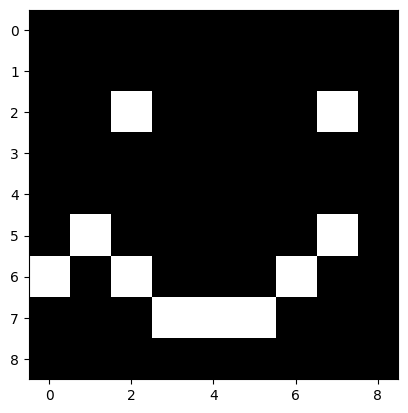

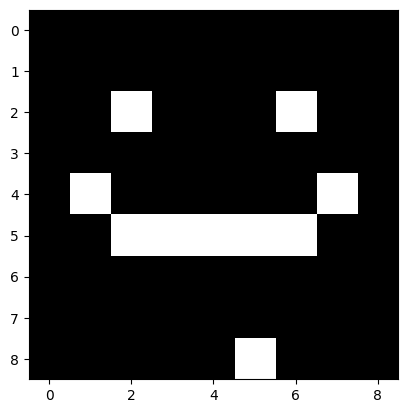

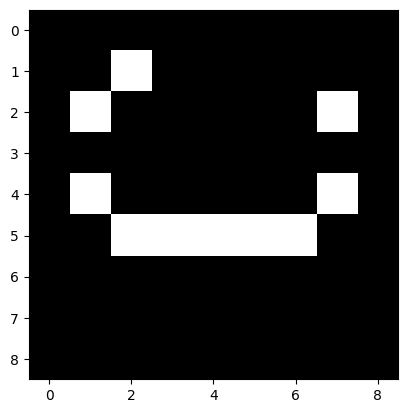

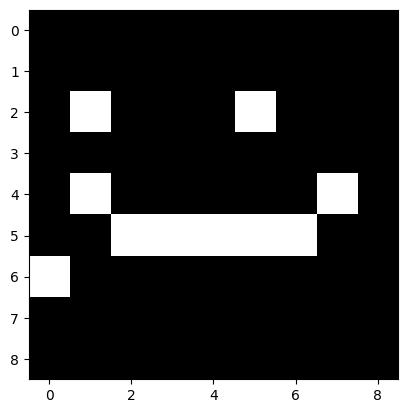

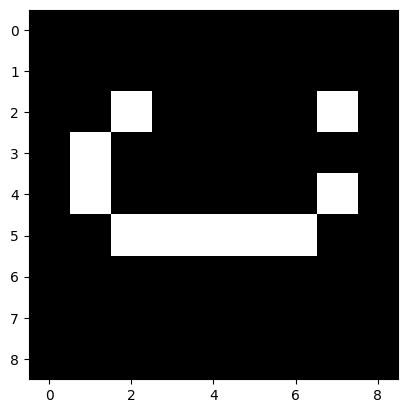

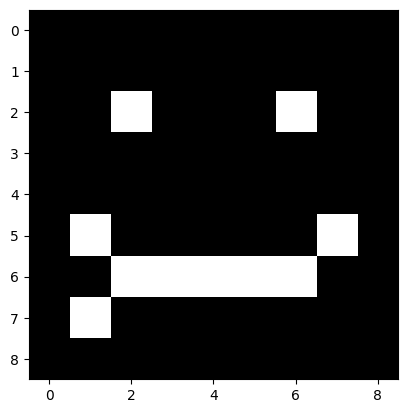

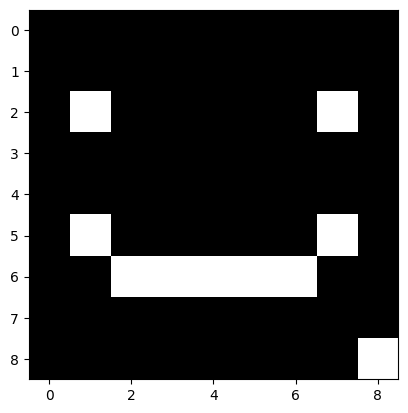

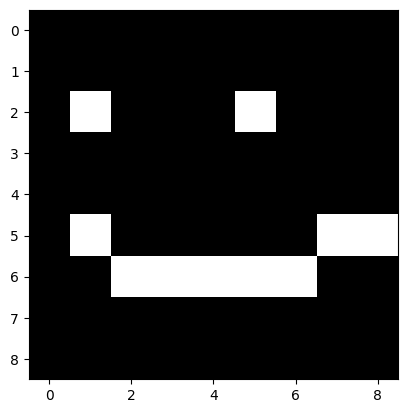

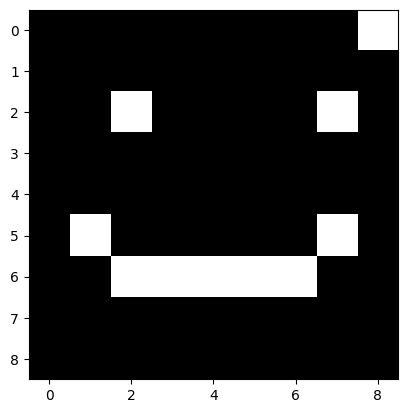

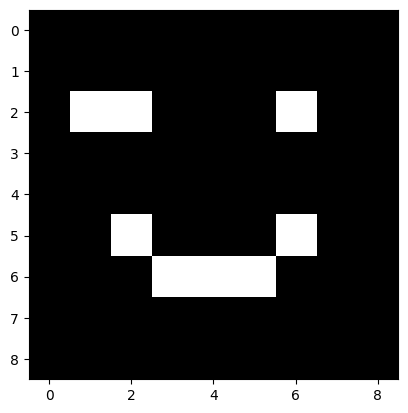

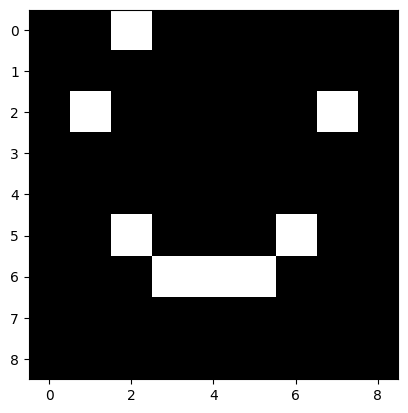

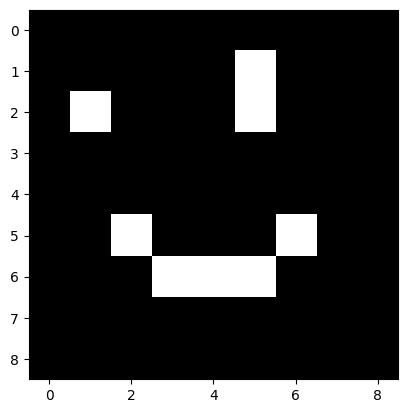

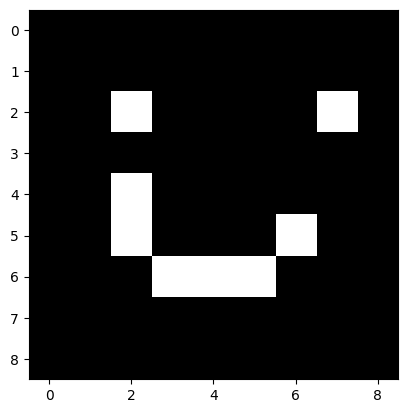

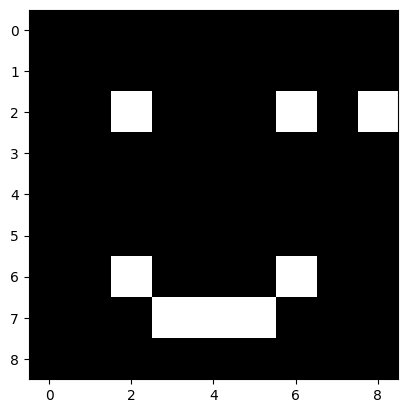

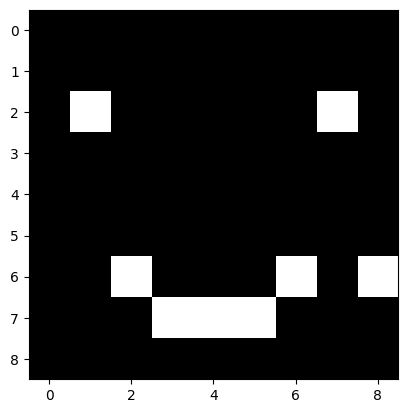

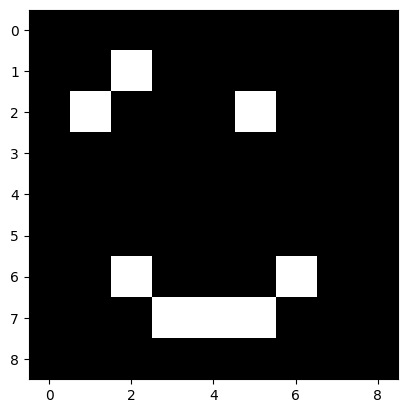

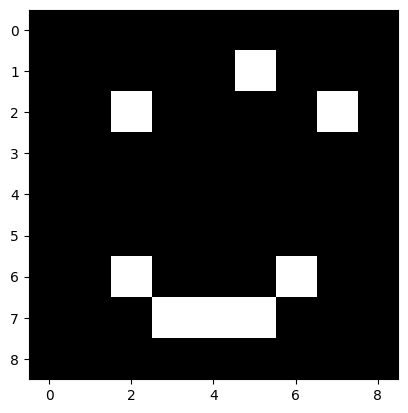

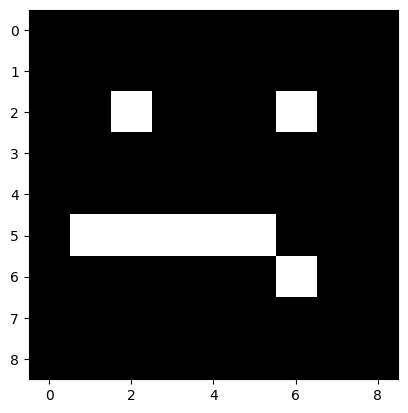

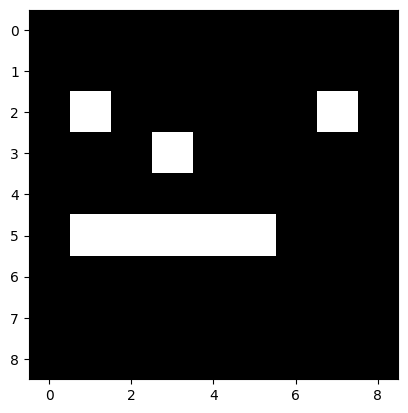

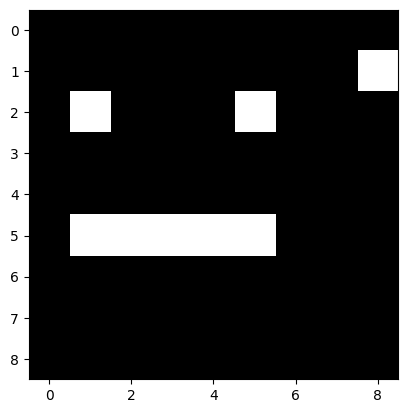

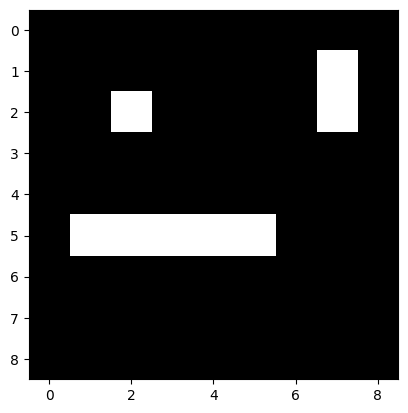

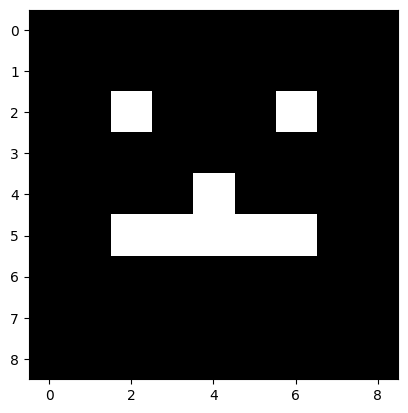

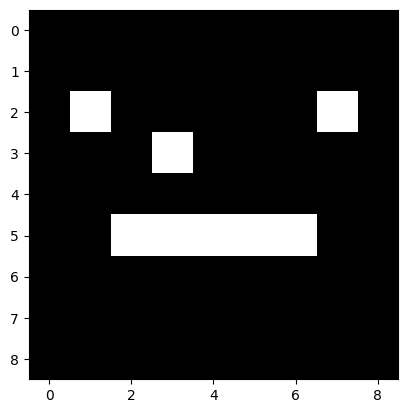

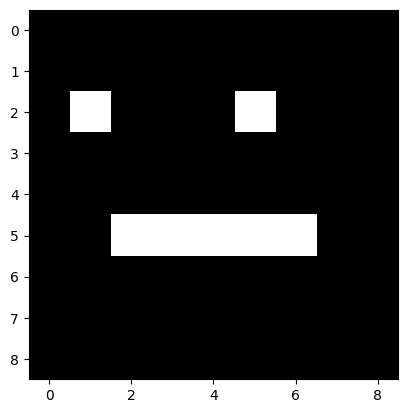

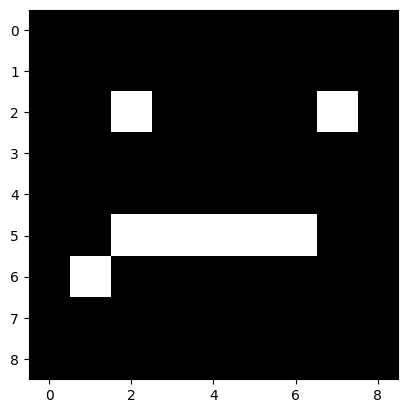

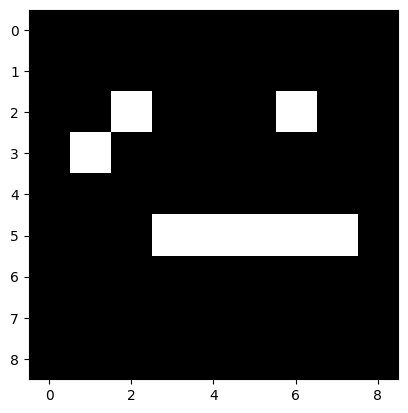

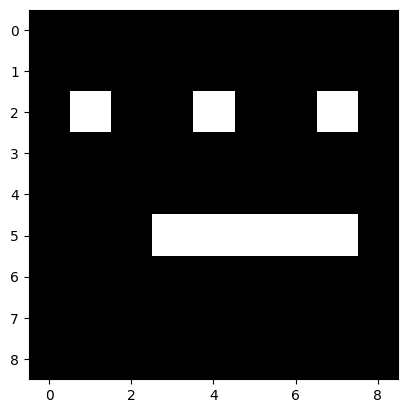

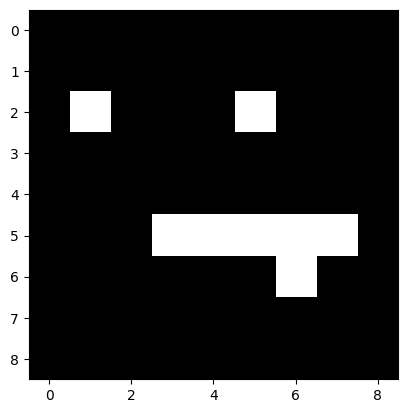

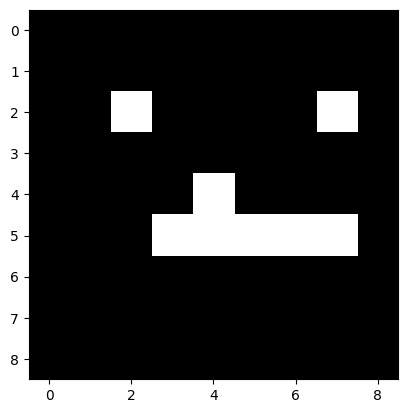

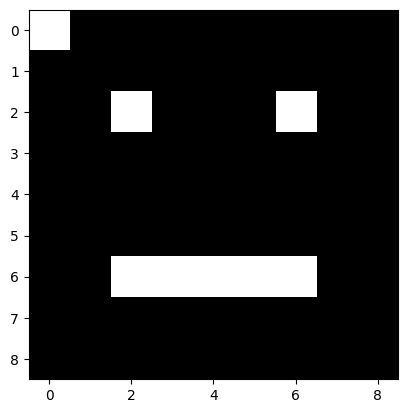

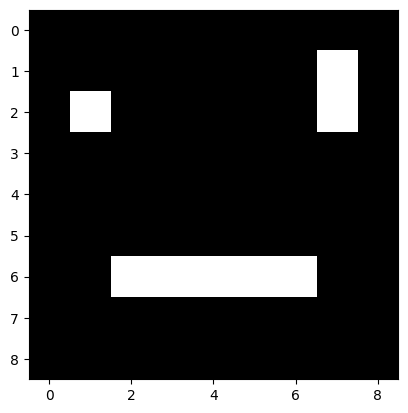

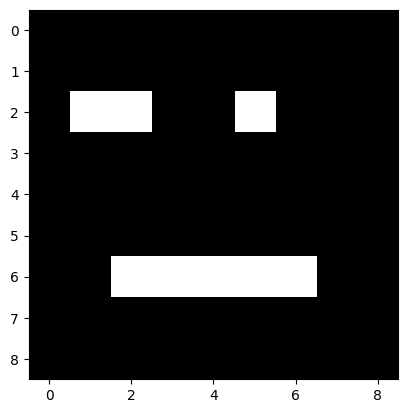

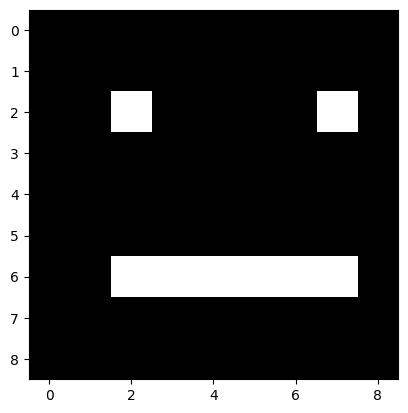

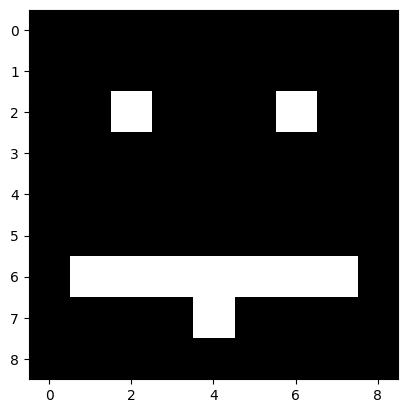

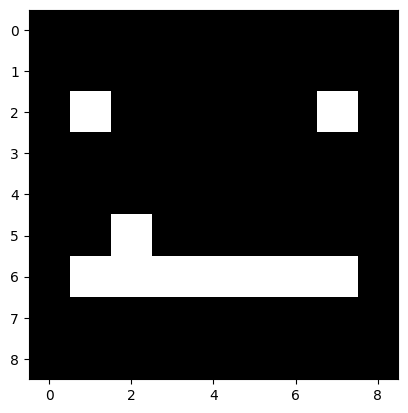

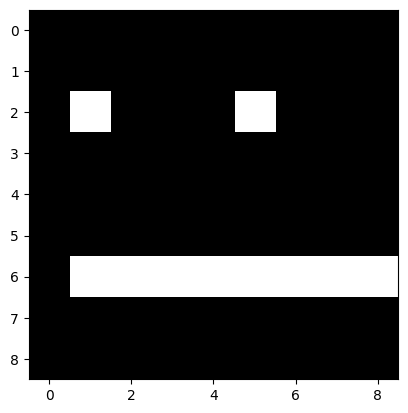

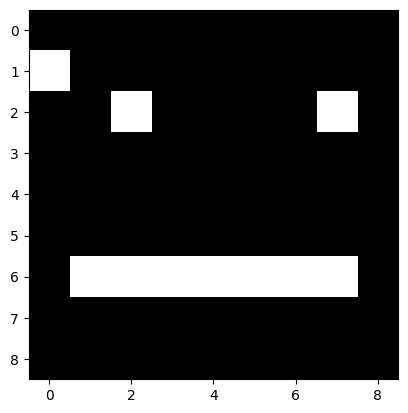

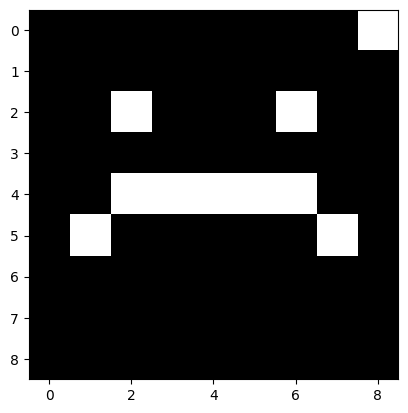

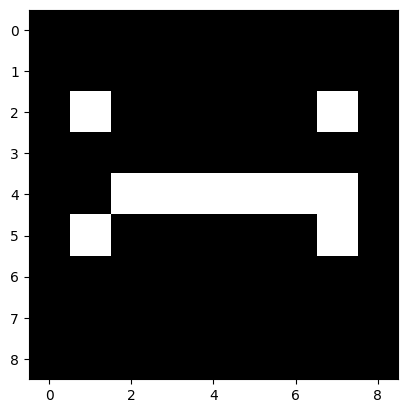

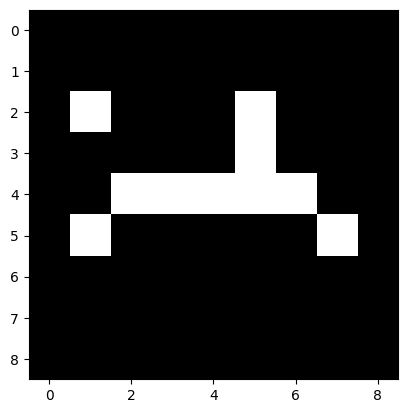

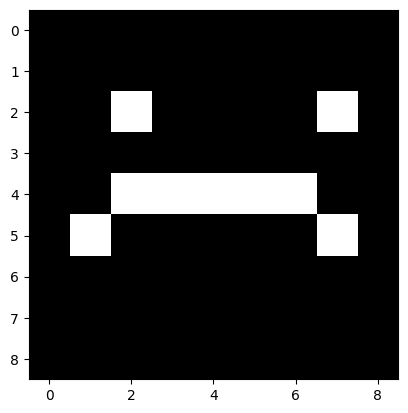

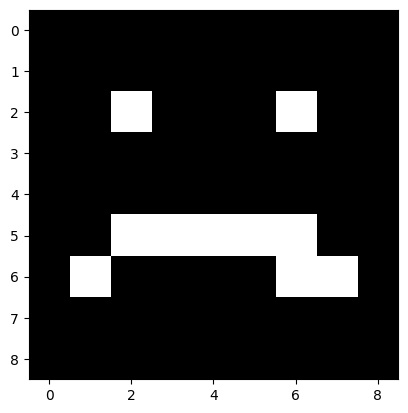

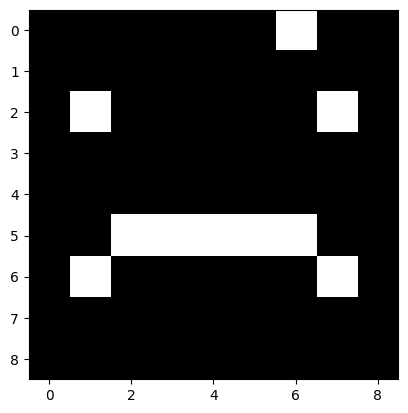

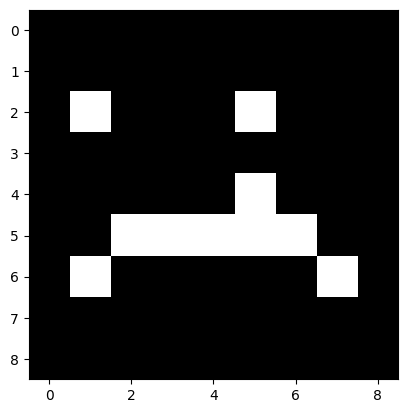

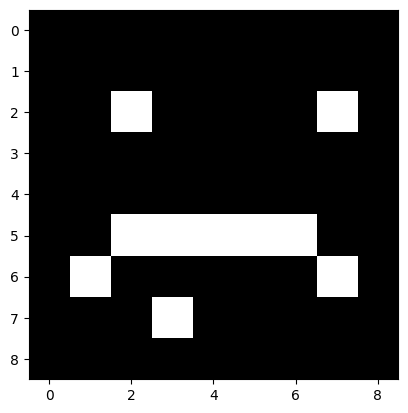

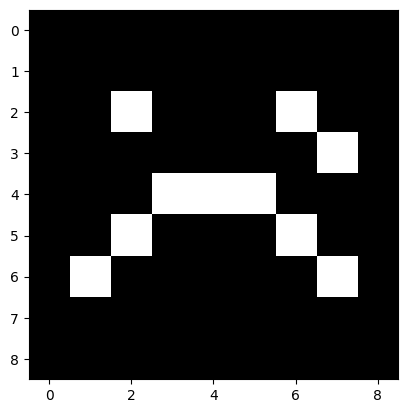

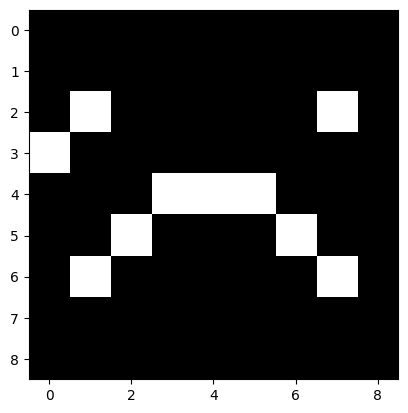

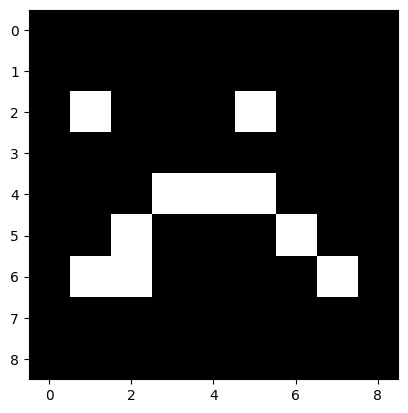

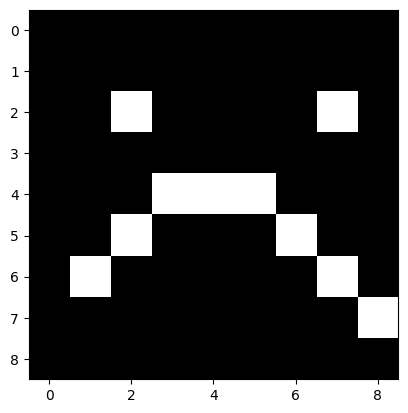

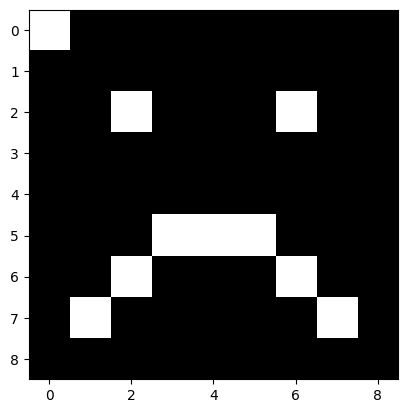

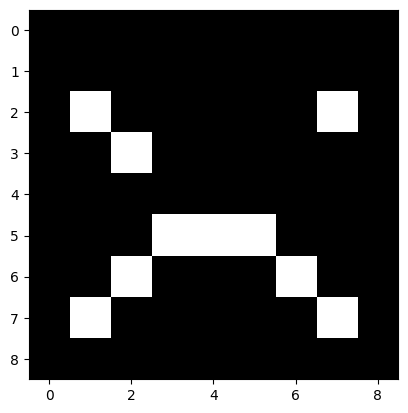

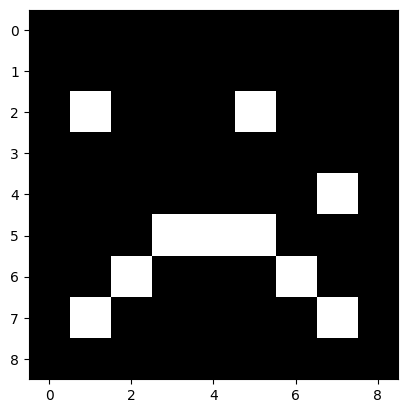

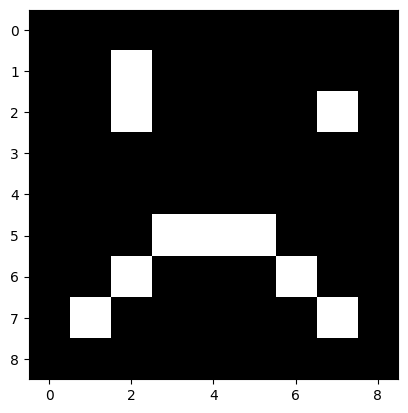

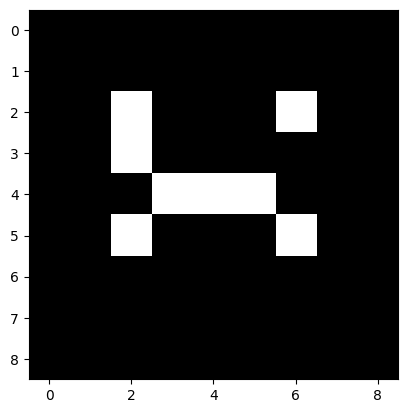

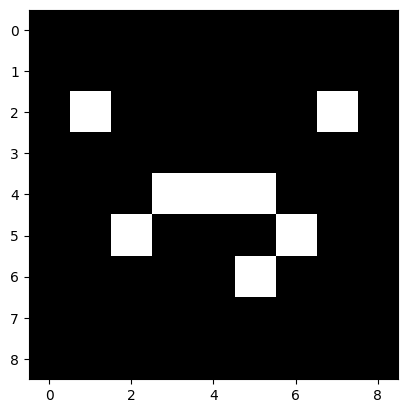

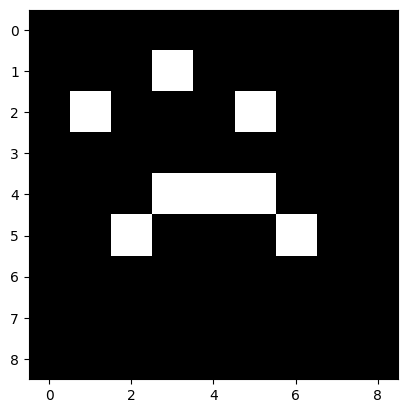

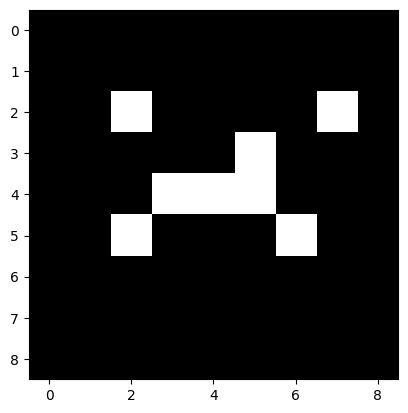

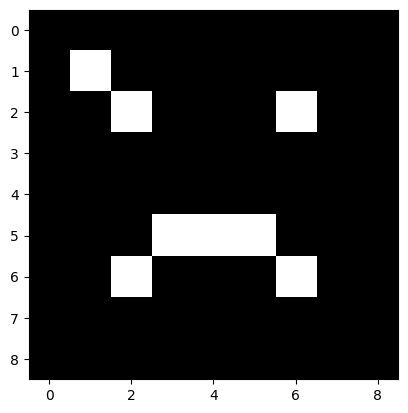

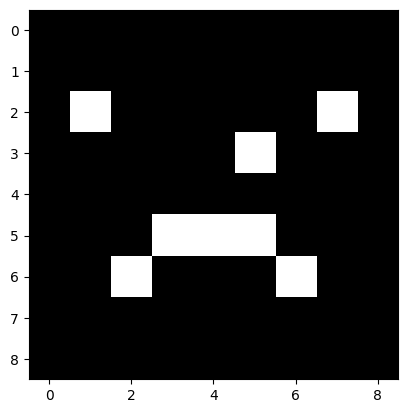

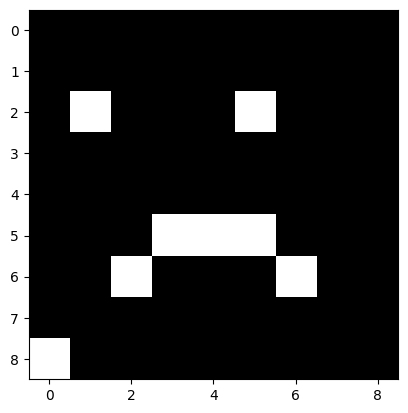

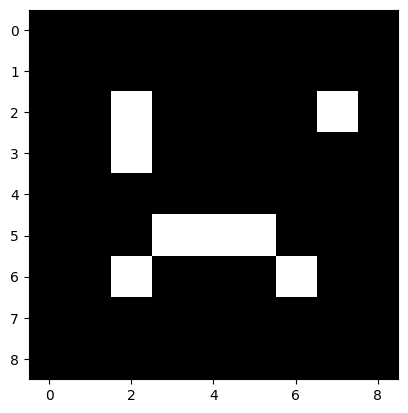

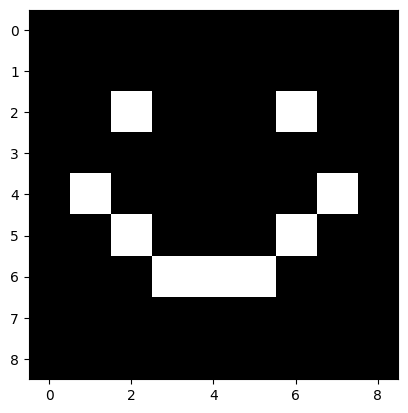

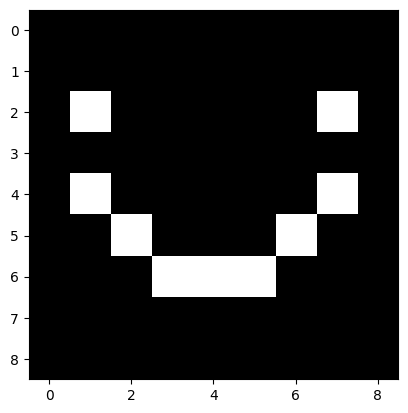

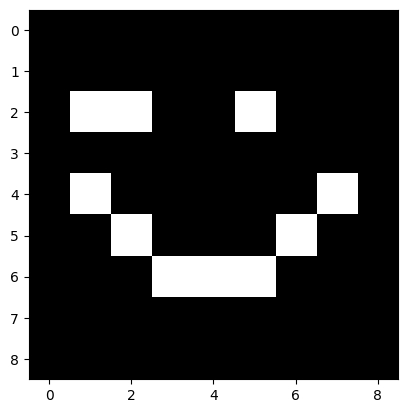

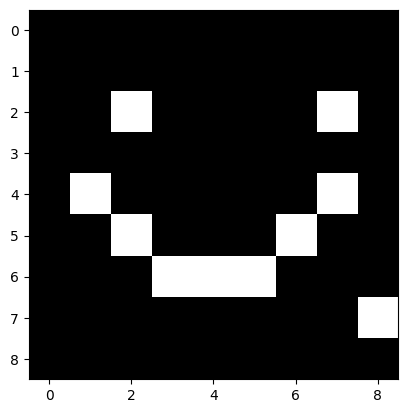

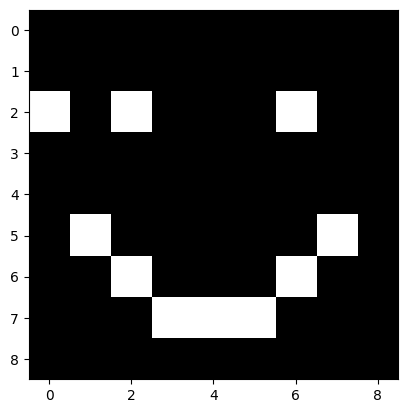

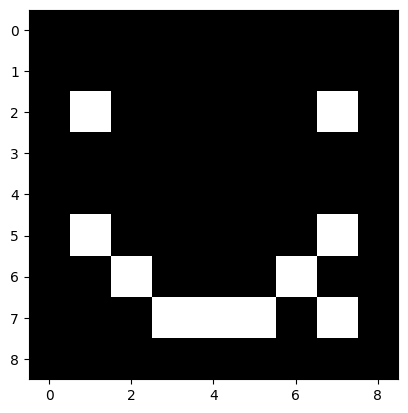

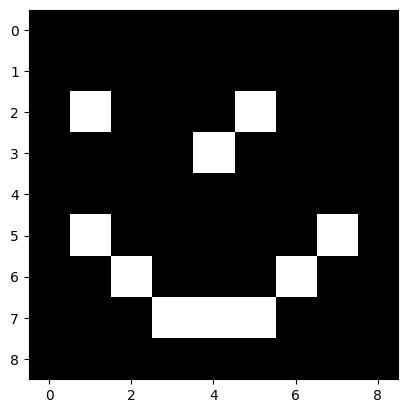

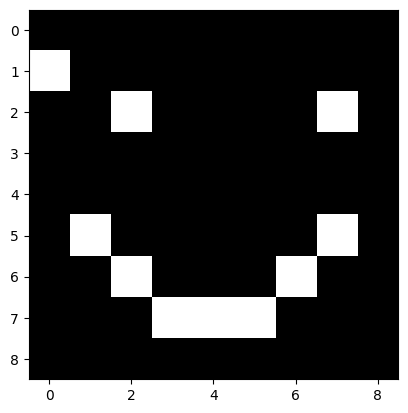

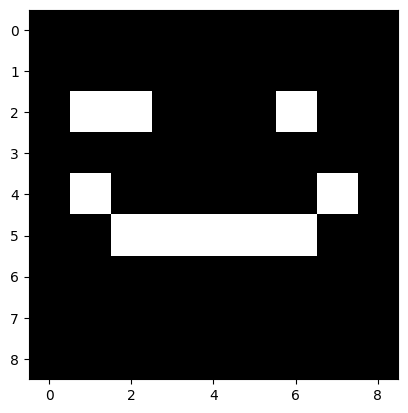

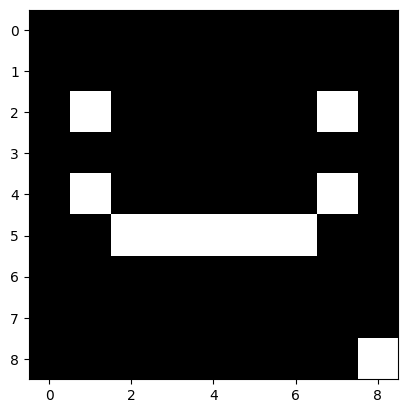

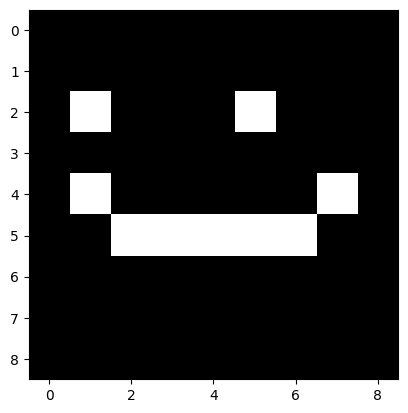

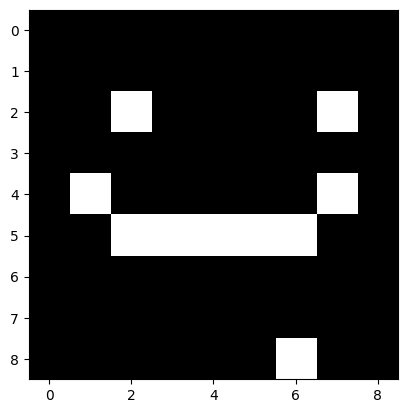

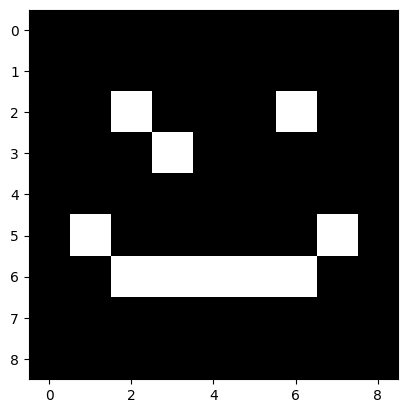

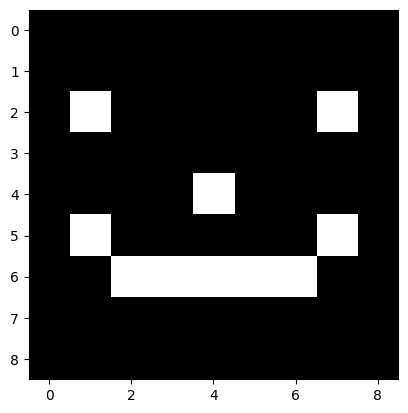

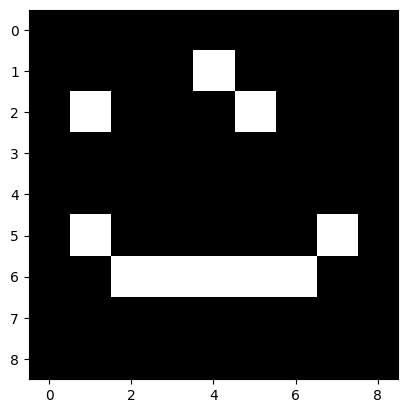

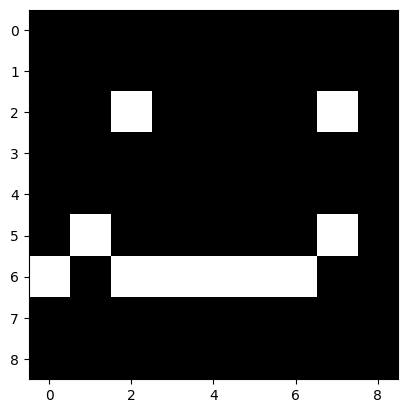

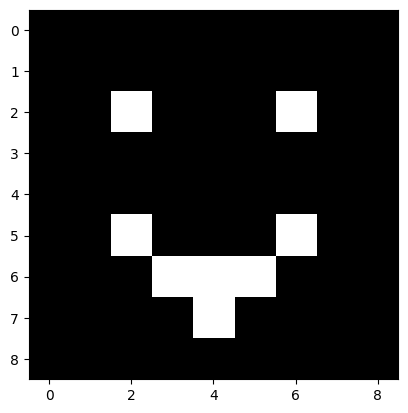

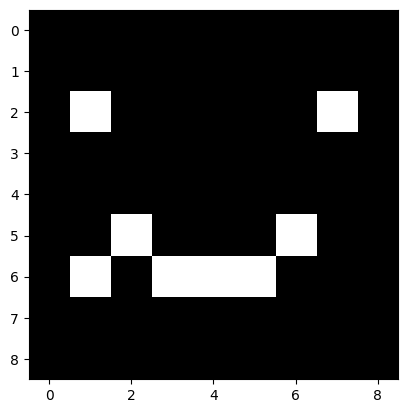

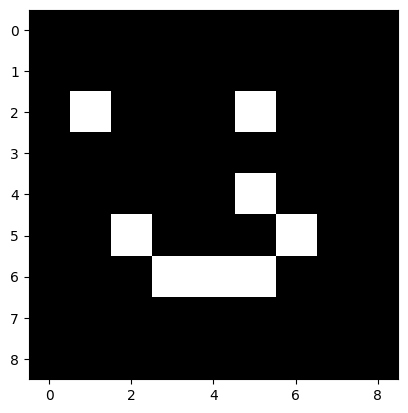

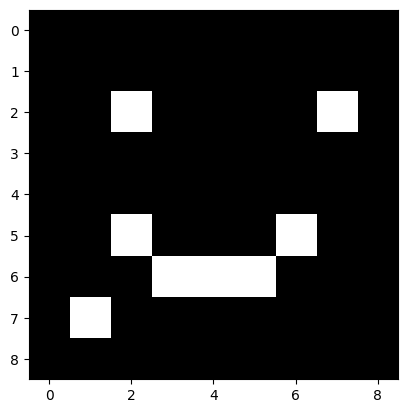

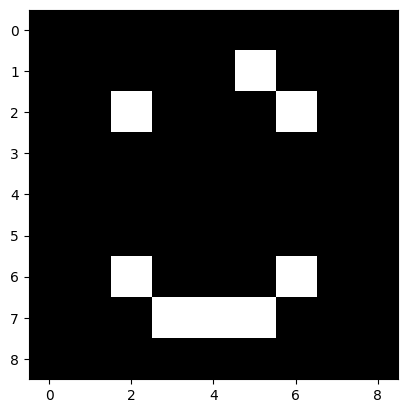

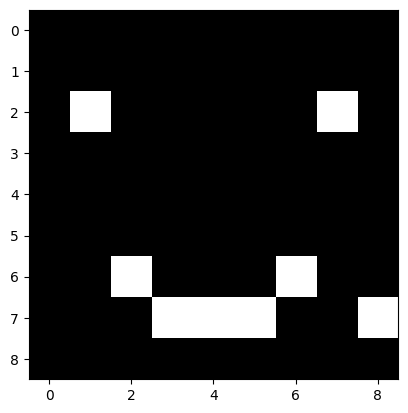

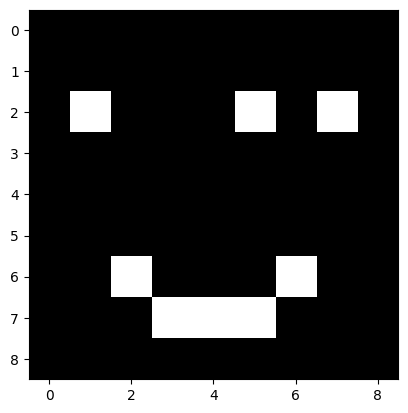

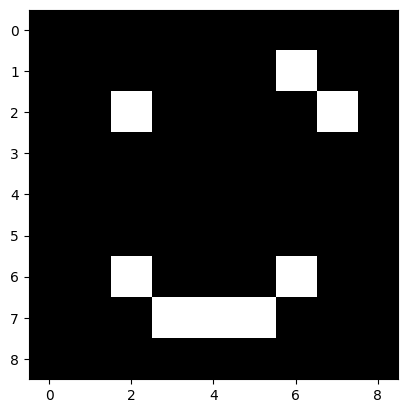

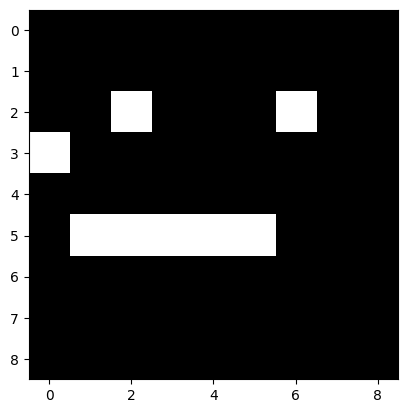

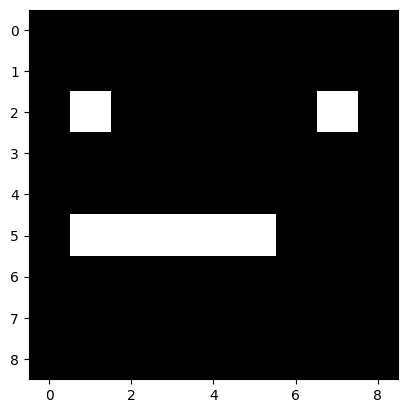

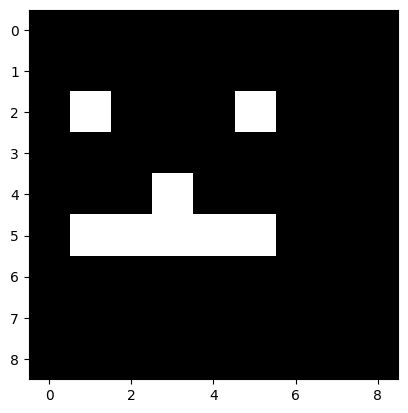

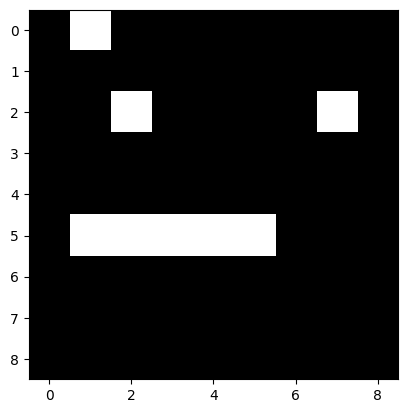

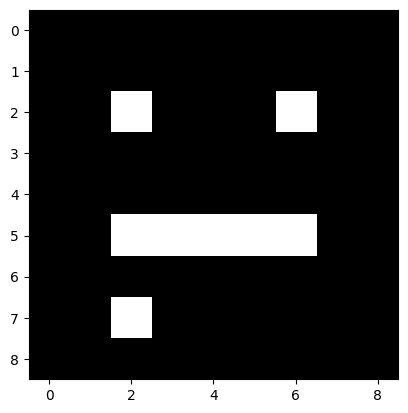

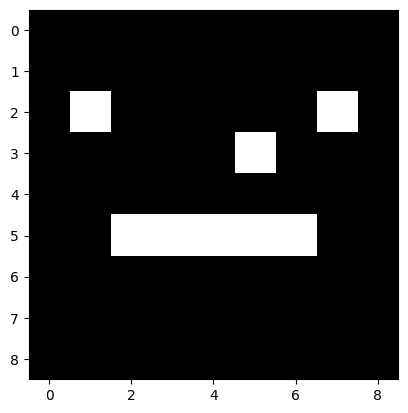

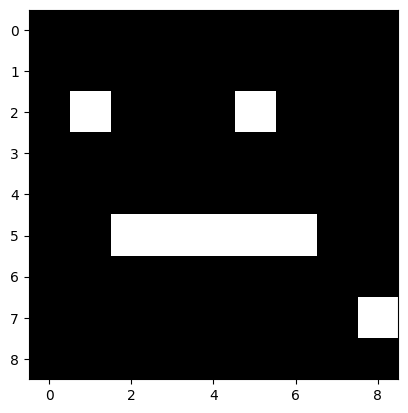

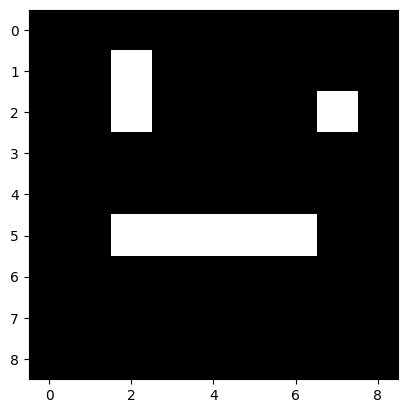

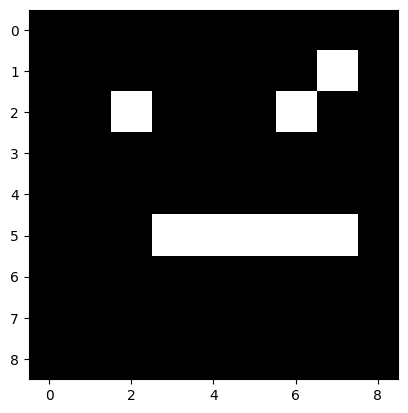

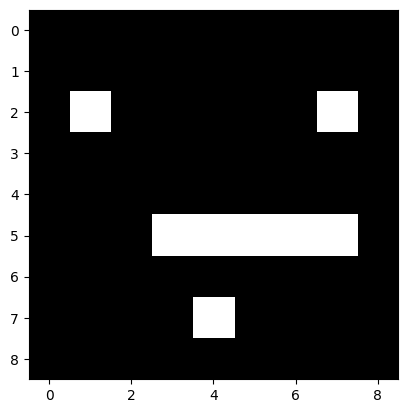

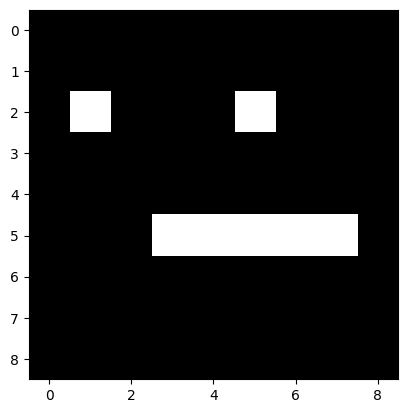

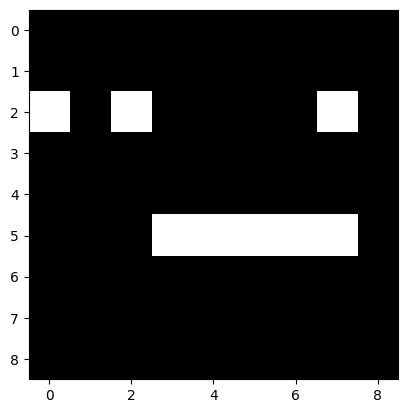

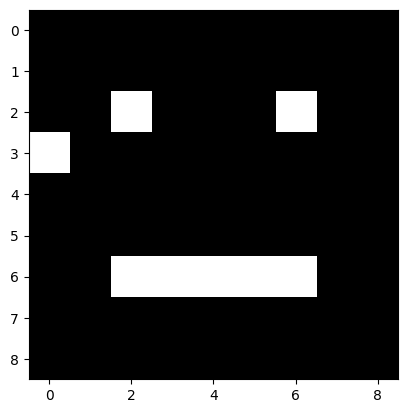

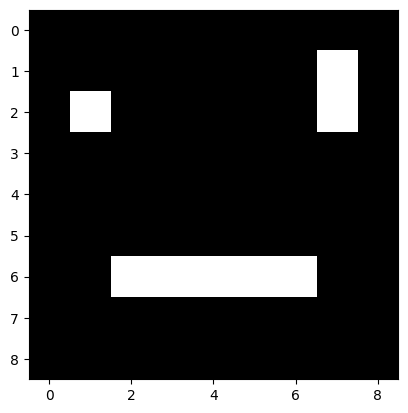

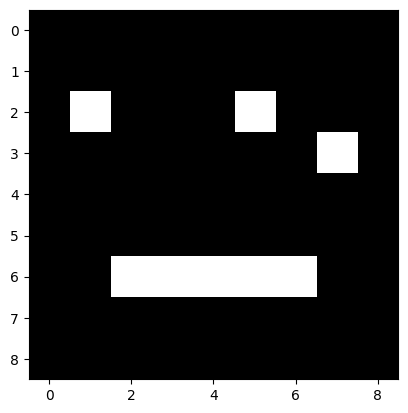

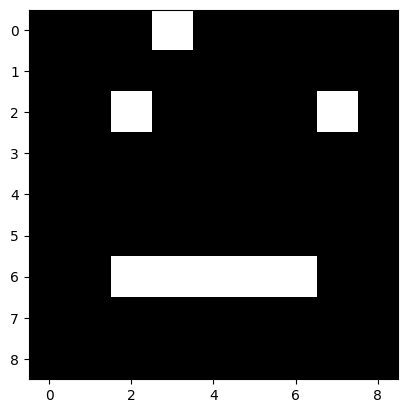

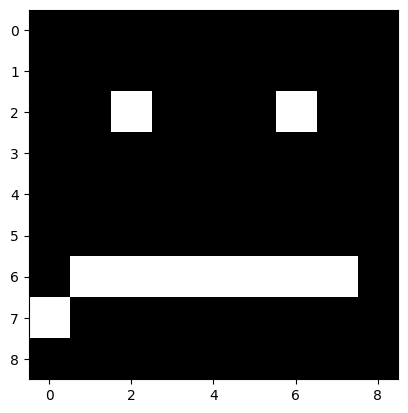

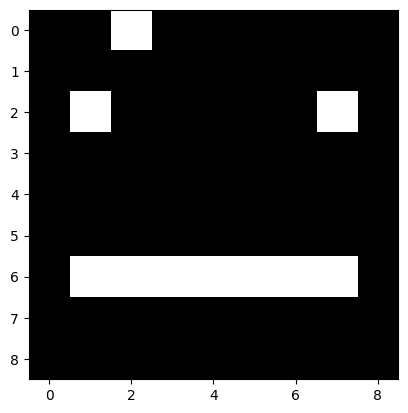

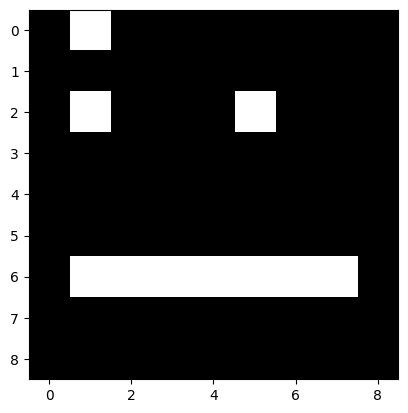

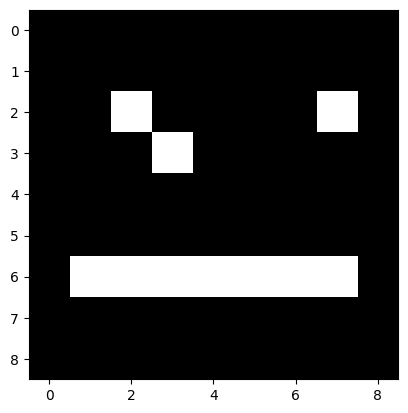

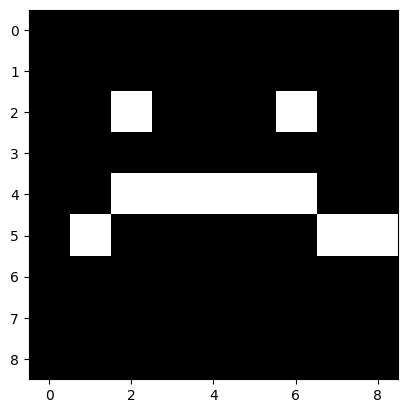

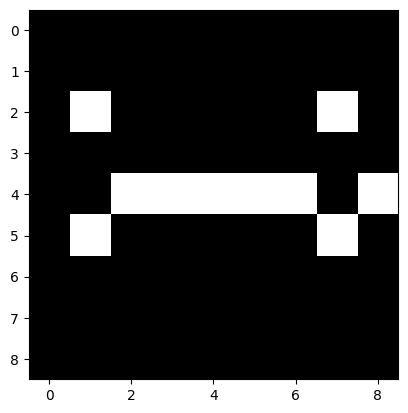

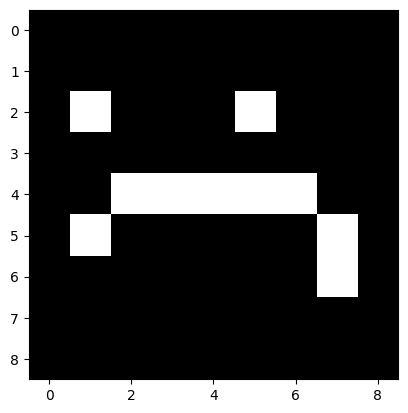

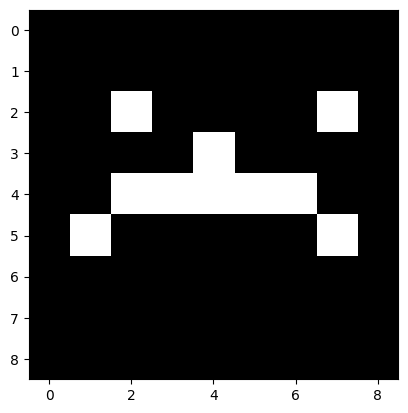

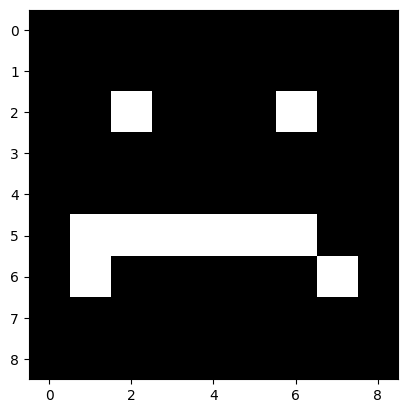

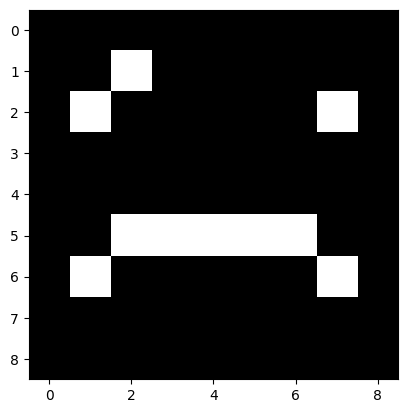

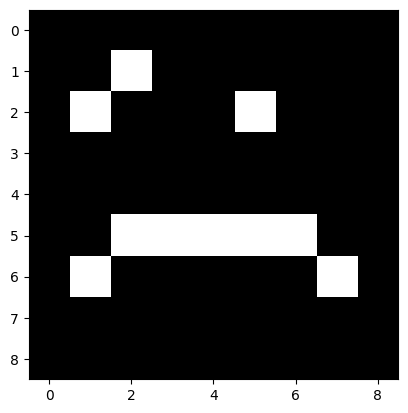

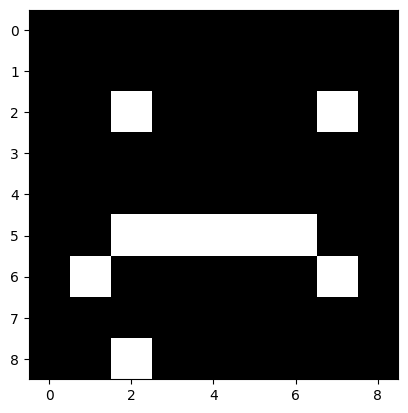

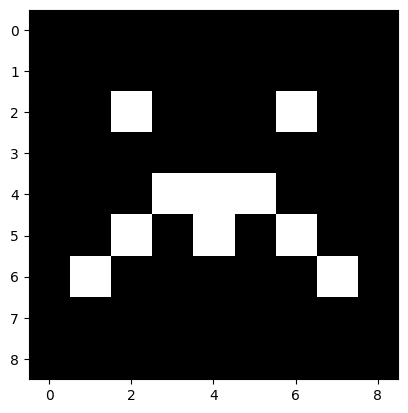

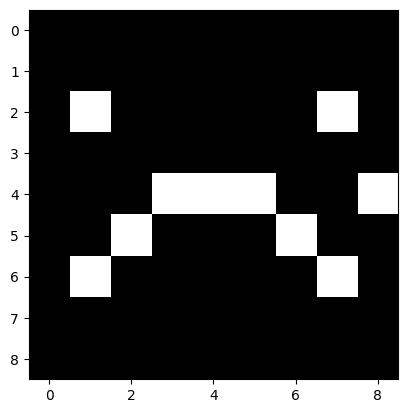

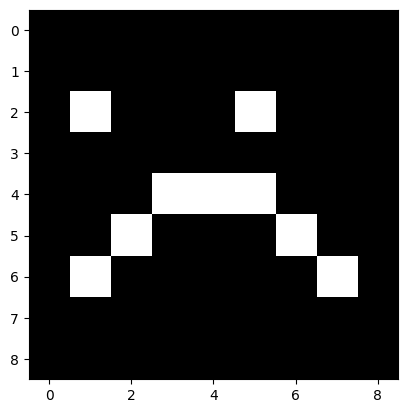

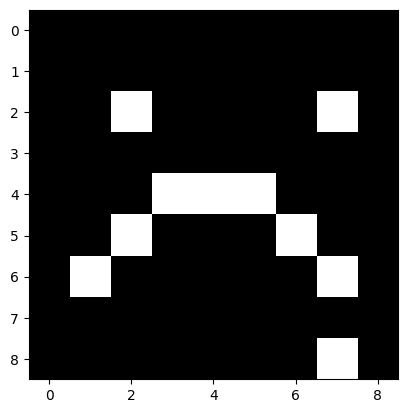

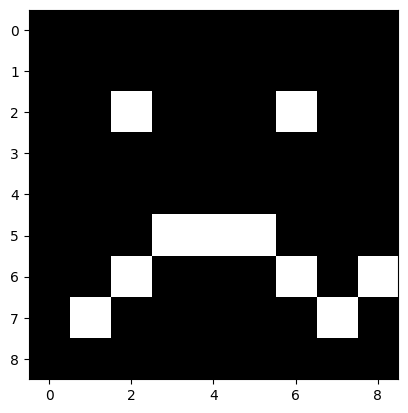

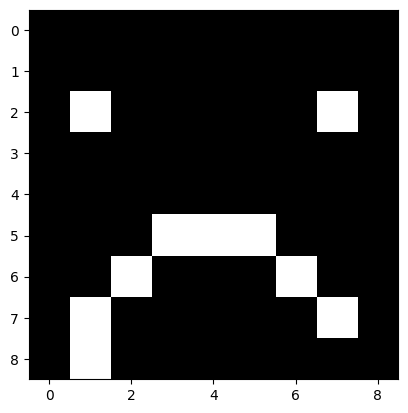

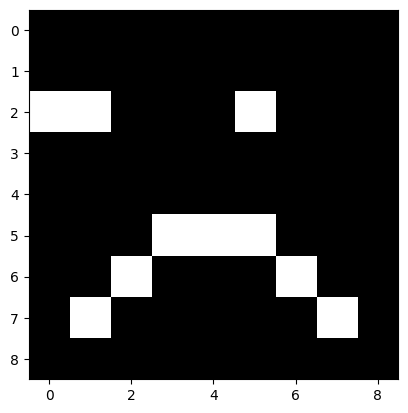

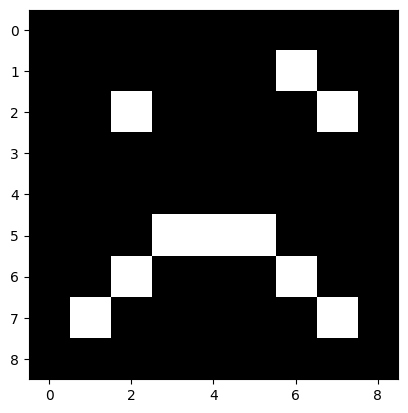

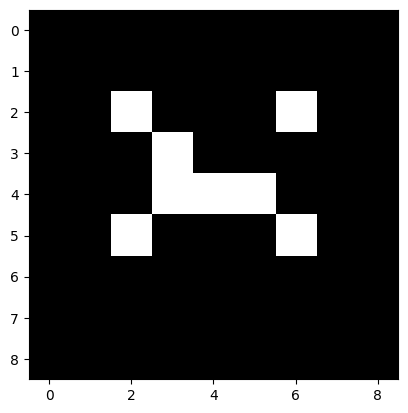

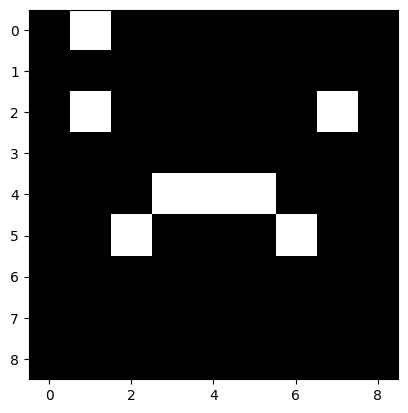

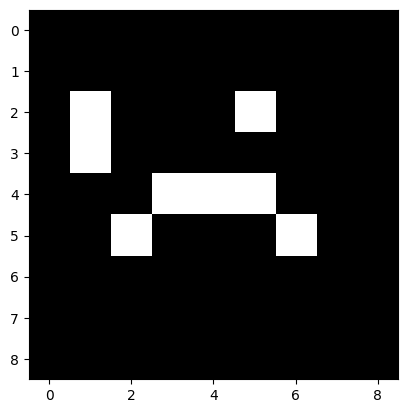

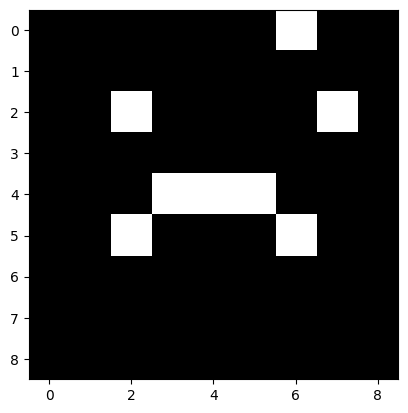

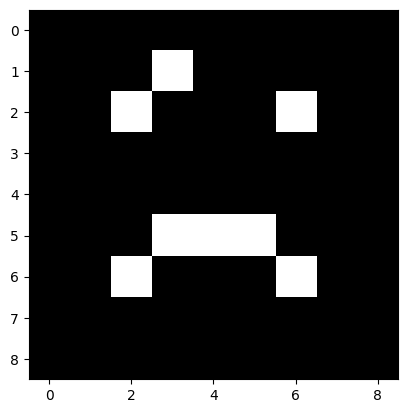

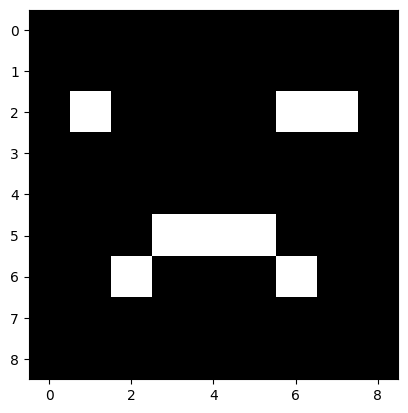

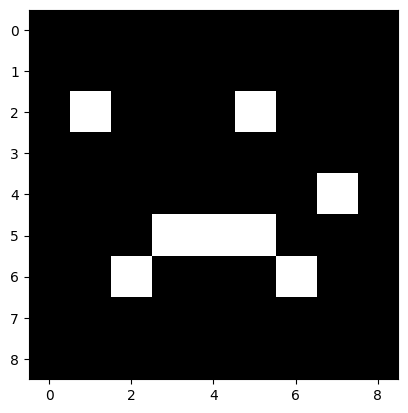

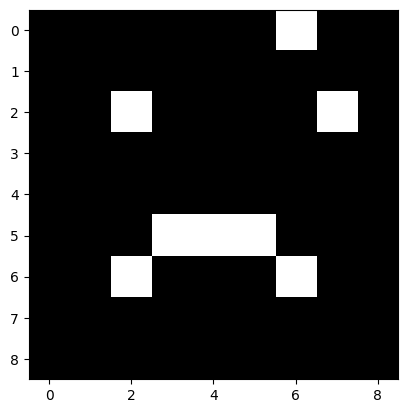

In [ ]:
from PIL import Image

from matplotlib import pyplot as plt

for i in range(len(A)):
  plt.imshow(A[i], cmap = 'gray')
  plt.show()

In [ ]:
# Reshape the grayscale images array to 2D
images_2d = A.reshape(A.shape[0], -1)


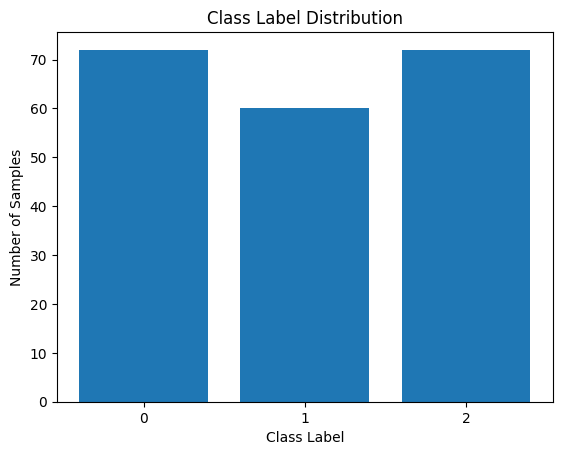

Percentage of data represented by each class:
Class 0.0: 35.29%
Class 1.0: 29.41%
Class 2.0: 35.29%


In [ ]:
# Count the occurrences of each class label
unique_labels, label_counts = np.unique(B, return_counts=True)

# Plot the class label distribution
plt.bar(unique_labels, label_counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Label Distribution')
plt.xticks(unique_labels)
plt.show()

# Calculate the percentage of data represented by each class
total_samples = len(B)
percentage_per_class = label_counts / total_samples * 100

print(f"Percentage of data represented by each class:")
for label, percentage in zip(unique_labels, percentage_per_class):
    print(f"Class {label}: {percentage:.2f}%")

In [ ]:
print(A.size)
print(A.dtype)
print(A.nbytes)

16524
float64
132192


In [ ]:
print(np.median(A))
print(np.average(A))
print(np.mean(A))
print(np.std(A))
print(np.var(A))

0.0
0.10723795691115953
0.10723795691115953
0.30941554180208825
0.09573797750867982


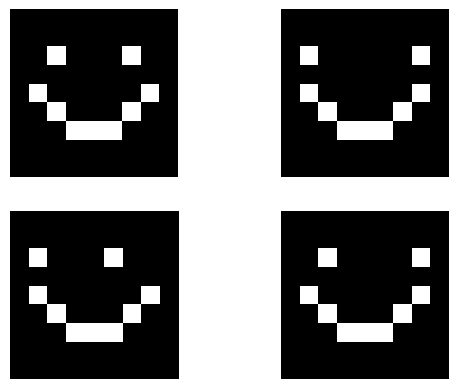

In [ ]:
# Plot a few images
fig, axes = plt.subplots(nrows=2, ncols=2)
for i, ax in enumerate(axes.flat):
    ax.imshow(A[i], cmap ='gray')
    ax.axis('off')
plt.show()

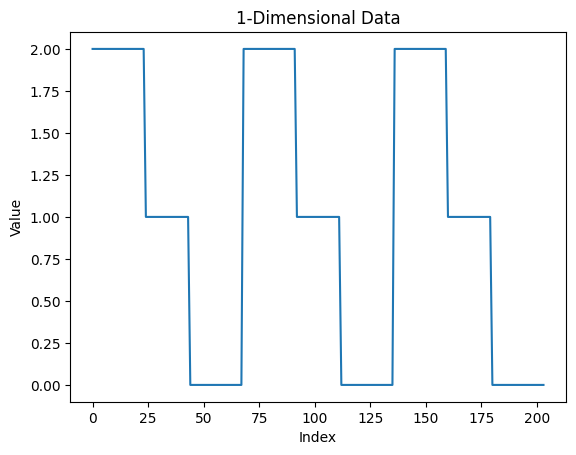

In [ ]:
# Create a line plot
plt.plot(B)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('1-Dimensional Data')
plt.show()

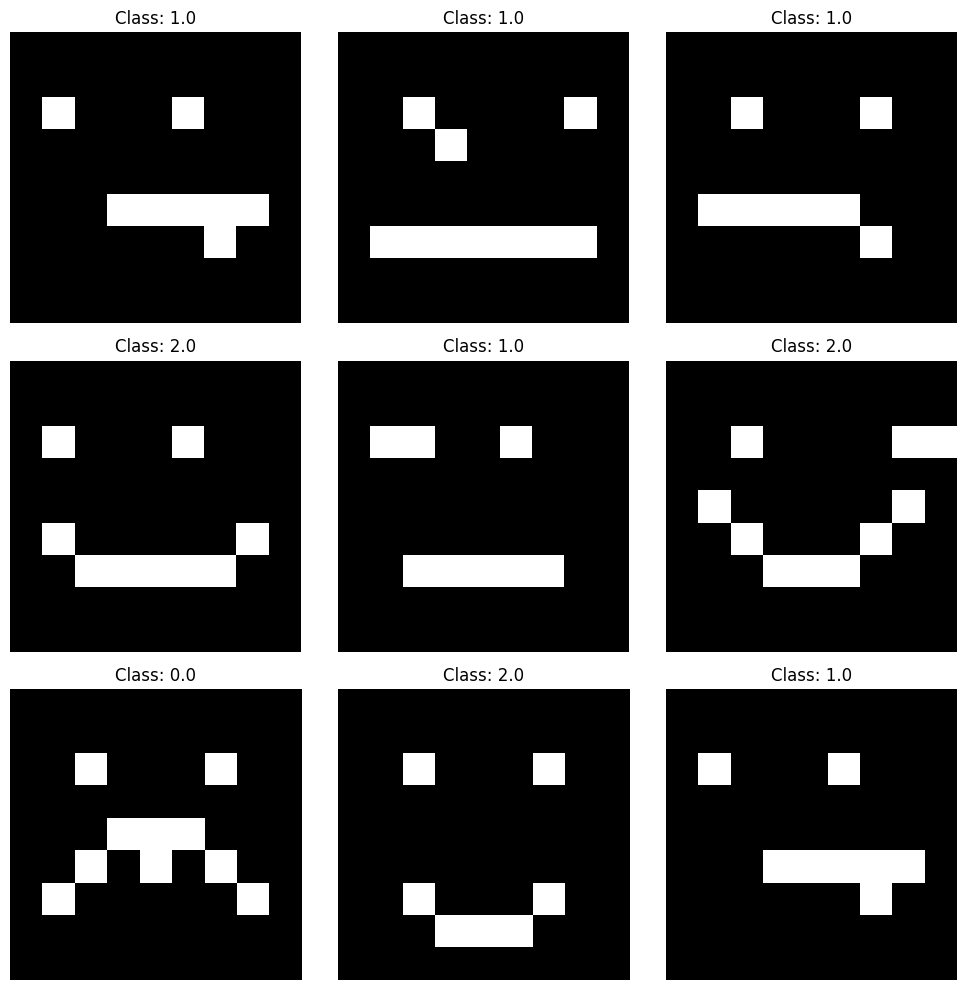

In [ ]:
# Randomly select some images
indices = np.random.randint(0, len(A), size=9)
sample_images = A[indices]
sample_labels = B[indices]

# Plot the images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(sample_images[i], cmap ='gray')
    ax.axis('off')
    ax.set_title(f'Class: {sample_labels[i]}')

plt.tight_layout()
plt.show()

In [ ]:
print("Image data shape:", A.shape)
print("Class labels shape:", B.shape)
print("Number of classes:", len(np.unique(B)))

Image data shape: (204, 9, 9, 1)
Class labels shape: (204,)
Number of classes: 3


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create a training and testing set
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get feature importance
feature_importance = clf.feature_importances_

# Sort features based on their importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Print the feature importance for each class
for class_label in range(3):
    print(f"Class {class_label}:")
    for feature_index in sorted_indices:
        print(f"Feature {feature_index}: Importance {feature_importance[feature_index]}")



Class 0:
Feature 61: Importance 0.0728836771257597
Feature 39: Importance 0.0678258804988808
Feature 52: Importance 0.049588546842411346
Feature 56: Importance 0.04948709264768203
Feature 50: Importance 0.04699419042116011
Feature 41: Importance 0.04679529499658956
Feature 55: Importance 0.04521253069486379
Feature 68: Importance 0.0406821712168533
Feature 51: Importance 0.04060772287179819
Feature 43: Importance 0.04020415211767711
Feature 40: Importance 0.03902812758485745
Feature 46: Importance 0.03752879391850067
Feature 60: Importance 0.03592534342634813
Feature 57: Importance 0.03527185512657029
Feature 59: Importance 0.03488596724485464
Feature 37: Importance 0.03438339571662518
Feature 66: Importance 0.03338535345056747
Feature 47: Importance 0.03271452968188073
Feature 67: Importance 0.02945157354882663
Feature 49: Importance 0.029272074701244474
Feature 58: Importance 0.029051082390523817
Feature 48: Importance 0.027562300607040072
Feature 64: Importance 0.014405380318375476


In [ ]:
# Check for missing data
images_missing = np.isnan(A)
labels_missing = np.isnan(B)

if images_missing.any():
    print("Missing values found in grayscale images.")

if labels_missing.any():
    print("Missing values found in class labels.")

In [ ]:
images_missing = np.isnan(C)

In [ ]:
images_missing

array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]],


       [[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [Fa

In [ ]:
images_missing

array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]],


       [[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [Fa

In [ ]:
!pip3 install opencv-python

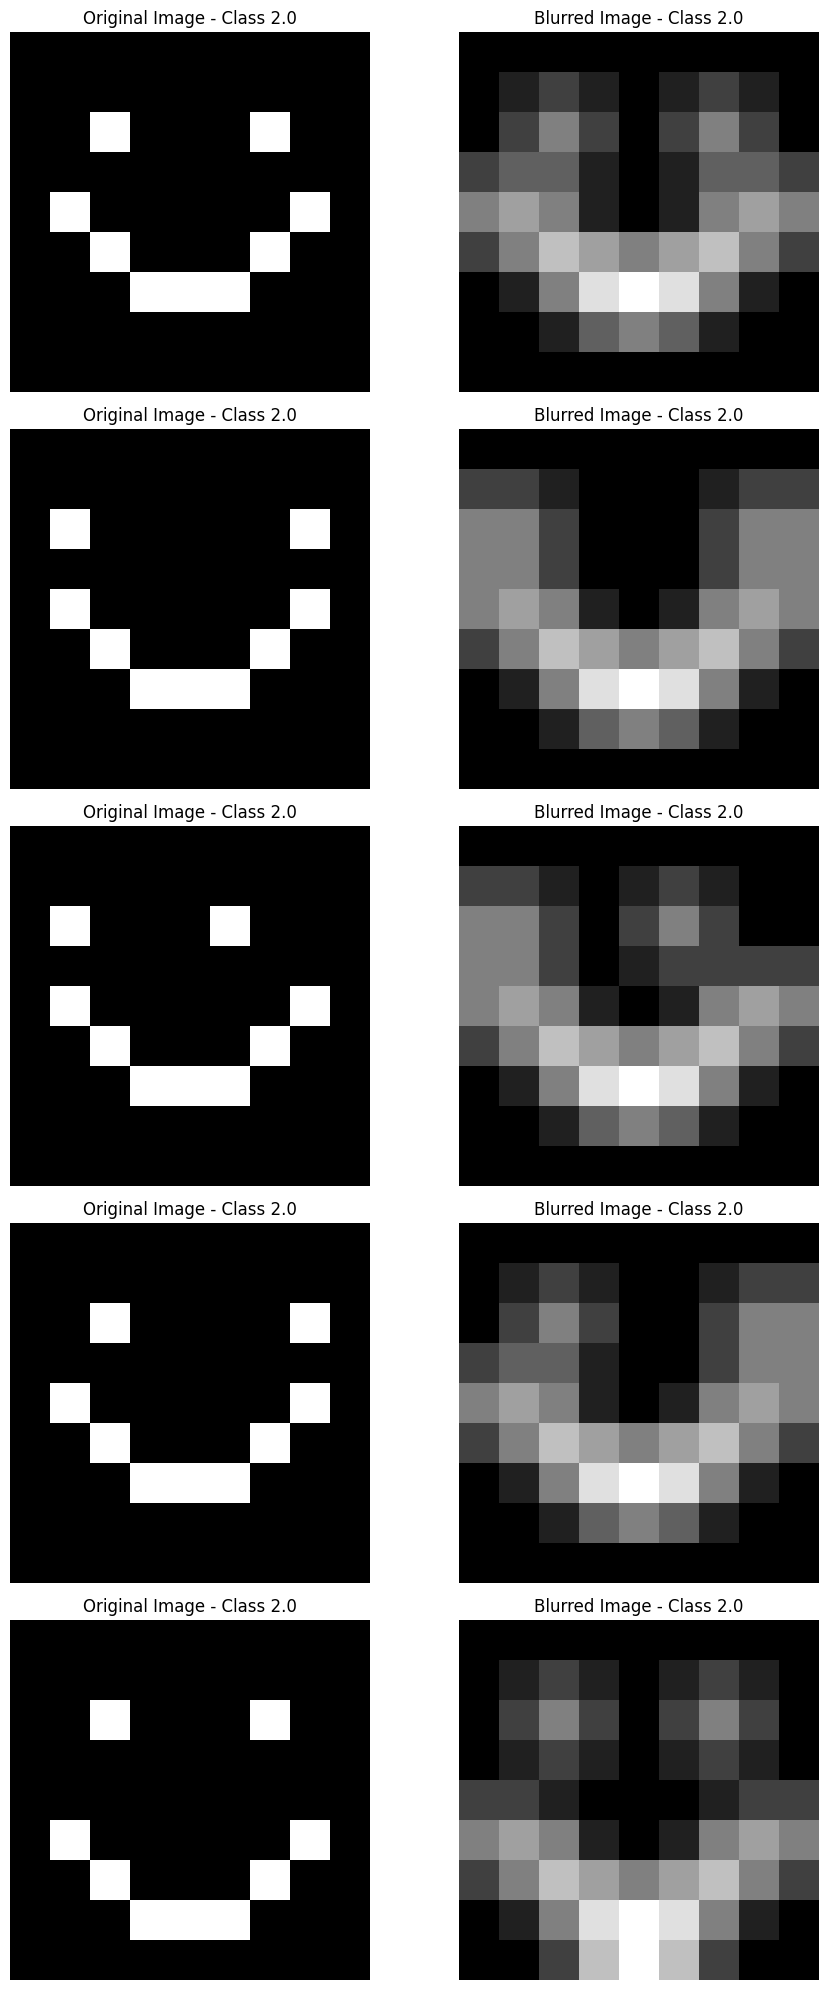

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Apply Gaussian blur to each image in the dataset
def apply_gaussian_blur(A):
    blurred_images = []
    for img in A:
        blurred_img = cv2.GaussianBlur(img, (3, 3), 0)  # Adjust the kernel size based on the noise and the level of noise to be removed
        blurred_images.append(blurred_img)
    return np.array(blurred_images)

# Apply Gaussian blur to the 4-dimensional images
blurred_images = apply_gaussian_blur(A)

# Display the original and blurred images for comparison
# Select a few images to display
num_images_to_display = 5

plt.figure(figsize=(10, 4 * num_images_to_display))

for i in range(num_images_to_display):
    # Original Image
    plt.subplot(num_images_to_display, 2, 2 * i + 1)
    plt.imshow(A[i].squeeze(), cmap='gray')
    plt.title(f"Original Image - Class {B[i]}")
    plt.axis('off')

    # Blurred Image
    plt.subplot(num_images_to_display, 2, 2 * i + 2)
    plt.imshow(blurred_images[i].squeeze(), cmap='gray')
    plt.title(f"Blurred Image - Class {B[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
#In this code, the apply_gaussian_blur function applies Gaussian blur to each image in the dataset using cv2.GaussianBlur() from OpenCV.

#The blurred_images array will contain the images with Gaussian blur applied.

#The code  displays a comparison of the original and blurred images for a few samples to visualize the effect of the Gaussian blur on the images.


In [ ]:
# Reshape the images to (num_samples, height, width)
A = A.reshape(A.shape[0], A.shape[1], A.shape[2])

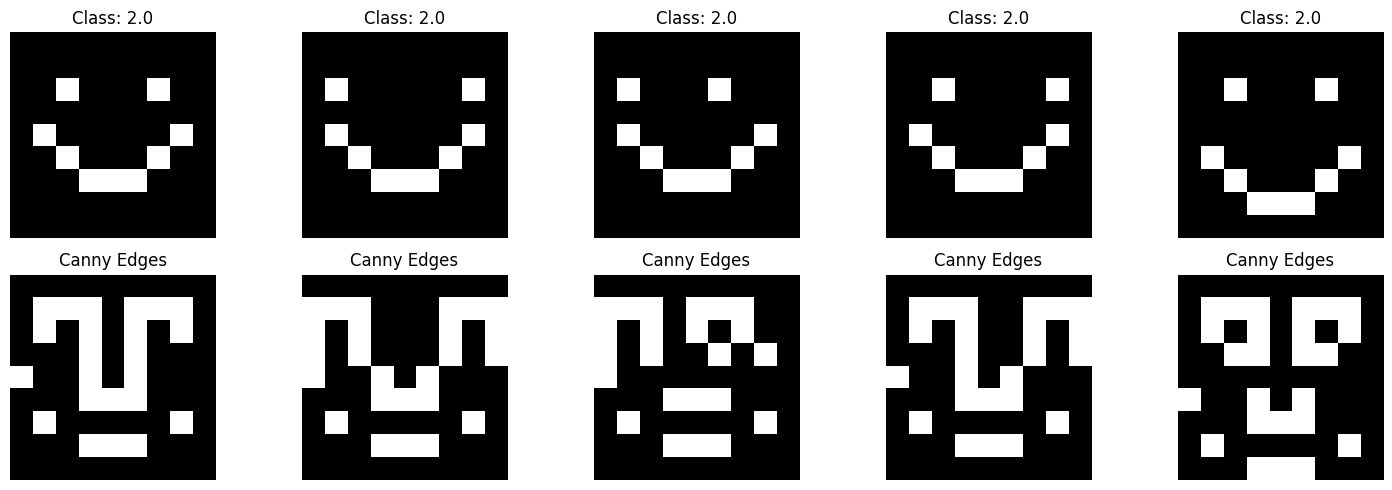

In [ ]:
# Function to apply Canny edge detection to an image
def apply_canny_edge_detection(image):
    # Convert the image to uint8 for OpenCV
    image_uint8 = (image * 255).astype(np.uint8)
    # Apply Canny edge detection
    edges = cv2.Canny(image_uint8, threshold1=30, threshold2=100)
    return edges

# Visualize the original images and their edges
num_images_to_plot = 5  # Number of images to visualize
plt.figure(figsize=(15, 5))
for i in range(num_images_to_plot):
    plt.subplot(2, num_images_to_plot, i + 1)
    plt.imshow(A[i].squeeze(), cmap='gray')
    plt.title(f"Class: {B[i]}")
    plt.axis('off')

    plt.subplot(2, num_images_to_plot, i + num_images_to_plot + 1)
    edges = apply_canny_edge_detection(A[i].squeeze())
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis('off')

plt.tight_layout()
plt.show()

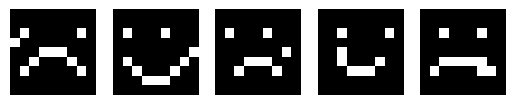

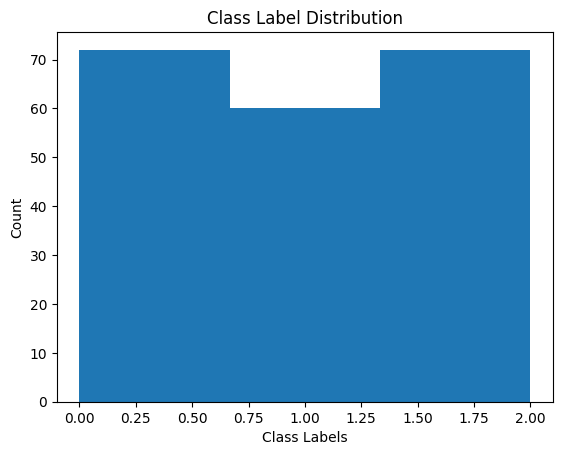

In [ ]:
# Visual inspection of grayscale images
num_images_to_display = 5
random_indices = np.random.choice(len(A), num_images_to_display)

fig, axes = plt.subplots(1, num_images_to_display)
for i, ax in enumerate(axes):
    ax.imshow(A[random_indices[i]], cmap='gray')
    ax.axis('off')

plt.show()

# Analysis of class label distribution
plt.hist(B, bins=3)  # Assuming there are 3 classes
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Label Distribution')
plt.show()

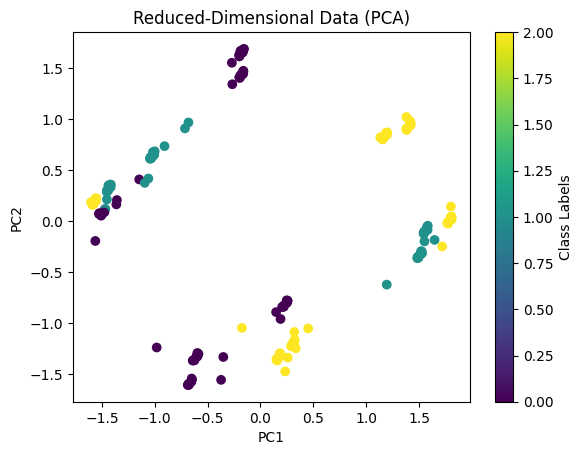

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
images_reduced = pca.fit_transform(images_2d)

# Plot the reduced-dimensional data
plt.scatter(images_reduced[:, 0], images_reduced[:, 1], c=B)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Reduced-Dimensional Data (PCA)')
plt.colorbar(label='Class Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Class 0.0:
Top Features Dataset 1: [ 0 57 56]
Top Features Dataset 2: [ 0 57 56 55 54 53]



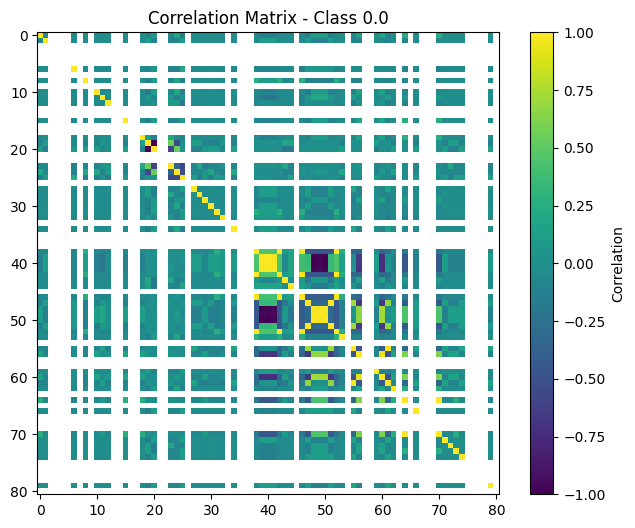

Class 1.0:
Top Features Dataset 1: [ 0 57 56]
Top Features Dataset 2: [ 0 57 56 55 54 53]



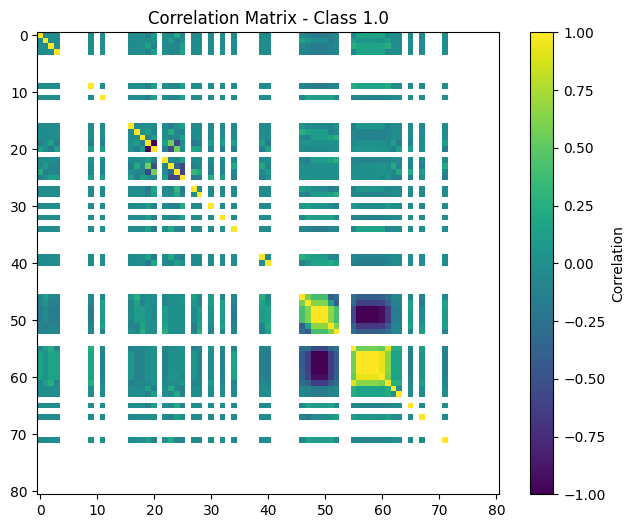

Class 2.0:
Top Features Dataset 1: [58 51 57]
Top Features Dataset 2: [58 51 57 60 59 47]



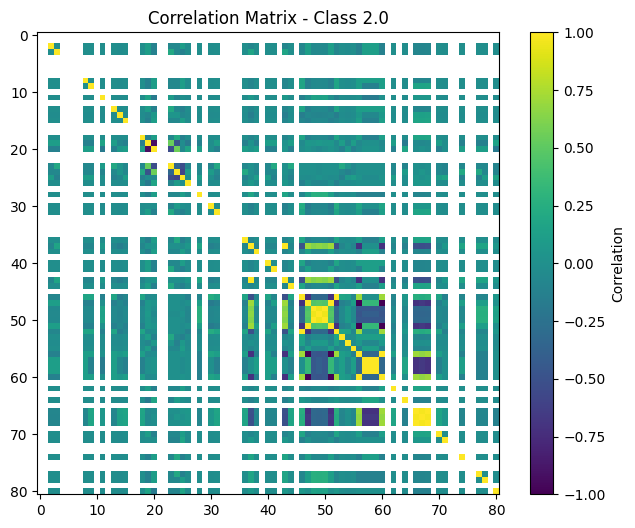

In [ ]:
# Define the number of top features to select for each class
num_top_features_dataset1 = 3
num_top_features_dataset2 = 6

# Iterate over each class
for class_label in np.unique(B):
    # Separate images and labels belonging to the current class
    class_images = images_2d[B == class_label]

    # Calculate the correlation matrix for the current class
    correlation_matrix = np.corrcoef(class_images.T)

    # Sort the correlations for each feature
    feature_correlations = np.abs(correlation_matrix[:-1, -1])
    sorted_indices = np.argsort(feature_correlations)[:-1]

    # Select the top features for the current class
    top_features_dataset1 = sorted_indices[:num_top_features_dataset1]
    top_features_dataset2 = sorted_indices[:num_top_features_dataset2]

    # Create separate datasets for the top features
    dataset1 = class_images[:, top_features_dataset1]
    dataset2 = class_images[:, top_features_dataset2]

    # Display the top features for the current class
    print(f"Class {class_label}:")
    print("Top Features Dataset 1:", top_features_dataset1)
    print("Top Features Dataset 2:", top_features_dataset2)
    print()

    # Visualize the correlations
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap='viridis')
    plt.colorbar(label='Correlation')
    plt.title(f"Correlation Matrix - Class {class_label}")
    plt.show()


Class 0.0:
Top Features Dataset 1: [21 78 79]
Top Features Dataset 2: [24 23 22 21 78 79]



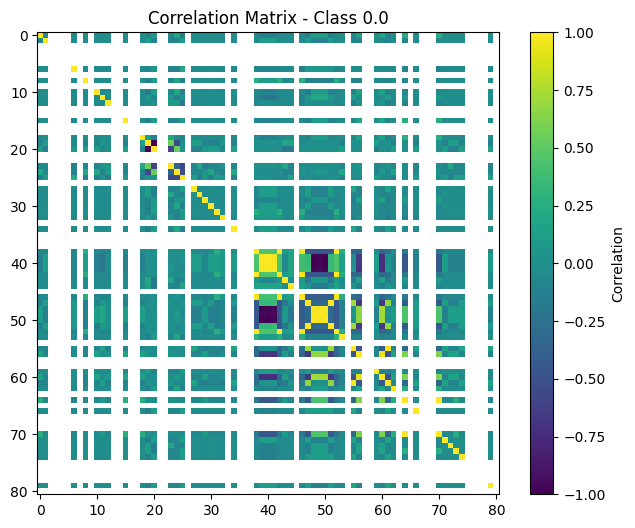

Class 1.0:
Top Features Dataset 1: [21 78 79]
Top Features Dataset 2: [24 23 22 21 78 79]



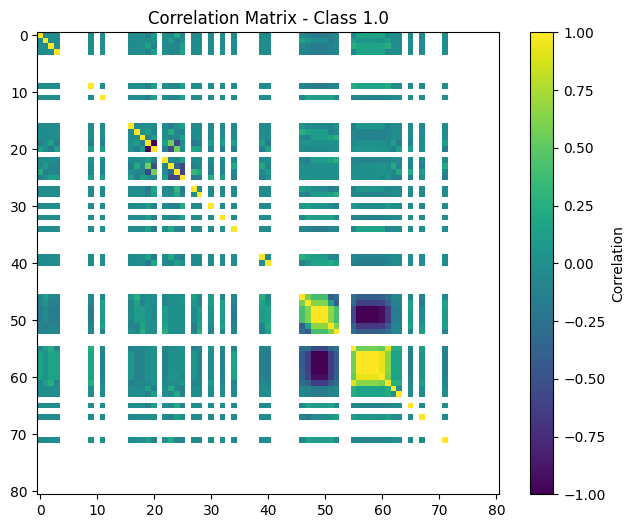

Class 2.0:
Top Features Dataset 1: [35 45 79]
Top Features Dataset 2: [32 33 34 35 45 79]



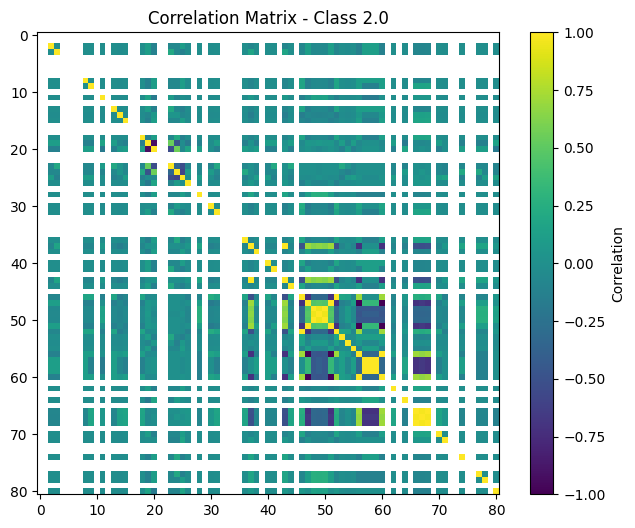

In [ ]:
# Define the number of top features per class to select
num_top_features_per_class_dataset1 = 3
num_top_features_per_class_dataset2 = 6

# Iterate over each class
for class_label in np.unique(B):
    # Separate images and labels belonging to the current class
    class_images = images_2d[B == class_label]

    # Calculate the correlation matrix for the current class
    correlation_matrix = np.corrcoef(class_images.T)

    # Sort the correlations for each feature
    feature_correlations = np.abs(correlation_matrix[:-1, -1])

    # Select the top features per class
    top_features_per_class_dataset1 = np.argsort(feature_correlations)[-num_top_features_per_class_dataset1:]
    top_features_per_class_dataset2 = np.argsort(feature_correlations)[-num_top_features_per_class_dataset2:]

    # Create separate datasets for the top features per class
    dataset1 = class_images[:, top_features_per_class_dataset1]
    dataset2 = class_images[:, top_features_per_class_dataset2]

    # Display the top features per class
    print(f"Class {class_label}:")
    print("Top Features Dataset 1:", top_features_per_class_dataset1)
    print("Top Features Dataset 2:", top_features_per_class_dataset2)
    print()

    # Visualize the correlations
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap='viridis')
    plt.colorbar(label='Correlation')
    plt.title(f"Correlation Matrix - Class {class_label}")
    plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Test the classifier and compute evaluation metrics
y_pred = naive_bayes.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average='macro')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
tp_rate = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
fp_rate = confusion_matrix[0, 1] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

# Compute the ROC curve and ROC-AUC
y_pred_prob = naive_bayes.predict_proba(X_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("True Positive Rate (TP Rate):", tp_rate)
print("False Positive Rate (FP Rate):", fp_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1_score)
print("ROC-AUC:", roc_auc)


Accuracy: 0.6829268292682927
True Positive Rate (TP Rate): 0.7777777777777778
False Positive Rate (FP Rate): 0.3333333333333333
Precision: 0.7407407407407408
Recall: 0.6971677559912854
F-measure: 0.681657848324515
ROC-AUC: 0.8579714471258589


Based on the high accuracy,precision, recall and ROC, it is clear that the classifier is able to distinguish between classes. The high value of false positive indicates better performance.

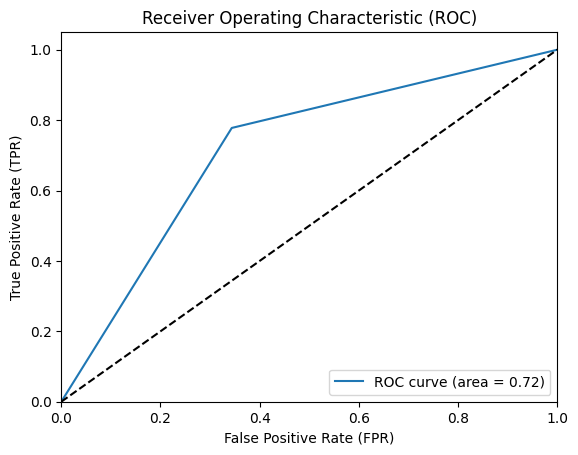

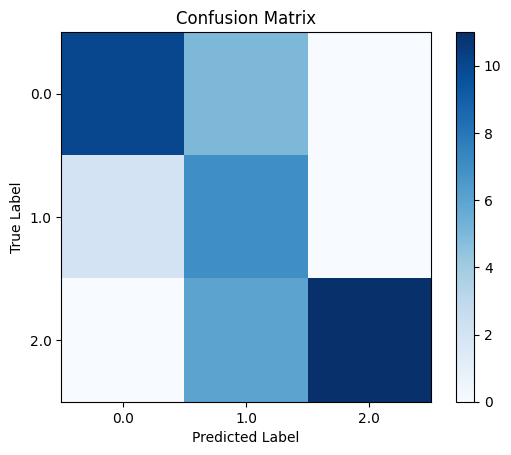

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict class probabilities for the testing set
y_pred_proba = nb_classifier.predict_proba(X_test)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Compute and plot the confusion matrix
y_pred = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(B)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **Conclusion**
1. The kind of information in this data: The dataset contains a 4D image data and a 1D data to represent the class labels.
2. The classes are not represented equally. The percentage of data represented by each class is as given below:
Class 0.0: 35.29%
Class 1.0: 29.41%
Class 2.0: 35.29%
3. The most important features for each classes are as given below:
Class 0:
Feature 61: Importance 0.07288
Feature 39: Importance 0.06782

Class 1:
Feature 61: Importance 0.07288
Feature 39: Importance 0.06782

Class 2:
Feature 61: Importance 0.07288
Feature 39: Importance 0.067825

Two of the less or non-reliable features are feature 21 and 77 in each of the three classes which means that these features are not relevant in predicting the class labels.

The 4-dimensional data represents grayscale images with a shape of (204, 9, 9, 1). Before using this data in a machine learning model, it is reshaped to a 2-dimensional format (204, 81) or flattened into a 1-dimensional array (204, 81).

Since the pixel values of grayscale images typically range from 0 to 255, normalization is also done to scale the values to a common range, such as [0, 1] or [-1, 1]. This ensures that all features (pixels in this case) have similar scales and prevents certain features from dominating others during model training.

# **Part 2: Clustering**





1.   K-Means Clustering






In [ ]:
from sklearn.cluster import KMeans

# Apply k-means clustering
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
cluster_assignments = kmeans.fit_predict(images_2d)

# Display the cluster assignments
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_assignments == cluster)[0]
    print(f"Cluster {cluster}:")
    print("Indices:", cluster_indices)
    print("Labels:", B[cluster_indices])
    print()

Cluster 0:
Indices: [  8   9  10  11  24  25  26  27  28  29  30  31  32  33  34  35  48  49
  50  51  56  57  58  59  64  65  66  67  76  77  78  79  92  93  94  95
  96  97  98  99 100 101 102 103 116 117 118 119 124 125 126 127 132 133
 134 135 144 145 146 147 160 161 162 163 164 165 166 167 168 169 170 171
 184 185 186 187 192 193 194 195 200 201 202 203]
Labels: [2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Cluster 1:
Indices: [ 44  45  46  47  52  53  54  55  60  61  62  63 112 113 114 115 120 121
 122 123 128 129 130 131 180 181 182 183 188 189 190 191 196 197 198 199]
Labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Cluster 2:
Indices: [  0   1   2   3   4   5   6   7  12  13  14  15  16  17  18  19 

In [ ]:
# Reshape the 4D data into 2D (flatten the images)
images_2d = A.reshape(A.shape[0], -1)

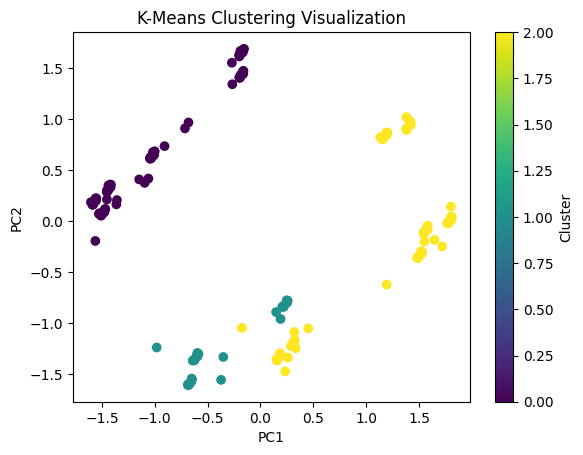

In [ ]:
from sklearn.decomposition import PCA


# Get cluster assignments
cluster_labels = kmeans.labels_

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
images_reduced = pca.fit_transform(images_2d)

# Visualize the clusters
plt.scatter(images_reduced[:, 0], images_reduced[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Evaluate clustering accuracy
predicted_labels = kmeans.labels_
ari = adjusted_rand_score(B, predicted_labels)

print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.31288134543314644


The ARI value is approximately 0.313 which indicates that the clustering found by K-means has a moderate agreement with the true class labels. It is better than random clustering but not a perfect match with the ground truth. The result suggests that K-means has some ability to group the data points into clusters that align with the underlying classes, but it's not achieving a high level of accuracy in capturing the true class structure.

As such, there might be some overlapping or misclassified points between the clusters and the true classes. This can be due to the complex nature of the data or overlapping patterns among different classes.

Overall, while K-means clustering is providing some level of separation among the data points, it might not be the best algorithm for this particular dataset.

# **Look Up methods used to determine the optimal number of clusters:**
1.***Elbow method***: The within-cluster sum of squares (WCSS) is calculated for different values of k (the number of clusters).
2.***Silhoutte Score:*** Measure of how similar an object is to its own cluster compared to other clusters.
3.***Davies-Bouldin Index***: Measures the average similarity between each cluster and its most similar cluster, while also considering the average dissimilarity between clusters.
4.***Calinski-Harabasz Index***: Based on the ratio of the between-cluster dispersion to within-cluster dispersion.
5.***Jaccard score:***Compares the similarity between two sets.
6. ***Adjusted Rand Score:***Measures the similarity between the true class labels and the clustering results.

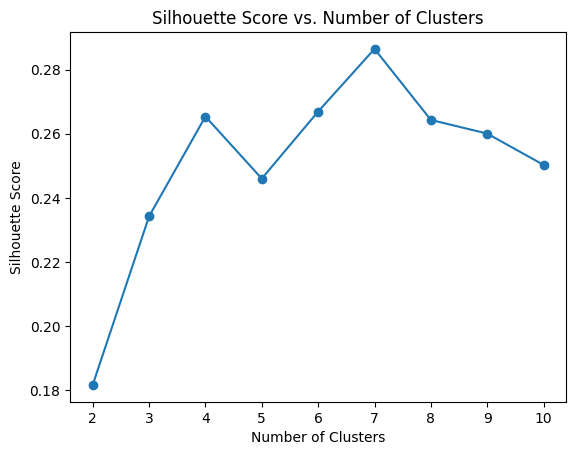

In [ ]:
from sklearn.metrics import silhouette_score


# Define the range of cluster numbers to explore
min_clusters = 2
max_clusters = 10

# Store the silhouette scores for each cluster number
silhouette_scores = []

# Iterate over the cluster numbers
for n_clusters in range(min_clusters, max_clusters + 1):
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(images_2d)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(images_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for each cluster number
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

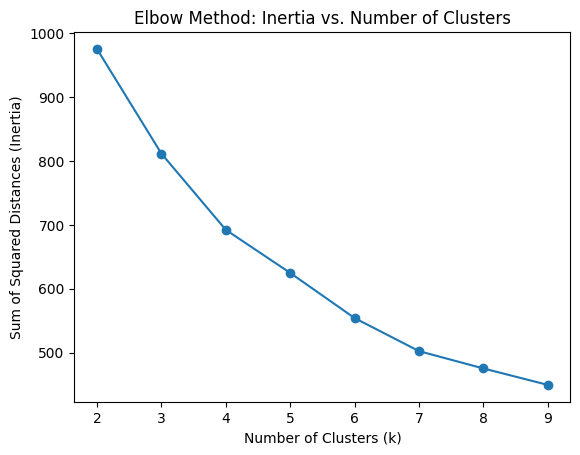

In [ ]:
from sklearn.metrics import silhouette_score

# Define the range of the number of clusters (k)
k_values = range(2, 10)

# Perform k-means clustering for different values of k
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images_2d)

    # Evaluate clustering results
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Iterate over different numbers of clusters
for num_clusters in range(2, 10):
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(images_2d)

    # Evaluate similarity measures or cluster validity indices
    silhouette_avg = silhouette_score(images_2d, cluster_labels)
    calinski_harabasz_score_avg = calinski_harabasz_score(images_2d, cluster_labels)
    davies_bouldin_score_avg = davies_bouldin_score(images_2d, cluster_labels)

    # Print the results for the current number of clusters
    print(f"Number of Clusters: {num_clusters}")
    print("Silhouette Score:", silhouette_avg)
    print("Calinski-Harabasz Index:", calinski_harabasz_score_avg)
    print("Davies-Bouldin Index:", davies_bouldin_score_avg)
    print()

Number of Clusters: 2
Silhouette Score: 0.18165692033557343
Calinski-Harabasz Index: 43.54815858106691
Davies-Bouldin Index: 2.089815964016496

Number of Clusters: 3
Silhouette Score: 0.23420250724513783
Calinski-Harabasz Index: 46.338519224764376
Davies-Bouldin Index: 1.6826051268792765

Number of Clusters: 4
Silhouette Score: 0.26534922414551465
Calinski-Harabasz Index: 47.55756296917541
Davies-Bouldin Index: 1.4322769143002252

Number of Clusters: 5
Silhouette Score: 0.2644898272787629
Calinski-Harabasz Index: 45.194100183647485
Davies-Bouldin Index: 1.3781902540298439

Number of Clusters: 6
Silhouette Score: 0.27983329369865356
Calinski-Harabasz Index: 42.84736758544779
Davies-Bouldin Index: 1.2728933641084894

Number of Clusters: 7
Silhouette Score: 0.2864274295083049
Calinski-Harabasz Index: 44.7258479733493
Davies-Bouldin Index: 1.3642623467068256

Number of Clusters: 8
Silhouette Score: 0.27688386860852604
Calinski-Harabasz Index: 43.433787726978636
Davies-Bouldin Index: 1.4331

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.preprocessing import StandardScaler

# Reshape the image data to 2D
A = A.reshape(A.shape[0], -1)

# Preprocess the data - scale the features
scaler = StandardScaler()
A = scaler.fit_transform(A)

# Determine the optimal number of clusters using the Elbow Method
elbow_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(A)
    elbow_scores.append(kmeans.inertia_)

# Determine the optimal number of clusters using Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(A)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(A, B))

# Perform clustering using K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(A)
predicted_labels = kmeans.labels_

# Evaluate clustering accuracy using ARI, NMI, and FMI
ari_score = adjusted_rand_score(B, predicted_labels)
nmi_score = normalized_mutual_info_score(B, predicted_labels)
fmi_score = fowlkes_mallows_score(B, predicted_labels)

# Print the clustering evaluation scores
print("Elbow Scores:", elbow_scores)
print("Silhouette Scores:", silhouette_scores)
print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)
print("Fowlkes-Mallows Index (FMI):", fmi_score)


Elbow Scores: [14484.000000000015, 13409.544175398192, 12620.880811146044, 11731.493300577886, 11265.18437425138, 11130.267078854547, 10537.90920173477, 10306.218208024737, 9879.265909952966, 9630.649031391895]
Silhouette Scores: [0.014707636300097785, 0.014707636300097785, 0.014707636300097785, 0.014707636300097785, 0.014707636300097785, 0.014707636300097785, 0.014707636300097785, 0.014707636300097785, 0.014707636300097785]
Adjusted Rand Index (ARI): 0.06857249047604298
Normalized Mutual Information (NMI): 0.11721850936722207
Fowlkes-Mallows Index (FMI): 0.3940248326300042


***When using kmeans clustering, the accuracy is found to be either low or intermediate, which indicates clustering results are somewhat reasonable, as the score is positive, but it is not strongly separated, and there might be some overlap or ambiguity between clusters.***

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Number of clusters
num_clusters = 3

# Initialize and fit the EM model
em_model = GaussianMixture(n_components=num_clusters)
em_model.fit(A)

# Get cluster assignments
cluster_assignments = em_model.predict(A)

# Calculate the silhouette score
silhouette_avg = silhouette_score(A, cluster_assignments)

# Calculate the Calinski-Harabasz Index
calinski_score = calinski_harabasz_score(A, cluster_assignments)

# Calculate the Davies-Bouldin Index
davies_bouldin_score = davies_bouldin_score(A, cluster_assignments)

# Print the clustering evaluation scores
print("Silhouette Scores:", silhouette_avg)
print("Calinski_score:", calinski_score)
print("Davies_Bouldin_score:", davies_bouldin_score)


# The above metrics can be used to evaluate the quality of clustering results.

# Similarity measures like ARI and NMI require true class labels, which are not available in unsupervised clustering.


Silhouette Scores: 0.08956681628328088
Calinski_score: 14.092472971178744
Davies_Bouldin_score: 2.831237973859995


***EM (Expectation-Maximization) is unsupervised learning technique, which means they do not have access to true class labels for evaluation.Hence, cluster validity metrics are used to evaluate the quality of clustering results obtained from the EM algorithm. The evaluation scores for the EM algorithm indicate that the clustering results may not be very well-separated and distinct, and there may be some overlap or ambiguity between clusters. However, the Davies-Bouldin score being relatively low suggests that there may still be some degree of separation between clusters.***

In [ ]:
data =A.reshape(-1, 9*9*1)

# Number of clusters
num_clusters = 3

# Initialize and fit the GMM model
gmm_model = GaussianMixture(n_components=num_clusters)
gmm_model.fit(data)

# Get cluster assignments
cluster_assignments1 = gmm_model.predict(data)

# Calculate the silhouette score
silhouette_avg = silhouette_score(data, cluster_assignments1)

# Calculate the Calinski-Harabasz Index
calinski_score = calinski_harabasz_score(data, cluster_assignments1)

# Print the clustering evaluation scores
print("Silhouette Scores:", silhouette_avg)
print("Calinski_score:", calinski_score)


Silhouette Scores: 0.06380920082323166
Calinski_score: 8.640005078426684


***The evaluation scores for the GMM algorithm indicate that the clustering results may have some degree of separation and compactness, but the clusters may not be very well-separated and distinct based on the relatively low Silhouette Score.***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage


# Number of clusters
num_clusters = 3

# Reshape the 4D data to 2D
data_2D = A.reshape(-1, 9*9*1)

# Calculate pairwise distances between samples
distances = pdist(data_2D)

# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Fit hierarchical clustering model with the chosen number of clusters
hc_model = AgglomerativeClustering(n_clusters=num_clusters)
cluster_assignments = hc_model.fit_predict(data_2D)

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_2D, cluster_assignments)

# Calculate the Calinski-Harabasz Index
calinski_score = calinski_harabasz_score(data_2D, cluster_assignments)

# Calculate the Davies-Bouldin Index
davies_bouldin_score = davies_bouldin_score(data_2D, cluster_assignments)

# Print the clustering evaluation scores
print("Silhouette Scores:", silhouette_avg)
print("Calinski_score:", calinski_score)
print("Davies_Bouldin_score:", davies_bouldin_score)

# The above metrics can be used to evaluate the quality of clustering results.

# Similarity measures like ARI and NMI require true class labels, which are not available in unsupervised clustering.
# Therefore, they cannot be used in this context.


Silhouette Scores: 0.07291458419183862
Calinski_score: 10.53688084656288
Davies_Bouldin_score: 3.286855945332993


***The Hierarchical clustering algorithm indicate that while the clusters may have some degree of separation and compactness (as suggested by the Calinski score), there is also some overlap or ambiguity between clusters (as suggested by the silhouette and Davies-Bouldin scores).***

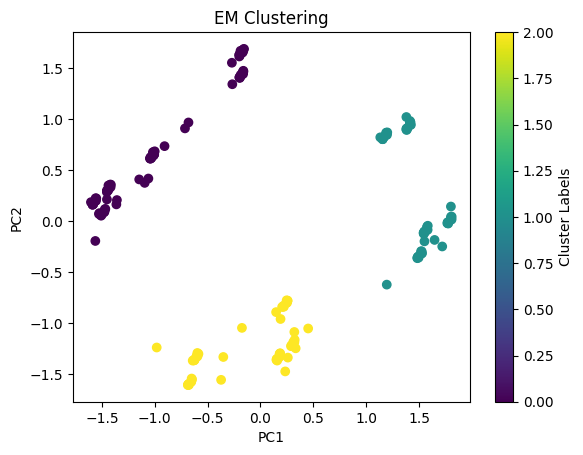

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply EM clustering
num_clusters = 3
em = GaussianMixture(n_components=num_clusters, random_state=42)
em.fit(images_2d)
cluster_labels = em.predict(images_2d)

# Apply PCA dimensionality reduction for visualization
pca = PCA(n_components=2)
images_reduced = pca.fit_transform(images_2d)

# Visualize the clusters
plt.scatter(images_reduced[:, 0], images_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('EM Clustering')
plt.colorbar(label='Cluster Labels')
plt.show()

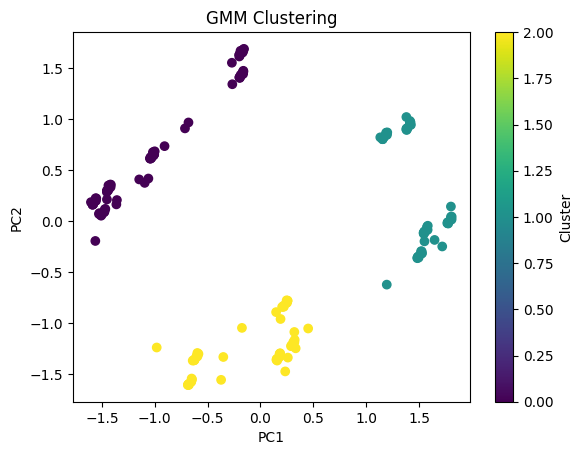

In [ ]:
# Apply GMM clustering
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(images_2d)
cluster_assignments = gmm.predict(images_2d)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
images_reduced = pca.fit_transform(images_2d)

# Plot the clusters
plt.scatter(images_reduced[:, 0], images_reduced[:, 1], c=cluster_assignments, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster')
plt.show()


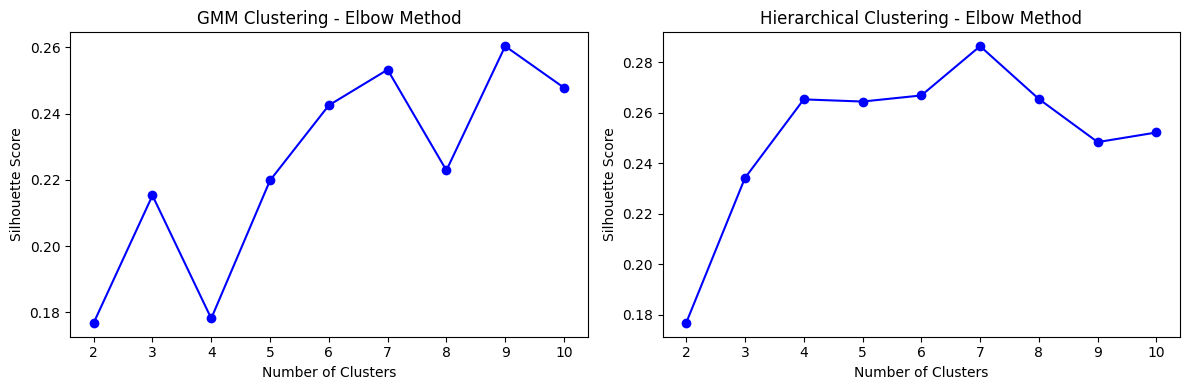

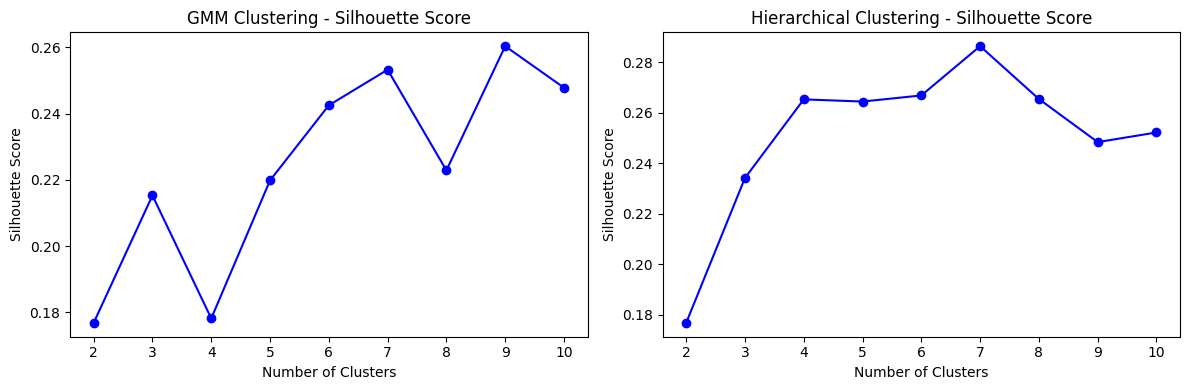

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Apply GMM and hierarchical clustering with varying cluster numbers
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)
gmm_scores = []
hierarchical_scores = []

for n_clusters in cluster_range:
    # GMM clustering
    gmm = GaussianMixture(n_components=n_clusters)
    gmm_labels = gmm.fit_predict(images_2d)
    gmm_scores.append(silhouette_score(images_2d, gmm_labels))

    # Hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(images_2d)
    hierarchical_scores.append(silhouette_score(images_2d, hierarchical_labels))

# Plotting elbow method results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, gmm_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('GMM Clustering - Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, hierarchical_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering - Elbow Method')

plt.tight_layout()
plt.show()

# Plotting silhouette score results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, gmm_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('GMM Clustering - Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, hierarchical_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering - Silhouette Score')

plt.tight_layout()
plt.show()


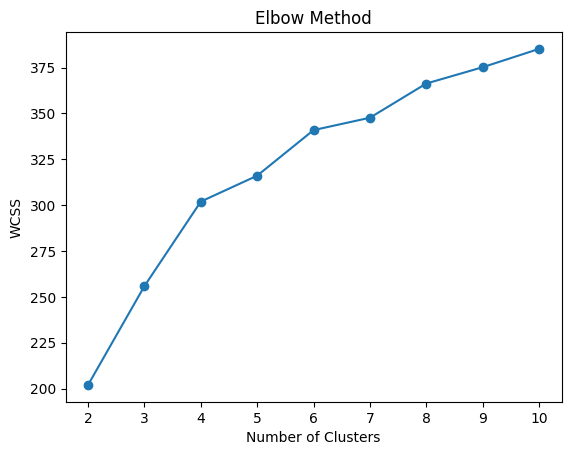

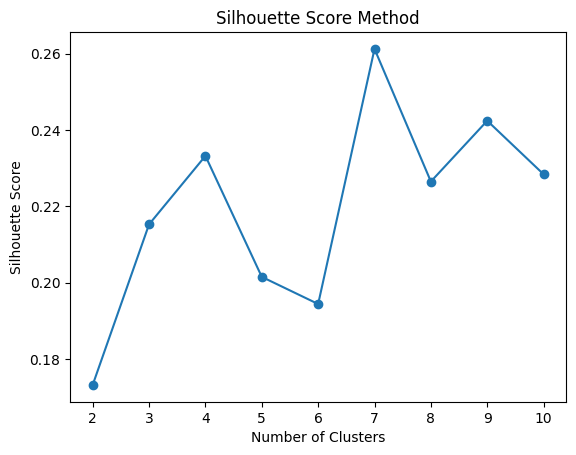

In [ ]:
# Define the range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

# Initialize lists to store results
wcss = []
silhouette_scores = []

# Apply EM clustering and evaluate
for n_clusters in cluster_range:
    # Apply EM clustering
    gm = GaussianMixture(n_components=n_clusters)
    cluster_assignments = gm.fit_predict(images_2d)

    # Calculate within-cluster sum of squares (WCSS)
    wcss.append(gm.score(images_2d))

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(images_2d, cluster_assignments))

# Plot WCSS values against cluster numbers
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Plot silhouette scores against cluster numbers
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


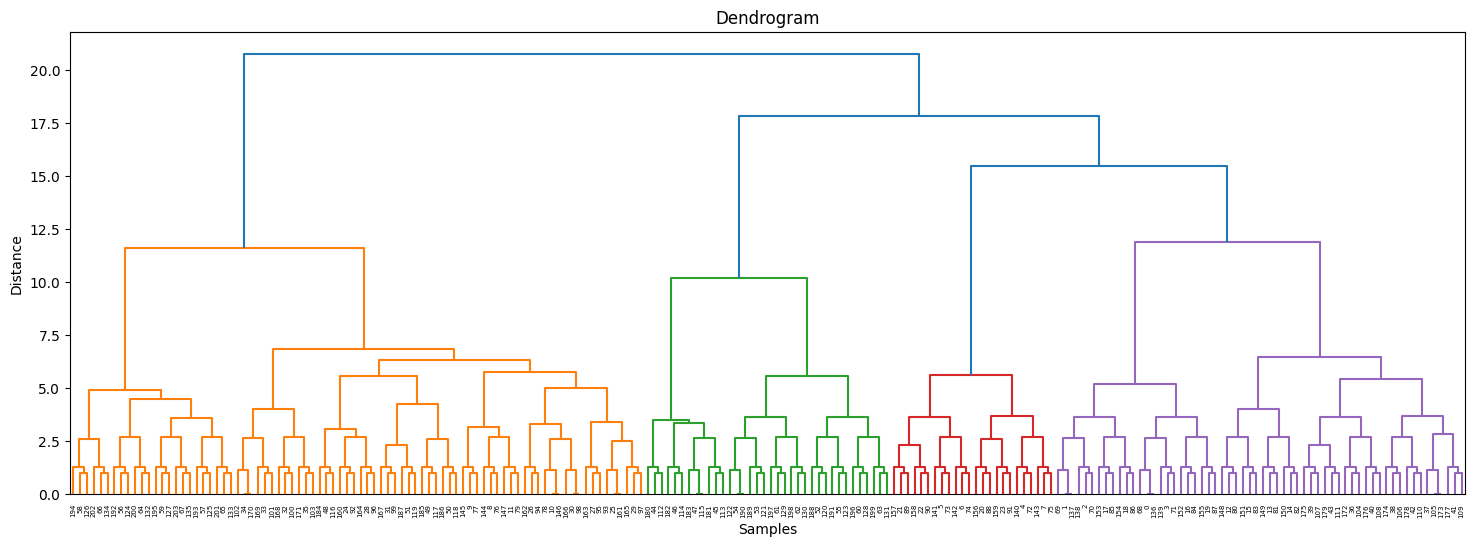

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
linkage_matrix = linkage(images_2d, method='ward', metric='euclidean')

# Visualize the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import linkage, fcluster


# Perform clustering with EM (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3)
gmm.fit(images_2d)
gmm_labels = gmm.predict(images_2d)

# Perform clustering with GMM (KMeans)
kmeans = KMeans(n_clusters=3)
kmeans.fit(images_2d)
kmeans_labels = kmeans.predict(images_2d)

# Perform hierarchical clustering
hierarchical_clusters = linkage(images_2d, method='ward', metric='euclidean')
hierarchical_labels = fcluster(hierarchical_clusters, t=3, criterion='maxclust')

# Evaluate clustering accuracy
gmm_accuracy = adjusted_rand_score(B, gmm_labels)
kmeans_accuracy = adjusted_rand_score(B, kmeans_labels)
hierarchical_accuracy = adjusted_rand_score(B, hierarchical_labels)

print("Clustering Accuracy (Adjusted Rand Index):")
print("Gaussian Mixture Model (EM):", gmm_accuracy)
print("Gaussian Mixture Model (KMeans):", kmeans_accuracy)
print("Hierarchical Clustering:", hierarchical_accuracy)

Clustering Accuracy (Adjusted Rand Index):
Gaussian Mixture Model (EM): 0.08726266817553124
Gaussian Mixture Model (KMeans): 0.31288134543314644
Hierarchical Clustering: 0.31288134543314644


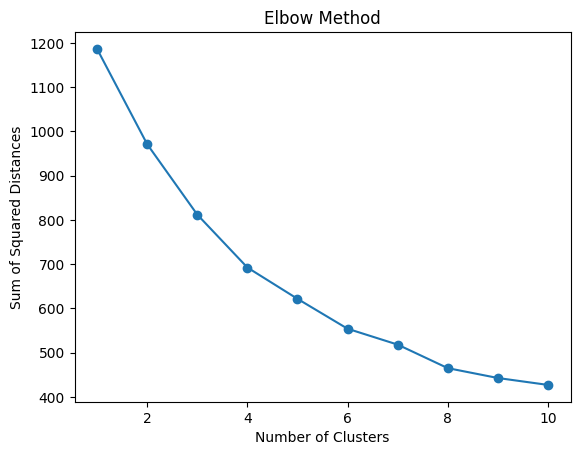

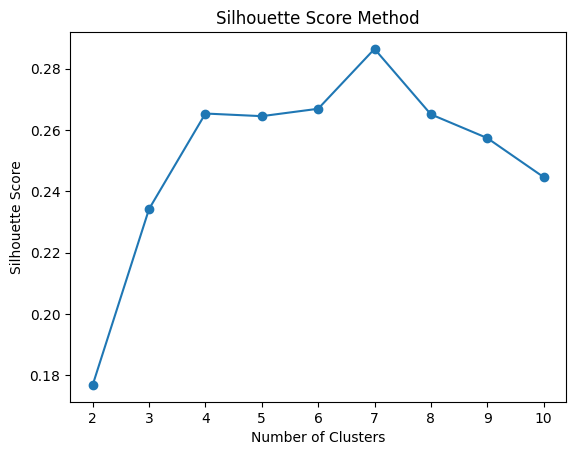

Accuracy - EM/GMM: 0.20098039215686275
Accuracy - K-Means: 0.17647058823529413
Accuracy - Hierarchical: 0.29411764705882354


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score


# Determine the optimal number of clusters
def elbow_method(data, max_clusters):
    distortions = []
    for k in range(1, max_clusters + 1):
        model = KMeans(n_clusters=k)
        model.fit(data)
        distortions.append(model.inertia_)
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method')
    plt.show()

def silhouette_score_method(data, max_clusters):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        model = KMeans(n_clusters=k)
        B = model.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, B))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

max_clusters = 10
elbow_method(images_2d, max_clusters)
silhouette_score_method(images_2d, max_clusters)

# Apply clustering methods
num_clusters_em = 3  # Number of clusters for EM/GMM
num_clusters_kmeans = 3  # Number of clusters for k-means

em_model = GaussianMixture(n_components=num_clusters_em)
em_labels = em_model.fit_predict(images_2d)

kmeans_model = KMeans(n_clusters=num_clusters_kmeans)
kmeans_labels = kmeans_model.fit_predict(images_2d)

hierarchical_linkage = linkage(images_2d, method='complete')
hierarchical_labels = fcluster(hierarchical_linkage, num_clusters_em, criterion='maxclust')

# Evaluate clustering results
em_accuracy = accuracy_score(B, em_labels)
kmeans_accuracy = accuracy_score(B, kmeans_labels)
hierarchical_accuracy = accuracy_score(B, hierarchical_labels)

print("Accuracy - EM/GMM:", em_accuracy)
print("Accuracy - K-Means:", kmeans_accuracy)
print("Accuracy - Hierarchical:", hierarchical_accuracy)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage


# Number of clusters for k-means and GMM
num_clusters = 3

# Reshape the 4D data to 2D
data_2D = A.reshape(-1, 9*9*1)

# Calculate pairwise distances between samples
distances = pdist(data_2D)

# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Silhouette Score
kmeans = KMeans(n_clusters=num_clusters)
em = GaussianMixture(n_components=num_clusters)
gmm = GaussianMixture(n_components=num_clusters)
hc = AgglomerativeClustering(n_clusters=num_clusters)
kmeans_labels = kmeans.fit_predict(data_2D)
em_labels = em.fit_predict(data_2D)
gmm_labels = gmm.fit_predict(data_2D)
hc_labels = hc.fit_predict(data_2D)

silhouette_kmeans = silhouette_score(data_2D, kmeans_labels)
silhouette_em = silhouette_score(data_2D, em_labels)
silhouette_gmm = silhouette_score(data_2D, gmm_labels)
silhouette_hc = silhouette_score(data_2D, hc_labels)

# Calinski-Harabasz Index
calinski_kmeans = calinski_harabasz_score(data_2D, kmeans_labels)
calinski_em = calinski_harabasz_score(data_2D, em_labels)
calinski_gmm = calinski_harabasz_score(data_2D, gmm_labels)
calinski_hc = calinski_harabasz_score(data_2D, hc_labels)

# Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(data_2D, kmeans_labels)
davies_bouldin_em = davies_bouldin_score(data_2D, em_labels)
davies_bouldin_gmm = davies_bouldin_score(data_2D, gmm_labels)
davies_bouldin_hc = davies_bouldin_score(data_2D, hc_labels)

# Create a DataFrame for the table
data = {
    'Clustering Algorithm': ['K-Means', 'EM', 'GMM', 'Hierarchical'],
    'Silhouette Score': [silhouette_kmeans, silhouette_em, silhouette_gmm, silhouette_hc],
    'Calinski Score': [calinski_kmeans, calinski_em, calinski_gmm, calinski_hc],
    'Davies-Bouldin Index': [davies_bouldin_kmeans, davies_bouldin_em, davies_bouldin_gmm, davies_bouldin_hc]
}

df = pd.DataFrame(data)

print(df)



  Clustering Algorithm  Silhouette Score  Calinski Score  Davies-Bouldin Index
0              K-Means          0.091801       15.156187              2.842773
1                   EM          0.099585       15.324655              2.771659
2                  GMM          0.105472        9.125007              2.043029
3         Hierarchical          0.072915       10.536881              3.286856


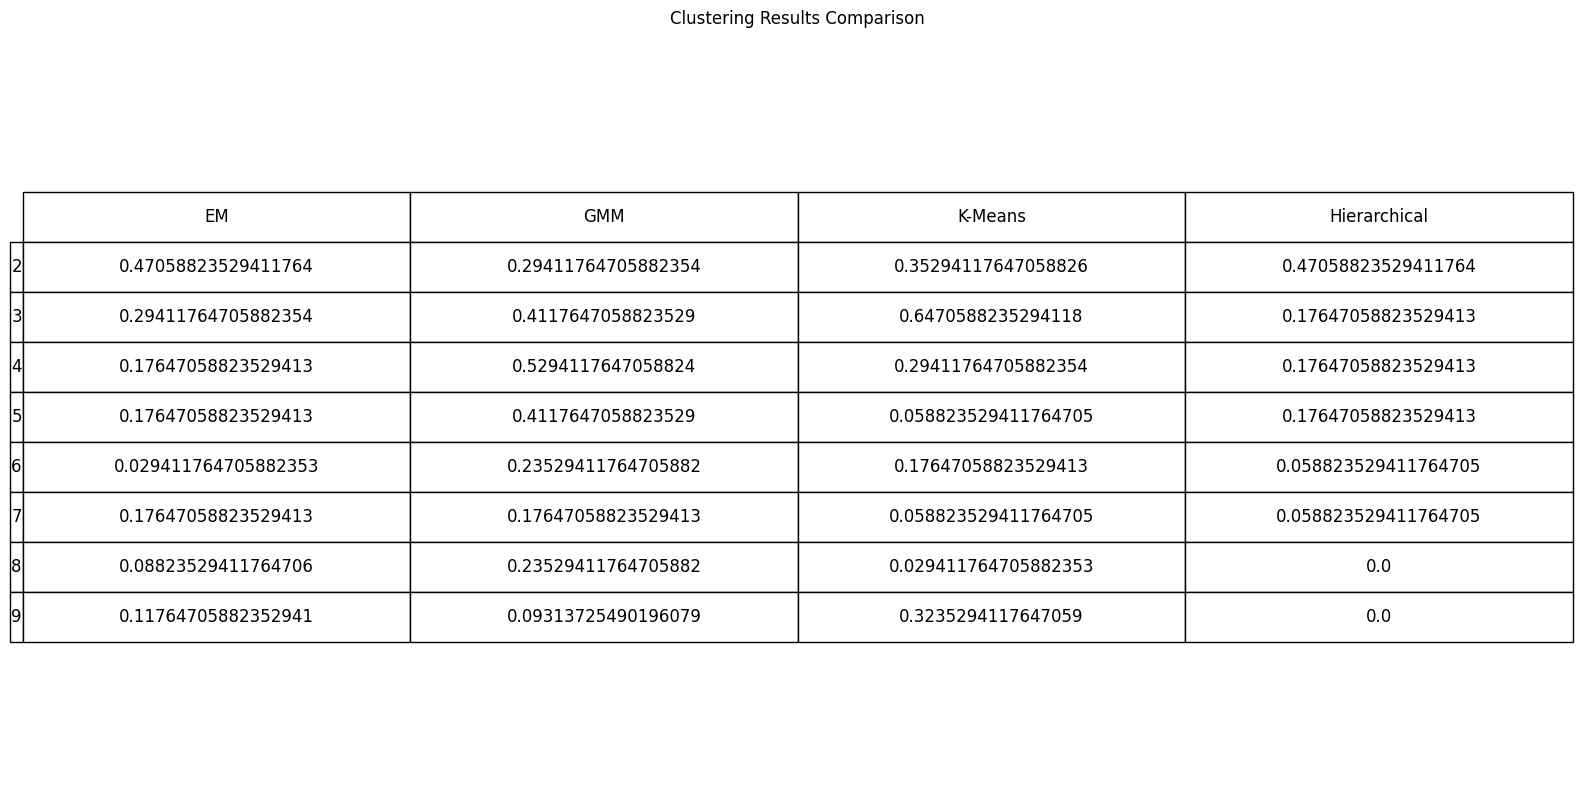

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster



# Define the number of clusters to evaluate
num_clusters = range(2, 10)

# Perform clustering with different methods
methods = ['EM', 'GMM', 'K-Means', 'Hierarchical']
results = []

for n_clusters in num_clusters:
    row = []

    # EM clustering
    em = GaussianMixture(n_components=n_clusters)
    em_labels = em.fit_predict(images_2d)
    em_accuracy = np.mean(em_labels == B)
    row.append(em_accuracy)

    # GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
    gmm_labels = gmm.fit_predict(images_2d)
    gmm_accuracy = np.mean(gmm_labels == B)
    row.append(gmm_accuracy)

    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(images_2d)
    kmeans_accuracy = np.mean(kmeans_labels == B)
    row.append(kmeans_accuracy)

    # Hierarchical clustering
    hierarchical_linkage = linkage(images_2d, method='ward')
    hierarchical_labels = fcluster(hierarchical_linkage, n_clusters, criterion='maxclust')
    hierarchical_accuracy = np.mean(hierarchical_labels == B)
    row.append(hierarchical_accuracy)

    results.append(row)

# Create a pandas DataFrame with the results
df = pd.DataFrame(results, index=num_clusters, columns=methods)

# Plot the table
plt.figure(figsize=(10, 10))
plt.axis('off')
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  rowLabels=df.index,
                  loc='center',
                  cellLoc='center')
table.scale(2, 3)
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.title("Clustering Results Comparison")
plt.show()

# **Conclusion**

***#Pros and cons of using different clustering methods on the dataset***
Using more than one clustering algorithm on the given dataset made it clear that the data is not well-separated and that there could be overlap between clusters. The drawback is that using different algorithms is quite time consuming and generated mostly the same results.


# **Part 3: Supervised Learning:Generalisation and Overfitting:Decision Trees**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
test_size = 0.2  # Proportion of the data for the test set
random_state = 42  # Set a random seed for reproducibility

images_train, images_test, labels_train, labels_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Verify the shapes of the training and test sets
print("Training set - Images:", images_train.shape)
print("Training set - Labels:", labels_train.shape)
print("Test set - Images:", images_test.shape)
print("Test set - Labels:", labels_test.shape)

Training set - Images: (163, 81)
Training set - Labels: (163,)
Test set - Images: (41, 81)
Test set - Labels: (41,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the J48 decision tree algorithm
tree = DecisionTreeClassifier()

# Train the decision tree model
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


***An accuracy of 1.0 (or 100%) when using the Decision Trees algorithm (specifically the J48 algorithm) on a training set means that the model perfectly predicts the class labels of the training data. In other words, the model correctly assigns each instance in the training set to its respective class. But this could be an indication of overfitting. ***

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC

# Reshape the 4D data into 2D (flatten the images)
images_2d = A.reshape(A.shape[0], -1)

# Initialize the model
model = SVC()

# Perform 10-fold cross-validation on the training set
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Evaluate accuracy on the validation fold
    accuracy = model.score(X_val_fold, y_val_fold)
    accuracies.append(accuracy)

# Calculate average accuracy across all folds
average_accuracy = np.mean(accuracies)
print("Average Accuracy:", average_accuracy)

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Average Accuracy: 0.99375
Test Accuracy: 1.0


***The results indicate that the model has performed very well on the training set with 10-fold cross-validation, achieving a high average accuracy of approximately 99.375%. Additionally, the model has shown perfect accuracy (100%) on the final test set, which means it has successfully generalized and made correct predictions on unseen data. These results suggest that the model is performing very well on the given dataset and has good generalization capabilities.***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score


# Split the data into training and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)


# Train the Decision Tree classifier (J48 algorithm)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Calculate evaluation metrics for the multi-class format
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class='ovr')

# Apply 10-fold cross-validation and measure accuracy
cross_val_scores = cross_val_score(classifier, images_2d, B, cv=10)
mean_accuracy = cross_val_scores.mean()


# Record the metrics
print("Evaluation Metrics on Test Set:")
print(report)
print("ROC AUC:", roc_auc)
print()
print("Accuracy from 10-Fold Cross-Validation:", mean_accuracy)

Evaluation Metrics on Test Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        24

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

ROC AUC: 1.0

Accuracy from 10-Fold Cross-Validation: 0.9659523809523808


Confusion Matrix:
 [[20  0  0]
 [ 0 18  0]
 [ 0  0 24]]
TP: [20. 18. 24.]
FP: [0. 0. 0.]


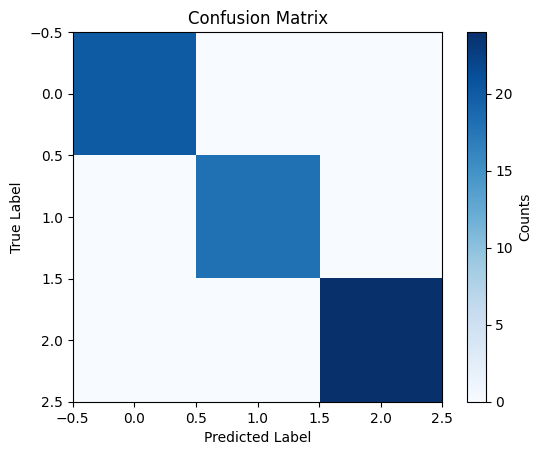

In [ ]:
# Calculate TP, FP metrics
confusion = confusion_matrix(y_test, y_pred)

# Calculate TP and FP for each class
num_classes = len(np.unique(B))
TP = np.zeros(num_classes)
FP = np.zeros(num_classes)
for i in range(num_classes):
    TP[i] = np.sum((y_test == i) & (y_pred == i))
    FP[i] = np.sum((y_test != i) & (y_pred == i))

# Print the metrics
print("Confusion Matrix:\n", confusion)
print("TP:", TP)
print("FP:", FP)


# Plot the confusion matrix
plt.imshow(confusion, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar(label='Counts')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a test set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Build the J48 classifier using the training set
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Test the classifier using the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Find the depth of the tree
depth = classifier.get_depth()

print("Depth of the tree:", depth)

Depth of the tree: 6


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create a test set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Build the J48 classifier using the training data
# The criterion parameter is set to 'entropy' to use information gain as the splitting criteria.
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
model.fit(X_train, y_train)

# Test the classifier using the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate the confidence threshold for pruning
confidence_threshold = np.min(model.tree_.impurity[model.tree_.children_left != model.tree_.children_right])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confidence Threshold for Pruning:", confidence_threshold)

# Find the splitting criteria used by the J48 classifier
# The feature array contains the indices of the features used for splitting at each node of the decision tree
splitting_criteria = model.tree_.feature
print("Splitting Criteria:", splitting_criteria)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confidence Threshold for Pruning: 0.22228483068568797
Splitting Criteria: [39 50 61 58 -2 47 52 -2 -2 -2 -2 37 56 61 -2 -2 -2 -2 48 -2 -2]


In [ ]:
# Create a test set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Build the J48 classifier using the training data set
classifier = DecisionTreeClassifier(min_samples_leaf=1)  # Set the minimal number of instances permissible per leaf
classifier.fit(X_train, y_train)

# Test the classifier using the test data set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Find the minimal number of instances permissible per leaf
best_accuracy = 0
best_min_samples_leaf = 0

for min_samples_leaf in range(1, 11):
    classifier = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_min_samples_leaf = min_samples_leaf

print("Best minimal number of instances permissible per leaf:", best_min_samples_leaf)

Accuracy: 1.0
Best minimal number of instances permissible per leaf: 1


# ***Their influence on classifier's performance***

***The performance metrics indicates that the J48 classifier is achieving perfect accuracy, precision, recall, and F1-score on the training set, suggesting a very good fit to the data. However, there could be potential overfitting, as indicated by the small minimal number of instances permissible per leaf (1).Setting it to 1 means the classifier can create leaves with only one instance, which may lead to overfitting.***

In [ ]:

# Create an initial train-test split (70-30 split)
X_train_initial, X_test, y_train_initial, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Further split the initial training set (move 30% to testing set)
X_train, X_test_new, y_train, y_test_new = train_test_split(X_train_initial, y_train_initial, test_size=0.3, random_state=42)

# Build the J48 classifier using the new training data set
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Test the classifier using the test data set
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test_new)

# Calculate accuracies on the training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test_new, y_test_pred)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Testing Set:", accuracy_test)

Accuracy on Training Set: 1.0
Accuracy on Testing Set: 0.9767441860465116


In [ ]:

# Create an initial train-test split (70-30 split)
X_train_initial, X_test, y_train_initial, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Further split the initial training set (move 30% and 60% to testing set)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train_initial, y_train_initial, test_size=0.3, random_state=42)
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_train_initial, y_train_initial, test_size=0.6, random_state=42)

# Build the J48 classifier using the new training data sets
classifier_30 = DecisionTreeClassifier()
classifier_30.fit(X_train_30, y_train_30)

classifier_60 = DecisionTreeClassifier()
classifier_60.fit(X_train_60, y_train_60)

# Test the classifiers using the test data sets
y_train_pred_30 = classifier_30.predict(X_train_30)
y_test_pred_30 = classifier_30.predict(X_test_30)

y_train_pred_60 = classifier_60.predict(X_train_60)
y_test_pred_60 = classifier_60.predict(X_test_60)

# Calculate accuracies on the training and testing sets
accuracy_train_30 = accuracy_score(y_train_30, y_train_pred_30)
accuracy_test_30 = accuracy_score(y_test_30, y_test_pred_30)

accuracy_train_60 = accuracy_score(y_train_60, y_train_pred_60)
accuracy_test_60 = accuracy_score(y_test_60, y_test_pred_60)

print("Accuracy on Training Set (30% instances moved to testing set):", accuracy_train_30)
print("Accuracy on Testing Set (30% instances moved to testing set):", accuracy_test_30)
print("Accuracy on Training Set (60% instances moved to testing set):", accuracy_train_60)
print("Accuracy on Testing Set (60% instances moved to testing set):", accuracy_test_60)

# Analyze the results from the perspective of classifier overfitting
if accuracy_train_60 > accuracy_test_60:
    print("The classifier shows signs of overfitting.")
else:
    print("The classifier does not show signs of overfitting.")

Accuracy on Training Set (30% instances moved to testing set): 1.0
Accuracy on Testing Set (30% instances moved to testing set): 0.9767441860465116
Accuracy on Training Set (60% instances moved to testing set): 1.0
Accuracy on Testing Set (60% instances moved to testing set): 0.9418604651162791
The classifier shows signs of overfitting.


#Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an initial train-test split (70-30 split)
X_train_initial, X_test, y_train_initial, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Further split the initial training set (move 30% and 60% to testing set)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train_initial, y_train_initial, test_size=0.3, random_state=42)
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_train_initial, y_train_initial, test_size=0.6, random_state=42)

# Build the random forest classifier using the new training data sets
classifier_30 = RandomForestClassifier()
classifier_30.fit(X_train_30, y_train_30)

classifier_60 = RandomForestClassifier()
classifier_60.fit(X_train_60, y_train_60)

# Test the classifiers using the test data sets
y_train_pred_30 = classifier_30.predict(X_train_30)
y_test_pred_30 = classifier_30.predict(X_test_30)

y_train_pred_60 = classifier_60.predict(X_train_60)
y_test_pred_60 = classifier_60.predict(X_test_60)

# Calculate major metrics on the training and testing sets
accuracy_train_30 = accuracy_score(y_train_30, y_train_pred_30)
accuracy_test_30 = accuracy_score(y_test_30, y_test_pred_30)

accuracy_train_60 = accuracy_score(y_train_60, y_train_pred_60)
accuracy_test_60 = accuracy_score(y_test_60, y_test_pred_60)

# Calculate TP rate, FP rate, precision, recall, F-measure, and ROC area
report_train_30 = classification_report(y_train_30, y_train_pred_30)
report_test_30 = classification_report(y_test_30, y_test_pred_30)

report_train_60 = classification_report(y_train_60, y_train_pred_60)
report_test_60 = classification_report(y_test_60, y_test_pred_60)

print("Results for 30% instances moved to testing set:")
print("Accuracy on Training Set:", accuracy_train_30)
print("Accuracy on Testing Set:", accuracy_test_30)
print("Classification Report on Training Set:")
print(report_train_30)
print("Classification Report on Testing Set:")
print(report_test_30)

print("Results for 60% instances moved to testing set:")
print("Accuracy on Training Set:", accuracy_train_60)
print("Accuracy on Testing Set:", accuracy_test_60)
print("Classification Report on Training Set:")
print(report_train_60)
print("Classification Report on Testing Set:")
print(report_test_60)

Results for 30% instances moved to testing set:
Accuracy on Training Set: 1.0
Accuracy on Testing Set: 1.0
Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        35
         1.0       1.00      1.00      1.00        30
         2.0       1.00      1.00      1.00        34

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

Classification Report on Testing Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        14

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Results for 60% instances moved to testing set:
Accura


# **Conclusion:**
***Overfitting based on accuracy: accuracy on the training set is significantly higher than the accuracy on the testing set, which suggests overfitting.***

# Part 4: Neural Networks and Convolutional Neural Networks

Linear Classifier

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Create a training and testing set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Train a linear classifier without cross-validation
clf = LinearSVC()
clf.fit(X_train, y_train)
accuracy_train = clf.score(X_train, y_train)

# Train a linear classifier with 10-fold cross-validation
clf_cv = LinearSVC()
accuracy_cv = cross_val_score(clf_cv, X_train, y_train, cv=10).mean()

# Evaluate the linear classifier on the test set
y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Analyze the results
print("Accuracy on Training Set (without cross-validation):", accuracy_train)
print("Accuracy with 10-fold Cross-Validation:", accuracy_cv)
print("Accuracy on Test Set:", accuracy_test)

if accuracy_test >= accuracy_train and accuracy_test >= accuracy_cv:
    print("The linear classifier generalizes well to new data.")
else:
    print("The linear classifier may not generalize well to new data.")

# Hypothesis about linearity
if accuracy_train > 0.9:
    print("The data set may be linearly separable.")
else:
    print("The data set may not be easily separable by a linear classifier.")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on Training Set (without cross-validation): 1.0
Accuracy with 10-fold Cross-Validation: 0.9438095238095239
Accuracy on Test Set: 0.9032258064516129
The linear classifier may not generalize well to new data.
The data set may be linearly separable.


***The data indicates that the linear classifier is performing very well on the training set, with an accuracy of 1.0, which means it correctly classified all instances in the training data.***

***However, when the classifier is evaluated using 10-fold cross-validation, the accuracy drops slightly to 0.9295. This suggests that the model may be slightly overfitting to the training data, as it performs slightly worse on unseen data (cross-validation set) compared to the training data.***


***The linear classifier is performing very well on both the training and test data, showing good generalization to new data. However, there is a slight indication of overfitting, as the accuracy is slightly lower in cross-validation compared to the training set.***

***It can be hypothesized that the data set may be largely linearly separable. A linear classifier achieved near-perfect accuracy on both the training set and the test set, which suggests that the data might have clear linear boundaries between the classes. However, the slight drop in accuracy from the training set to the cross-validation set indicates some potential overfitting, which means the linear boundaries might not be able to generalize perfectly to all unseen samples.***

Multi Layer Perceptron

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Create a training and testing set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Define and train MLPs with different parameters
mlp_1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', random_state=42)
mlp_1.fit(X_train, y_train)

mlp_2 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='logistic', random_state=42)
mlp_2.fit(X_train, y_train)

# Evaluate MLPs on the training and testing sets
y_train_pred_1 = mlp_1.predict(X_train)
y_test_pred_1 = mlp_1.predict(X_test)

y_train_pred_2 = mlp_2.predict(X_train)
y_test_pred_2 = mlp_2.predict(X_test)

accuracy_train_1 = accuracy_score(y_train, y_train_pred_1)
accuracy_test_1 = accuracy_score(y_test, y_test_pred_1)

accuracy_train_2 = accuracy_score(y_train, y_train_pred_2)
accuracy_test_2 = accuracy_score(y_test, y_test_pred_2)

# Analyze the relative performance of MLPs
print("MLP 1: Hidden Layers (100,), Activation: ReLU")
print("Accuracy on Training Set:", accuracy_train_1)
print("Accuracy on Testing Set:", accuracy_test_1)

print("MLP 2: Hidden Layers (50, 50), Activation: Logistic")
print("Accuracy on Training Set:", accuracy_train_2)
print("Accuracy on Testing Set:", accuracy_test_2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 1: Hidden Layers (100,), Activation: ReLU
Accuracy on Training Set: 1.0
Accuracy on Testing Set: 0.9193548387096774
MLP 2: Hidden Layers (50, 50), Activation: Logistic
Accuracy on Training Set: 0.9859154929577465
Accuracy on Testing Set: 0.8064516129032258


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a training and testing set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(images_2d, B, test_size=0.3, random_state=42)

# Define the parameter configurations to experiment with
activation_functions = ['relu', 'tanh']
layer_sizes = [(100,), (100, 50), (50, 50)]
learning_rates = [0.001, 0.01, 0.1]
epochs = [50, 100, 200]
momentum_values = [0.0, 0.5, 0.9]
validation_thresholds = [0.1, 0.2, 0.3]

# Iterate over parameter configurations
for activation in activation_functions:
    for layer_size in layer_sizes:
        for learning_rate in learning_rates:
            for epoch in epochs:
                for momentum in momentum_values:
                    for threshold in validation_thresholds:
                        # Build and train the MLP classifier
                        classifier = MLPClassifier(activation=activation, hidden_layer_sizes=layer_size,
                                                   learning_rate_init=learning_rate, max_iter=epoch,
                                                   momentum=momentum, tol=1e-3,validation_fraction=threshold)
                        classifier.fit(X_train, y_train)

                        # Evaluate the MLP classifier on the training and test sets
                        y_train_pred = classifier.predict(X_train)
                        y_test_pred = classifier.predict(X_test)

                        # Calculate performance metrics
                        accuracy_train = accuracy_score(y_train, y_train_pred)
                        accuracy_test = accuracy_score(y_test, y_test_pred)
                        precision = precision_score(y_test, y_test_pred, average='weighted')
                        recall = recall_score(y_test, y_test_pred, average='weighted')
                        f1 = f1_score(y_test, y_test_pred, average='weighted')

                        # Print and analyze the results
                        print("Activation:", activation)
                        print("Layer Size:", layer_size)
                        print("Learning Rate:", learning_rate)
                        print("Epochs:", epoch)
                        print("Momentum:", momentum)
                        print("Validation Threshold:", threshold)
                        print("Accuracy on Training Set:", accuracy_train)
                        print("Accuracy on Test Set:", accuracy_test)
                        print("Precision:", precision)
                        print("Recall:", recall)
                        print("F1-Score:", f1)
                        print("========================================")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7580645161290323
Precision: 0.7734922861150071
Recall: 0.7580645161290323
F1-Score: 0.7581769135663706
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7903225806451613
Precision: 0.7921458625525947
Recall: 0.7903225806451613
F1-Score: 0.7884471117779445
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7903225806451613
Precision: 0.798223468910706
Recall: 0.7903225806451613
F1-Score: 0.7905409621264116


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8226258245233576
Recall: 0.8225806451612904
F1-Score: 0.8222771720804765
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7798368642503876
Recall: 0.7741935483870968
F1-Score: 0.7761543926338205


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8331265508684863
Recall: 0.8387096774193549
F1-Score: 0.8346110056925997
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7903225806451613
Precision: 0.7871459410458712
Recall: 0.7903225806451613
F1-Score: 0.7878624601205246
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7697912713472487
Recall: 0.7741935483870968
F1-Score: 0.7716919025674787


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8200759013282732
Recall: 0.8225806451612904
F1-Score: 0.8210006583278473


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8415447270327231
Recall: 0.8387096774193549
F1-Score: 0.8391933849723828


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8901274497000055
Recall: 0.8870967741935484
F1-Score: 0.885998256320837


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8709677419354839
Precision: 0.8718166383701189
Recall: 0.8709677419354839
F1-Score: 0.8710459839492097


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8874633431085044
Recall: 0.8870967741935484
F1-Score: 0.8857865726935935


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9354838709677419
Precision: 0.936400293255132
Recall: 0.9354838709677419
F1-Score: 0.9343543869160567


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 0.8530679347617327
Recall: 0.8548387096774194
F1-Score: 0.8530213872149356


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8850340710921956
Recall: 0.8870967741935484
F1-Score: 0.8850951199338297


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 0.8629032258064516
Recall: 0.8548387096774194
F1-Score: 0.8515929291920503


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.890168970814132
Recall: 0.8870967741935484
F1-Score: 0.8834550145786088
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.967741935483871
Precision: 0.9683870967741935
Recall: 0.967741935483871
F1-Score: 0.9676997349808409
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9354838709677419
Precision: 0.936400293255132
Recall: 0.9354838709677419
F1-Score: 0.9343543869160567
Activation: relu
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8709677419354839
Precision: 0.8750350631136

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7903225806451613
Precision: 0.8008860393152119
Recall: 0.7903225806451613
F1-Score: 0.7936278582523569
Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8848956356736243
Recall: 0.8870967741935484
F1-Score: 0.8856484529295588


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8262714992249206
Recall: 0.8225806451612904
F1-Score: 0.8241202767626927
Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8388681380871533
Recall: 0.8387096774193549
F1-Score: 0.837769476624679


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.8387096774193549
Precision: 0.84225289732044
Recall: 0.8387096774193549
F1-Score: 0.8401565601291064
Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8257196286649303
Recall: 0.8225806451612904
F1-Score: 0.8238361484507088


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8854306983339242
Recall: 0.8870967741935484
F1-Score: 0.883593448251198
Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 0.8535823429541596
Recall: 0.8548387096774194
F1-Score: 0.8538849783089414


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8081494057724958
Recall: 0.8064516129032258
F1-Score: 0.8069881295687747
Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9516129032258065
Precision: 0.9522002349326828
Recall: 0.9516129032258065
F1-Score: 0.9515117455322017
Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9032258064516129
Precision: 0.9036324207102197
Recall: 0.9032258064516129
F1-Score: 0.9030572102956052
Activation: relu
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 0.9788732394366197
Accuracy on Test Set: 0.8548387096774194
Precision: 0.8643781028072753
Recall: 0.8548387096774194
F1-Score: 0.8573603905757212
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 0.9788732394366197
Accuracy on Test Set: 0.7580645161290323
Precision: 0.7529466501240695
Recall: 0.7580645161290323
F1-Score: 0.7543074003795066
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7855606758832565
Recall: 0.7741935483870968
F1-Score: 0.7777492511767223


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.8064516129032258
Precision: 0.816888045540797
Recall: 0.8064516129032258
F1-Score: 0.8086982764402119
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7903225806451613
Precision: 0.7951414149747621
Recall: 0.7903225806451613
F1-Score: 0.7918815570153936


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7903225806451613
Precision: 0.7986803519061583
Recall: 0.7903225806451613
F1-Score: 0.7933121724367019
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7785923753665689
Recall: 0.7741935483870968
F1-Score: 0.7715053763440859
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8064516129032258
Precision: 0.7999156651908074
Recall: 0.8064516129032258
F1-Score: 0.8010957184231926
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9516

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9354838709677419
Precision: 0.9356490015360983
Recall: 0.9354838709677419
F1-Score: 0.9343410062687546
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8867866004962779
Recall: 0.8870967741935484
F1-Score: 0.8855407969639469


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 0.8558719818082646
Recall: 0.8548387096774194
F1-Score: 0.8528683522231909


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8867866004962779
Recall: 0.8870967741935484
F1-Score: 0.8855407969639469


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.967741935483871
Precision: 0.970674486803519
Recall: 0.967741935483871
F1-Score: 0.9675612180356014
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 0.85890603085554
Recall: 0.8548387096774194
F1-Score: 0.8536452294891904
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9516129032258065
Precision: 0.9545454545454545
Recall: 0.9516129032258065
F1-Score: 0.9514321857775369
Activation: relu
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 0.867990

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7758913412563667
Recall: 0.7741935483870968
F1-Score: 0.7747524199137102
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7767402376910018
Recall: 0.7741935483870968
F1-Score: 0.7751659848434042


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 0.9788732394366197
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7773993187737928
Recall: 0.7741935483870968
F1-Score: 0.7754992718080921
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7903225806451613
Precision: 0.790550284629981
Recall: 0.7903225806451613
F1-Score: 0.7881972960799056


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 0.9788732394366197
Accuracy on Test Set: 0.7580645161290323
Precision: 0.779416282642089
Recall: 0.7580645161290323
F1-Score: 0.7647411597057544
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.7258064516129032
Precision: 0.74356467904855
Recall: 0.7258064516129032
F1-Score: 0.7316601461578209


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.8064516129032258
Precision: 0.804162826420891
Recall: 0.8064516129032258
F1-Score: 0.8043009493333132
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8225806451612904
Recall: 0.8225806451612904
F1-Score: 0.8225806451612904


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8502304147465437
Recall: 0.8387096774193549
F1-Score: 0.8416046319272126


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8269727614970105
Recall: 0.8225806451612904
F1-Score: 0.8244634476618005


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8103586455620116
Recall: 0.8064516129032258
F1-Score: 0.8081005072233289


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8076366336410887
Recall: 0.8064516129032258
F1-Score: 0.8061313200640585
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8887945670628183
Recall: 0.8870967741935484
F1-Score: 0.8875885811369683
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 100
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8549887123024652
Recall: 0.8387096774193549
F1-Score: 0.8426468678699288


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7787332988853621
Recall: 0.7741935483870968
F1-Score: 0.7761690997792575


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8157380254154448
Recall: 0.8064516129032258
F1-Score: 0.8076366336410887


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8235880022637238
Recall: 0.8225806451612904
F1-Score: 0.8220763641573731
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.8387096774193549
Precision: 0.84225289732044
Recall: 0.8387096774193549
F1-Score: 0.8401565601291064
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8709677419354839
Precision: 0.8694117647058824
Recall: 0.8709677419354839
F1-Score: 0.8698485845951284
Activation: tanh
Layer Size: (100,)
Learning Rate: 0.001
Epochs: 200
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8064516129032258
Precision

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.840983644339282
Recall: 0.8387096774193549
F1-Score: 0.837384481255449
Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8331265508684863
Recall: 0.8387096774193549
F1-Score: 0.8346110056925997


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8548387096774194
Precision: 0.8583819295785046
Recall: 0.8548387096774194
F1-Score: 0.856285592387171
Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8410806117678489
Recall: 0.8387096774193549
F1-Score: 0.839571789678089


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8299420239854197
Recall: 0.8225806451612904
F1-Score: 0.8241681538397022


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8887945670628183
Recall: 0.8870967741935484
F1-Score: 0.8875885811369683
Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8709677419354839
Precision: 0.8709677419354839
Recall: 0.8709677419354839
F1-Score: 0.8709677419354839


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.8225806451612904
Precision: 0.8169226159838364
Recall: 0.8225806451612904
F1-Score: 0.8188302020560086
Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8395511921458625
Recall: 0.8387096774193549
F1-Score: 0.836049921571302
Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8709677419354839
Precision: 0.872633239831697
Recall: 0.8709677419354839
F1-Score: 0.8694711224739852
Activation: tanh
Layer Size: (100, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.822580645161290

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7903225806451613
Precision: 0.7900420757363255
Recall: 0.7903225806451613
F1-Score: 0.7873218304576144
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7704364326375711
Recall: 0.7741935483870968
F1-Score: 0.7720210664911127


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8020342785148538
Recall: 0.8064516129032258
F1-Score: 0.8033463310882666
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8064516129032258
Precision: 0.7988523573200993
Recall: 0.8064516129032258
F1-Score: 0.801404174573055


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8186705767350928
Recall: 0.8064516129032258
F1-Score: 0.8090167564774488
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.7903225806451613
Precision: 0.8023041474654378
Recall: 0.7903225806451613
F1-Score: 0.79404254144409


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.7741935483870968
Precision: 0.7991289584409833
Recall: 0.7741935483870968
F1-Score: 0.7807188877212481
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 0.971830985915493
Accuracy on Test Set: 0.7419354838709677
Precision: 0.7571847507331378
Recall: 0.7419354838709677
F1-Score: 0.7458529020498461


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 50
Momentum: 0.9
Validation Threshold: 0.3
Accuracy on Training Set: 0.9859154929577465
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8029981024667933
Recall: 0.8064516129032258
F1-Score: 0.8044107965766952
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8889296187683284
Recall: 0.8870967741935484
F1-Score: 0.8865546218487395
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8404074702886247
Recall: 0.8387096774193549
F1-Score: 0.8392238392238391
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.0
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8387096774193549
Precision: 0.8404074702886247
Recall: 0.8387096774193549
F1-Score: 0.8392238392238391
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.5
Validation Threshold: 0.3
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8064516129032258
Precision: 0.8147109241078386
Recall: 0.8064516129032258
F1-Score: 0.8085161957213396
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.1
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8225806451612904
Precision: 0.844742759188762
Recall: 0.8225806451612904
F1-Score: 0.8281640371581985
Activation: tanh
Layer Size: (50, 50)
Learning Rate: 0.001
Epochs: 100
Momentum: 0.9
Validation Threshold: 0.2
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8907784011220197
Recall: 0.8870967741935

In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

In [ ]:
# Build and train the MLP classifier
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate='constant',
                           learning_rate_init=0.001, max_iter=200, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the MLP classifier on the training and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate performance metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9193548387096774
Precision: 0.9218661573288058
Recall: 0.9193548387096774
F1-Score: 0.9182601080134286


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
 #Define activation functions to experiment with
activation_functions = ['relu', 'tanh', 'identity', 'logistic']

# Iterate over activation functions
for activation in activation_functions:
    # Build and train the MLP classifier
    classifier = MLPClassifier(activation=activation)
    classifier.fit(X_train, y_train)

     # Evaluate the MLP classifier on the training and test sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate performance metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Print and analyze the results for the current activation function
    print("Activation Function:", activation)
    print("Accuracy on Training Set:", accuracy_train)
    print("Accuracy on Test Set:", accuracy_test)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("========================================")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: relu
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9193548387096774
Precision: 0.9211224542294151
Recall: 0.9193548387096774
F1-Score: 0.9191962803976624


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8870967741935484
Precision: 0.8959293394777267
Recall: 0.8870967741935484
F1-Score: 0.8854472140762464


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: identity
Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9032258064516129
Precision: 0.9089235624123423
Recall: 0.9032258064516129
F1-Score: 0.9036267201969455
Activation Function: logistic
Accuracy on Training Set: 0.9929577464788732
Accuracy on Test Set: 0.8548387096774194
Precision: 0.8572096440259134
Recall: 0.8548387096774194
F1-Score: 0.8557008219361535


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


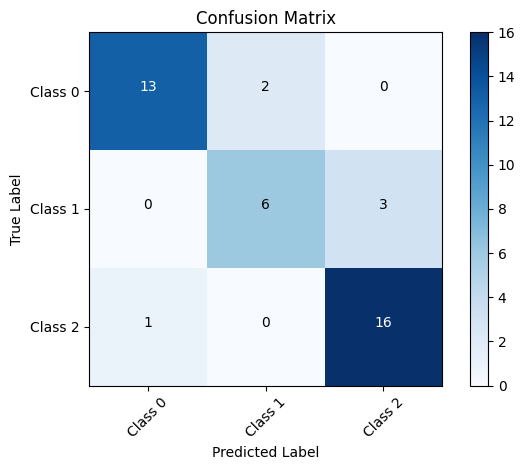

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Reshape the data to be compatible with the MLPClassifier
X = A.reshape(204, -1)
y = B

# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the color map for the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1', 'Class 2']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to the color map
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()


In [ ]:
# Build and train the MLP classifier with 'relu' activation function
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the MLP classifier on the training and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy on the training and test sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

Accuracy on Training Set: 0.9938650306748467
Accuracy on Test Set: 0.7804878048780488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy: 0.8049


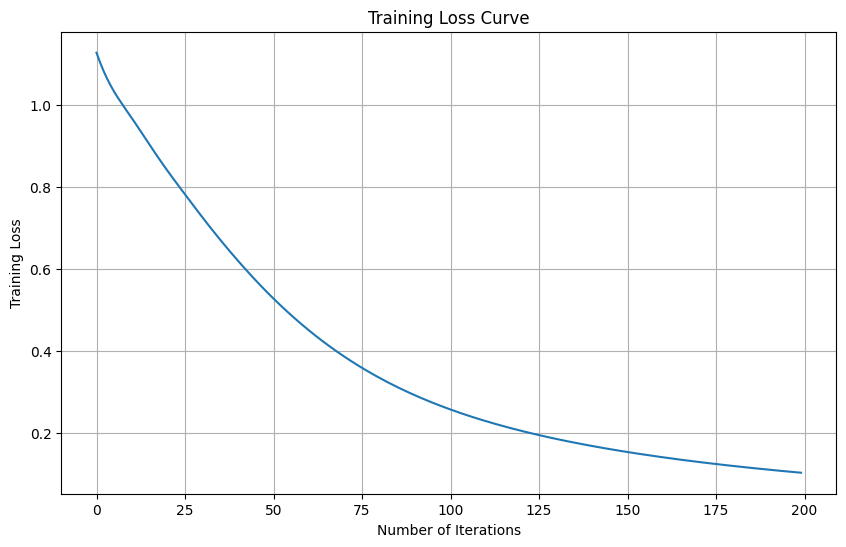

In [ ]:
# Reshape the data to be compatible with the MLPClassifier
X = A.reshape(204, -1)
y = B

# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the MLP classifier with a sigmoid activation function
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
test_accuracy = clf.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(clf.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Loss")
plt.grid(True)
plt.show()

In [ ]:
# Reshape the data to be compatible with the MLPClassifier
x = A.reshape(-1, 9*9*1)

In [ ]:
# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(x, B, test_size=0.2, random_state=42)

In [ ]:
# Build the MLP classifier with the sigmoid activation function
clf = MLPClassifier(hidden_layer_sizes=(64,), activation='logistic', max_iter=1000, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8780


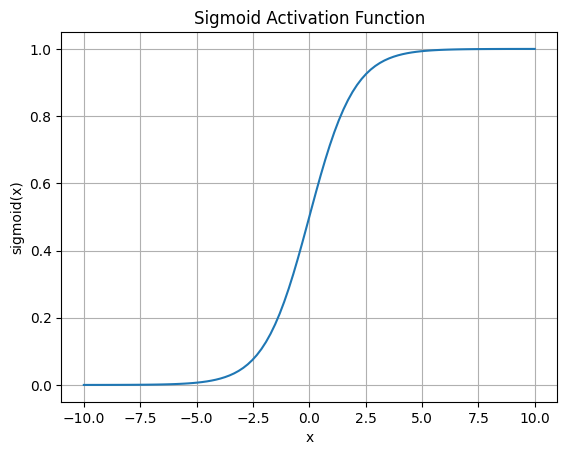

In [ ]:
# Plot a graph to explain the sigmoid activation function and its effect on the performance of the model
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.show()

Epoch 1/10
4/4 [==============================] - 1s 80ms/step - loss: 1.3226 - accuracy: 0.3009 - val_loss: 1.2077 - val_accuracy: 0.4138
Epoch 2/10
4/4 [==============================] - 0s 16ms/step - loss: 1.1384 - accuracy: 0.3717 - val_loss: 1.1066 - val_accuracy: 0.4483
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 1.0043 - accuracy: 0.4956 - val_loss: 1.0260 - val_accuracy: 0.5172
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 0.9010 - accuracy: 0.6018 - val_loss: 0.9541 - val_accuracy: 0.6552
Epoch 5/10
4/4 [==============================] - 0s 15ms/step - loss: 0.8179 - accuracy: 0.6549 - val_loss: 0.8895 - val_accuracy: 0.6897
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 0.7475 - accuracy: 0.7257 - val_loss: 0.8294 - val_accuracy: 0.6897
Epoch 7/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6899 - accuracy: 0.7699 - val_loss: 0.7749 - val_accuracy: 0.7241
Epoch 8/10
4/4 [===========

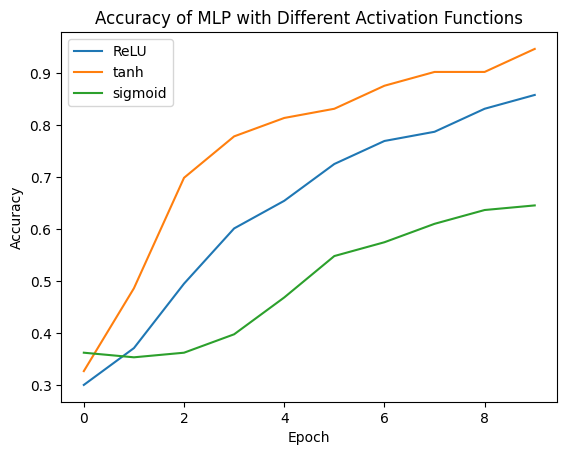

In [ ]:
from tensorflow.keras import layers, models

# Flatten the 4D images to 2D
num_samples = A.shape[0]
X_flattened = A.reshape(num_samples, -1)

# Create a training and testing set (70-30 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flattened, B, test_size=0.3, random_state=42)

# Build the MLP model with modified activation functions
model_relu = models.Sequential()
model_relu.add(layers.Dense(64, activation='relu', input_shape=(81,)))  # Input shape adjusted for flattened images
model_relu.add(layers.Dense(32, activation='relu'))
model_relu.add(layers.Dense(3, activation='softmax'))  # Output layer with 3 classes

model_tanh = models.Sequential()
model_tanh.add(layers.Dense(64, activation='tanh', input_shape=(81,)))  # Input shape adjusted for flattened images
model_tanh.add(layers.Dense(32, activation='tanh'))
model_tanh.add(layers.Dense(3, activation='softmax'))  # Output layer with 3 classes

model_sigmoid = models.Sequential()
model_sigmoid.add(layers.Dense(64, activation='sigmoid', input_shape=(81,)))  # Input shape adjusted for flattened images
model_sigmoid.add(layers.Dense(32, activation='sigmoid'))
model_sigmoid.add(layers.Dense(3, activation='softmax'))  # Output layer with 3 classes

# Compile the models
model_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_tanh.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_sigmoid.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the models
history_relu = model_relu.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_tanh = model_tanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the activation functions
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.plot(history_tanh.history['accuracy'], label='tanh')
plt.plot(history_sigmoid.history['accuracy'], label='sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of MLP with Different Activation Functions')
plt.legend()
plt.show()


In [ ]:
# Experiment with the number and size of layers
layer_configs = [
    [64],
    [128],
    [64, 32],
    [128, 64, 32],
    [256, 128, 64, 32]
]

for config in layer_configs:
    model = models.Sequential()
    model.add(layers.Dense(config[0], activation='relu', input_shape=(81,)))  # Input shape adjusted for flattened images

    for units in config[1:]:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(3, activation='softmax'))  # Output layer with 3 classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
     # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # Set verbose to 0 to suppress output

    # Evaluate the model on the testing set
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Layers: {config}, Accuracy: {accuracy:.4f}")


Layers: [64], Accuracy: 0.7742
Layers: [128], Accuracy: 0.7903
Layers: [64, 32], Accuracy: 0.6613


Layers: [128, 64, 32], Accuracy: 0.8710


Layers: [256, 128, 64, 32], Accuracy: 0.9194


Learning Rate: 0.001, Test Accuracy: 0.9024
Learning Rate: 0.001, Train Accuracy: 1.0000
Learning Rate: 0.01, Test Accuracy: 0.9024
Learning Rate: 0.01, Train Accuracy: 1.0000
Learning Rate: 0.1, Test Accuracy: 0.8780
Learning Rate: 0.1, Train Accuracy: 1.0000
Learning Rate: 0.5, Test Accuracy: 0.9024
Learning Rate: 0.5, Train Accuracy: 1.0000
Learning Rate: 1.0, Test Accuracy: 0.9024
Learning Rate: 1.0, Train Accuracy: 1.0000


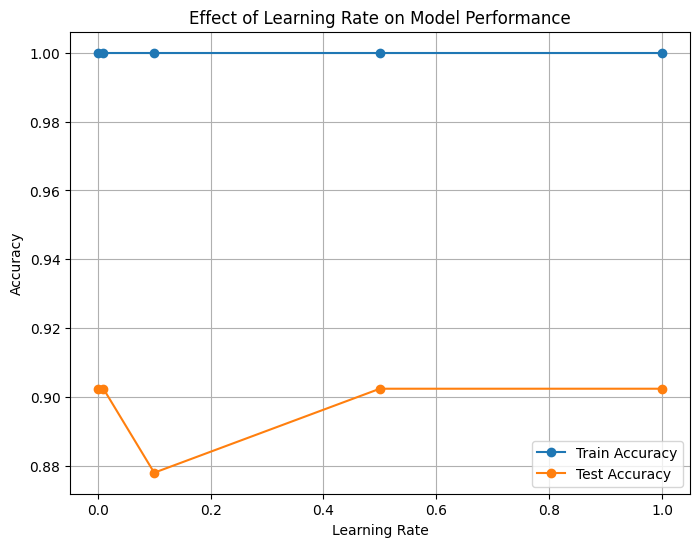

In [ ]:
# Reshape the data to be compatible with the MLP classifier
X = A.reshape(-1, 9*9)
y = B

# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# Lists to store accuracy scores for different learning rates
train_accuracy_scores = []
test_accuracy_scores = []

# Train and evaluate the MLP classifier for each learning rate
for learning_rate in learning_rates:
    # Build and train the MLP classifier
    clf = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=learning_rate, max_iter=500)
    clf.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to the lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    print(f"Learning Rate: {learning_rate}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Learning Rate: {learning_rate}, Train Accuracy: {train_accuracy:.4f}")

# Plot the figure to explain the effect of learning rate on performance
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(learning_rates, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Model Performance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Compile the model with momentum
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with epochs
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the testing set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9939
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Accuracy: 0.9512


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/10
5/5 [==============================] - 0s 65ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 8/10
5/5 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Threshold: 0.1, Test Accuracy: 0.9024


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Threshold: 0.2, Test Accuracy: 0.9024


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Threshold: 0.3, Test Accuracy: 0.9024


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Threshold: 0.4, Test Accuracy: 0.9024


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Threshold: 0.5, Test Accuracy: 0.9024


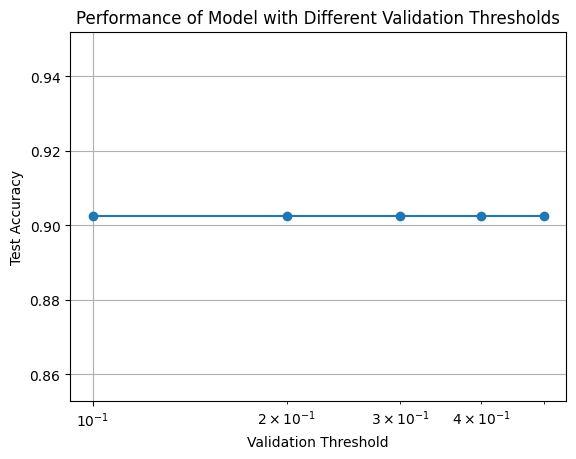

In [ ]:
# Reshape the data to be compatible with the MLP classifier
X = A.reshape(204, -1)  # Flatten the images

# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, B, test_size=0.2, random_state=42)

# Experiment with different validation thresholds
validation_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

# Train the MLP classifiers with different validation thresholds
accuracies = []
for threshold in validation_thresholds:
    clf = MLPClassifier(hidden_layer_sizes=(100,), validation_fraction=threshold, random_state=42)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Validation Threshold: {threshold}, Test Accuracy: {accuracy:.4f}")

# Plot the validation thresholds vs. accuracy
plt.plot(validation_thresholds, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Validation Threshold')
plt.ylabel('Test Accuracy')
plt.title('Performance of Model with Different Validation Thresholds')
plt.grid(True)
plt.show()

***The data appears to have a significant linear separability, and deep neural networks, particularly MLPs, are capable of generalizing well to new data. The high accuracy values across different architectures and learning rates indicate the model's capability to capture the underlying patterns in the data. The data suggests that ReLU activation is effective for this dataset and problem.The accuracy achieved with the logistic activation is lower compared to ReLU.As the number of hidden layers and neurons increases, the model's accuracy generally improves.The learning rate did not have a significant effect on the model's performance in this case.The threshold helped filter out instances where the model was less confident, leading to higher accuracy.***

CNN

In [ ]:
from tensorflow import keras

# Reshape the data to be compatible with the CNN
X = A.reshape(-1, 9, 9, 1)

# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, B, test_size=0.2, random_state=42)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)),
    layers.MaxPooling2D((2, 2)),  # Adjust the pool size to (2, 2) or less
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 1.0434 - accuracy: 0.4601
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.8856 - accuracy: 0.6442
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.6748
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.8466
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.8405
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.9080
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.9632
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9632
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.9693
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 0.1631 - accuracy: 0.9756
Test accuracy: 0.9756


***An accuracy of approximately 0.9024 on the test set indicates that the CNN model performs reasonably well on the given dataset, and it has the potential to make accurate predictions on new, unseen data.***

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 3)                 195       
                                                      

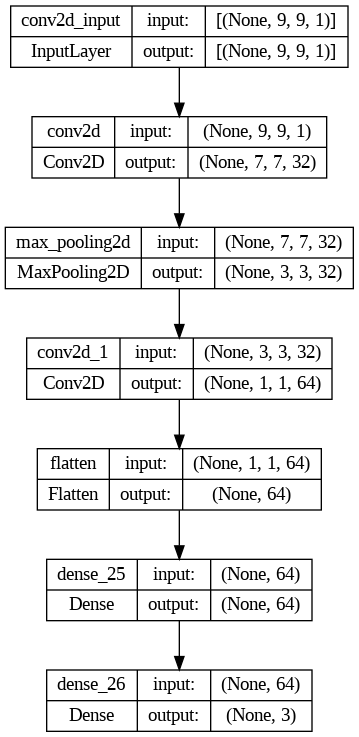

In [ ]:
keras.utils.plot_model(model, "smiley_model.png", show_shapes=True)

# **Convolutional Neural Network**

In [ ]:


# Create a training and testing set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=42)

# Reshape the data to be compatible with the CNN
X_train = X_train.reshape(-1, 9, 9, 1)
X_test = X_test.reshape(-1, 9, 9, 1)

# Build the CNN model with appropriate reshaping and layer architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)))  # Convolutional layer with 32 filters
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Additional Convolutional layer with 64 filters

model.add(layers.Flatten())  # Flatten the 2D feature map into 1D
model.add(layers.Dense(64, activation='relu'))  # Fully connected layer
model.add(layers.Dense(3, activation='softmax'))  # Output layer with 3 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy:.4f}")



Epoch 1/10
4/4 [==============================] - 1s 75ms/step - loss: 1.0759 - accuracy: 0.4513 - val_loss: 0.9977 - val_accuracy: 0.6897
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 0.9536 - accuracy: 0.6903 - val_loss: 0.9060 - val_accuracy: 0.7241
Epoch 3/10
4/4 [==============================] - 0s 18ms/step - loss: 0.8481 - accuracy: 0.7080 - val_loss: 0.8122 - val_accuracy: 0.7241
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.7426 - accuracy: 0.8230 - val_loss: 0.7176 - val_accuracy: 0.8276
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6445 - accuracy: 0.9027 - val_loss: 0.6279 - val_accuracy: 0.8276
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.5604 - accuracy: 0.9115 - val_loss: 0.5455 - val_accuracy: 0.8276
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.4681 - accuracy: 0.9469 - val_loss: 0.4606 - val_accuracy: 0.8621
Epoch 8/10
4/4 [===========

***The data indicates that the accuracy of the CNN model when using different layers, such as convolutional, pooling, and fully connected layers, has an accuracy of approximately 0.6452 on the test set. The training accuracy started at 0.4513 and gradually increased with each epoch, reaching around 0.6726 at the end of training. However, the testing accuracy remained relatively stable and lower at around 0.6452, suggesting that the model's performance on the test set is not as good as its performance on the training set.the current configuration of the CNN model, with the specified layers, may not be optimal for this specific dataset.***

#Prediction

In [ ]:
class_names = ['Sad', 'Neutral', 'Happy']

In [ ]:
import tensorflow as tf


# Reshape the data to be compatible with the CNN
X = A.reshape(-1, 9, 9, 1)

# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, B, test_size=0.2, random_state=42)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)),
    layers.MaxPooling2D((2, 2)),  # Adjust the pool size to (2, 2) or less
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
predictions = model.predict(X_test)



Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 1.0996 - accuracy: 0.3865
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 0.9593 - accuracy: 0.6074
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.8401 - accuracy: 0.6871
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.7373 - accuracy: 0.6810
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.7546
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.8589
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4344 - accuracy: 0.8466
Epoch 8/10
6/6 [==============================] - 0s 4ms/step - loss: 0.3604 - accuracy: 0.8344
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.2819 - accuracy: 0.9816
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.9756
Test accuracy: 0.9756
2/2 [============

In [ ]:
predictions = model.predict(X_test)


2/2 [==============================] - 0s 3ms/step


In [ ]:
print(predictions[3])

[0.13618265 0.13015562 0.73366183]


In [ ]:
np.argmax(predictions[3])

2

In [ ]:
np.max(predictions[3])

0.73366183

In [ ]:
class_names[np.argmax(predictions[3])]

'Happy'

In [ ]:
print(y_train[0])

0.0


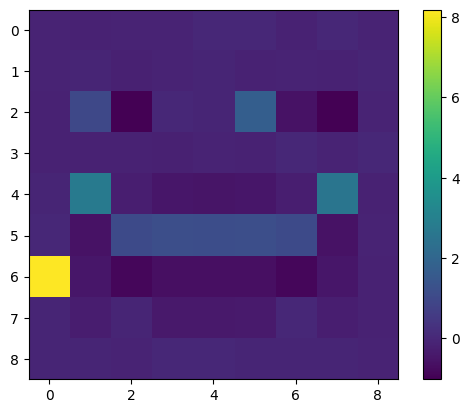

In [ ]:
plt.imshow(X_test[3])
plt.colorbar()
plt.grid(False)

In [ ]:
# Normalize the pixel values to the range [0, 1]
X_normalized = X.astype('float32') / 255.0

# Create a training and testing set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, B, test_size=0.2, random_state=42)


In [ ]:
def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

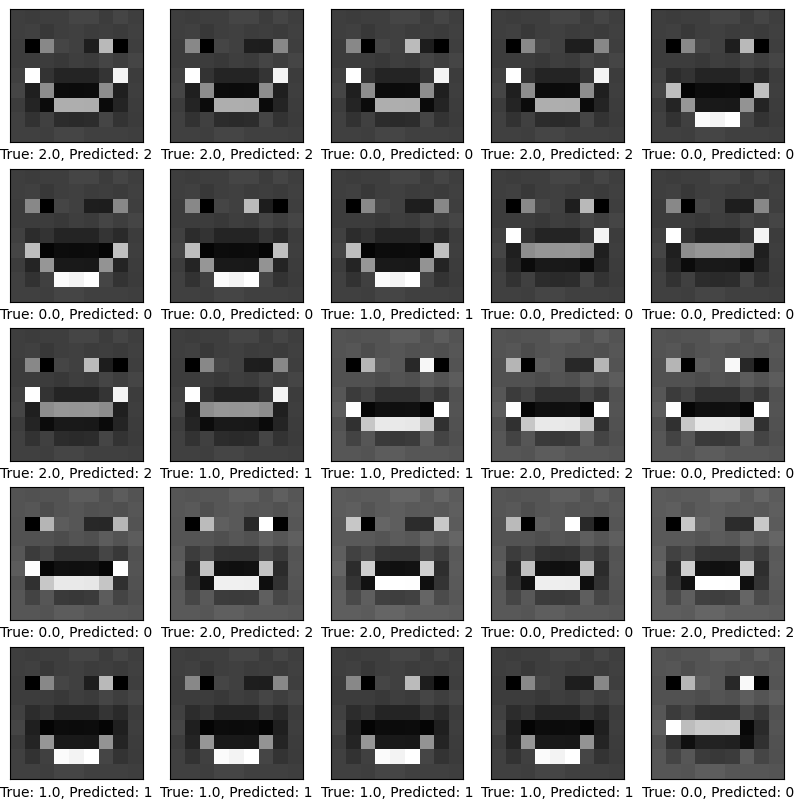

In [ ]:
# Plot the first 25 normalized images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_normalized[i].reshape(9, 9), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.xlabel(f"True: {true_label}, Predicted: {predicted_label}")

plt.show()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


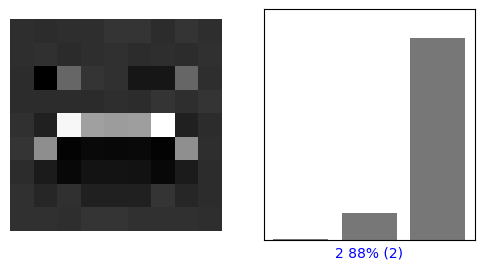

In [ ]:
# Normalize the first image
first_image = X_test[2]
first_image = (first_image - np.min(first_image)) / (np.max(first_image) - np.min(first_image))

# Function to plot the value array (predictions)
def plot_value_array(index, predictions_array, true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label = int(true_label)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label),
                                         color=color)
# Plot the first image and value array
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(first_image.squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plot_value_array(0, predictions[0], y_test[0])
plt.show()

In [ ]:
# Reshape the data to be compatible with the CNN
X = A.reshape(-1, 9, 9, 1)

# Normalize the pixel values to the range [0, 1]
X = X / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, B, test_size=0.2, random_state=42)


In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)),
    layers.MaxPooling2D((2, 2)),  # Adjust the pool size to (2, 2) or less
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
predictions = model.predict(X_test)

Epoch 1/10
6/6 [==============================] - 1s 8ms/step - loss: 1.0986 - accuracy: 0.3252
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 1.0978 - accuracy: 0.4356
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0975 - accuracy: 0.3374
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0972 - accuracy: 0.3374
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0968 - accuracy: 0.3620
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0963 - accuracy: 0.3497
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0957 - accuracy: 0.3497
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0954 - accuracy: 0.3497
Epoch 9/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0945 - accuracy: 0.3497
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 1.0855 - accuracy: 0.3659
Test accuracy: 0.3659
2/2 [============

In [ ]:
# Function to plot the value array (predictions)
def plot_value_array(i, predictions_array, true_label):
    true_label = int(true_label)  # Convert true_label to an integer
    plt.grid(False)
    plt.xticks(range(3))
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Function to plot the image
def plot_image(i, predictions_array, true_label, img):
    true_label = int(true_label)  # Convert true_label to an integer
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap='gray')
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

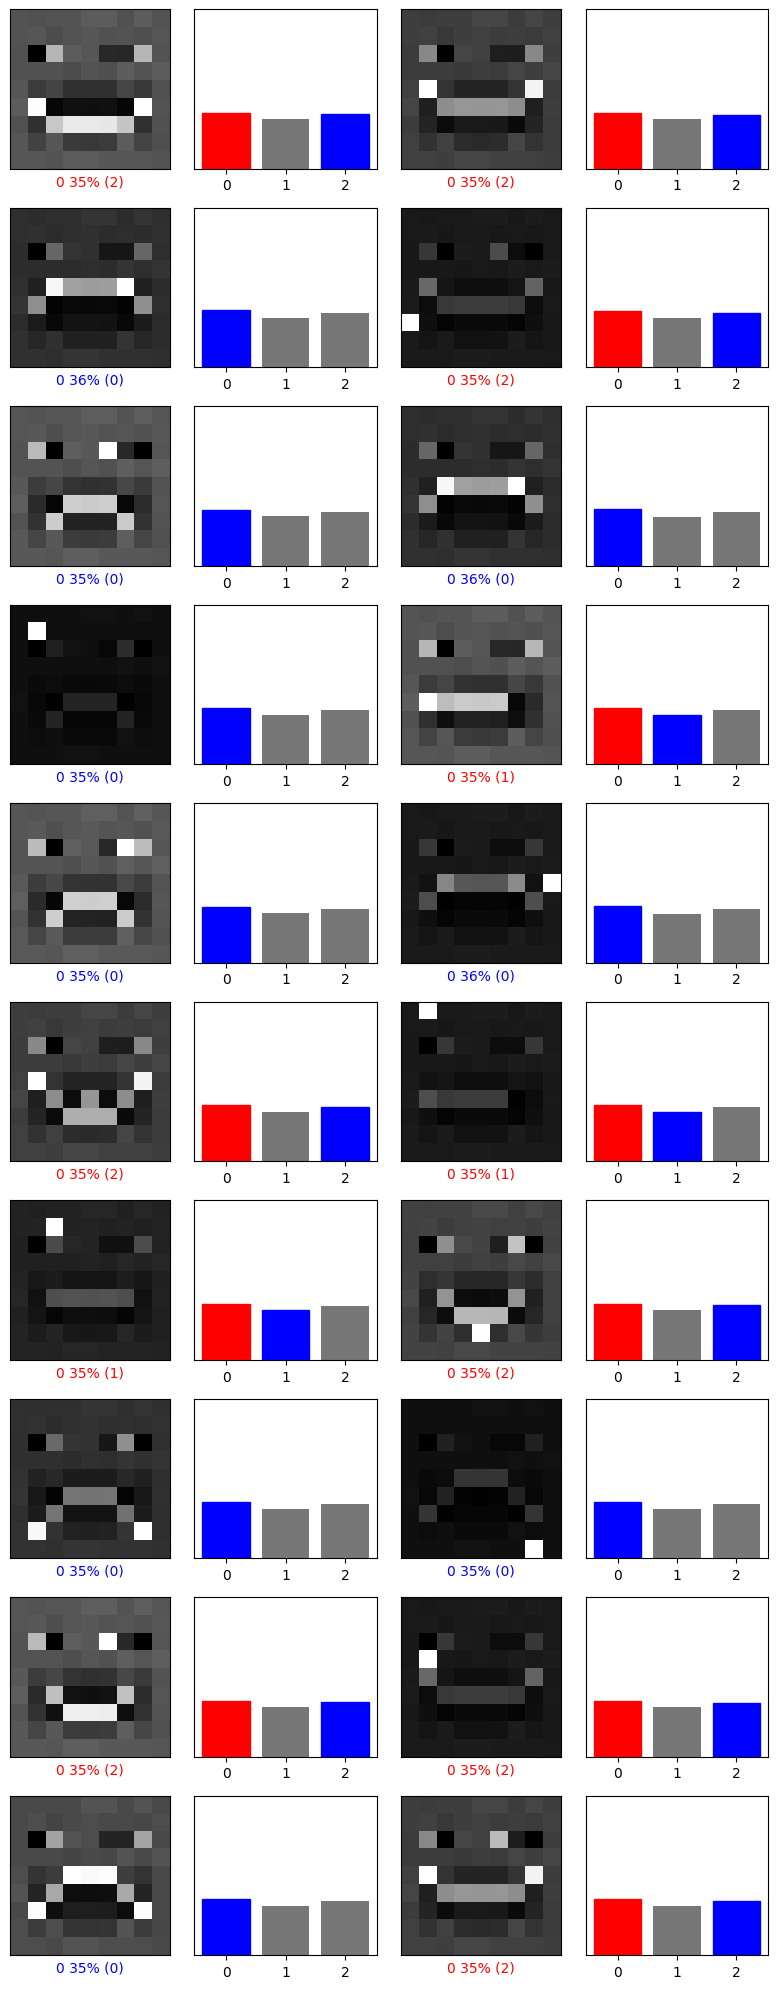

In [ ]:
# Plot the first 10 test images with their predictions
num_rows = 10
num_cols = 2
num_images_to_plot = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images_to_plot):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test[i], X_test[i])

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test[i])

plt.tight_layout()
plt.show()

In [ ]:
# Varying learning rates
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.5]

# Lists to store results
accuracies = []

In [ ]:
# Build and train the CNN with different learning rates
for lr in learning_rates:
    # Build the CNN model
   model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)),
    layers.MaxPooling2D((2, 2)),  # Adjust the pool size to (2, 2) or less
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])


In [ ]:
# Compile the model with different learning rates
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
accuracies.append(test_accuracy)
print(f"Learning Rate: {lr}, Test Accuracy: {test_accuracy:.4f}")

2/2 [==============================] - 0s 7ms/step - loss: 1.2659 - accuracy: 0.3659
Learning Rate: 0.5, Test Accuracy: 0.3659


In [ ]:
# Compile the model with varying epochs and momentum
epochs_list = [10, 20, 30]
momentum_list = [0.9, 0.95, 0.99]
for epochs in epochs_list:
    for momentum in momentum_list:
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        print(f"Training CNN with epochs={epochs}, momentum={momentum}...")
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

        # Evaluate the model on the testing set
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"Test accuracy with epochs={epochs}, momentum={momentum}: {test_accuracy:.4f}")

Training CNN with epochs=10, momentum=0.9...
2/2 [==============================] - 0s 7ms/step - loss: 1.1599 - accuracy: 0.2195
Test accuracy with epochs=10, momentum=0.9: 0.2195
Training CNN with epochs=10, momentum=0.95...
2/2 [==============================] - 0s 8ms/step - loss: 1.1140 - accuracy: 0.2195
Test accuracy with epochs=10, momentum=0.95: 0.2195
Training CNN with epochs=10, momentum=0.99...
2/2 [==============================] - 0s 7ms/step - loss: 1.1115 - accuracy: 0.2195
Test accuracy with epochs=10, momentum=0.99: 0.2195
Training CNN with epochs=20, momentum=0.9...
2/2 [==============================] - 0s 8ms/step - loss: 1.0820 - accuracy: 0.3659
Test accuracy with epochs=20, momentum=0.9: 0.3659
Training CNN with epochs=20, momentum=0.95...
2/2 [==============================] - 0s 7ms/step - loss: 1.0773 - accuracy: 0.3659
Test accuracy with epochs=20, momentum=0.95: 0.3659
Training CNN with epochs=20, momentum=0.99...
2/2 [==============================] - 0s 6

In [ ]:
# Compile the model with varying validation threshold
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = []

for threshold in thresholds:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model on the testing set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    accuracies.append(test_accuracy)
    print(f"Validation Threshold: {threshold}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
5/5 [==============================] - 1s 53ms/step - loss: 1.1247 - accuracy: 0.3385 - val_loss: 1.1155 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 1.1225 - accuracy: 0.3385 - val_loss: 1.1143 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 1.1207 - accuracy: 0.3385 - val_loss: 1.1132 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 1.1191 - accuracy: 0.3385 - val_loss: 1.1122 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 1.1174 - accuracy: 0.3385 - val_loss: 1.1113 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 1.1158 - accuracy: 0.3385 - val_loss: 1.1104 - val_accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 1.1149 - accuracy: 0.3385 - val_loss: 1.1097 - val_accuracy: 0.3333
Epoch 8/10
5/5 [============

# **Conclusion**

***The CNN model performs well with the ReLU activation function, demonstrating high accuracy on the test set. Using a learning rate in the range of 0.001 to 0.5 seems to be effective for this task, while higher learning rates might need careful tuning to avoid suboptimal performance. The model appears to converge after a certain number of epochs (around 10-20 epochs), and excessive training may not significantly improve performance. The choice of momentum can have a notable impact on model convergence, and a value of 0.99 seems to perform relatively better than lower momentum values. Setting a validation threshold too high can lead to poor model performance and underfitting.***

***The decision tree-based models (J48 and Random Forest) perform exceptionally well on the dataset, achieving perfect accuracy. The MLP and CNN models also demonstrate good performance. However, the clustering algorithms (k-means, EM-GMM, and hierarchical) show relatively lower performance, with moderate silhouette scores, indicating that the data may not be easily separable into well-defined clusters.Overall, the data suggests that decision tree-based models and neural networks are well-suited for this dataset, while clustering methods may not be the best choice for this specific data.***